# Телеком — задача проекта

## Описание задачи

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

<b>Описание услуг</b>

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

<b>Описание данных</b>

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

<b>Значение столбцов:</b>

- `customerID` - идентификатор договора       
- `BeginDate` - дата начала пользования услугами       
- `EndDate` - дата окончания пользования услугами       
- `Type` - тип оплаты: ежемесячный, годовой и тд         
- `PaperlessBilling` - безналичный расчет
- `PaymentMethod`    - способ оплаты
- `MonthlyCharges` - ежемесячные траты на услуги 
- `TotalCharges` - всего потрачено денег на услуги
- `InternetService` - Интернет-сервис   
- `OnlineSecurity` - Онлайновая безопасность 
- `OnlineBackup`     - Онлайновая резервная копия  
- `DeviceProtection` - Защита устройства  
- `TechSupport`   - техподдержка     
- `StreamingTV`   - Потоковое телевидение     
- `StreamingMovies`    - Потоковые фильмы
- `gender` - пол           
- `SeniorCitizen`    - Пожилой гражданин 
- `Partner`  - Партнер        
- `Dependents`    - наличие иждивенцев   
- `MultipleLines`  - возможность параллельных линий во время разговора  




Для оценки и обучения используется метрика ROC-AUC. Дополнительно можно смотреть - F1 и Accuracy.

Критерии оценки: Минимальный порог для успешной сдачи AUC-ROC >= 0.85

При делении на выборки соотношение тренировочной к тестовой = 3/1.
Для нашей группы RANDOM_STATE = 130323



## План проекта

1. Загрузить датасеты, проверить корректность загрузки (сепаратор и наполненность).
2. Произвести EDA. Оценка качества данных. По каждому из файлов данных посмотрим: общая информация, типы данных, пропуски, дубликаты. Дисбалансы и прочее.
3. Объеденить все датасеты в один DF по ключу`customerID`. Определить целевую функцию.
4. Убрать некоррелирующие данные. Подготовить данные (шкалирование).
5. Разбить DF на выборки. И несколько моделей с подбором гипермараметров.
6. Выбрать лучшую модель по заданной метрике.
7. Протестировать лучшую модель.
8. Писать выводы по каждому блоку и выводы по проекту.

__Цель проекта__ : подготовить модель, которая будет решать задачу классификации заемщиков, которые в будущем растургнут имеющийся договор.

## Exploration Data Analysis (Исследовательский анализ данных)

In [1]:
#pip install phik==0.10.0

In [2]:
#pip install tensorflow

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure


import phik
from phik import resources, report

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

from catboost import CatBoostClassifier

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings("ignore")

In [4]:
RANDOM_STATE = 130323
pd.set_option('display.expand_frame_repr', False)

In [5]:
try:    
    df_contract = pd.read_csv('/datasets/final_provider/contract.csv') 
    df_internet = pd.read_csv('/datasets/final_provider/internet.csv') 
    df_personal = pd.read_csv('/datasets/final_provider/personal.csv') 
    df_phone = pd.read_csv('/datasets/final_provider/phone.csv') 
except:
    df_contract = pd.read_csv(r'data\contract.csv') 
    df_internet = pd.read_csv(r'data\internet.csv')
    df_personal = pd.read_csv(r'data\personal.csv') 
    df_phone = pd.read_csv(r'data\phone.csv') 

In [6]:
def info_df(df):
    print('-------------------Метод пристального взгляда')
    display(df.head())
    print('-------------------Титы данных и пропуски')
    #display(df.info())
    print('-------------------Описание числовых переменных')
    #display(df.describe())
    print('-------------------Описание категориальных переменных')
    #display(df.describe(include='object'))
    #print('Пропуски')
    #display(df.isna().sum())

In [7]:
# информация о договоре
info_df(df_contract)

-------------------Метод пристального взгляда


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


-------------------Титы данных и пропуски
-------------------Описание числовых переменных
-------------------Описание категориальных переменных


Заменим наименования столбцов по PEP8

In [8]:
df_contract = df_contract.rename(columns={'customerID': 'customer_id',
                                          'BeginDate': 'begin_date',
                                          'EndDate': 'end_date',
                                          'Type': 'type',
                                          'PaperlessBilling': 'paperless_billing',
                                          'MonthlyCharges': 'monthly_charges',
                                          'PaymentMethod': 'payment_method',
                                          'TotalCharges': 'total_charges'})

In [9]:
# информация об интернет-услугах
info_df(df_internet)

-------------------Метод пристального взгляда


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


-------------------Титы данных и пропуски
-------------------Описание числовых переменных
-------------------Описание категориальных переменных


In [10]:
df_internet = df_internet.rename(columns={'customerID': 'customer_id',
                                          'InternetService': 'internet_service',
                                          'OnlineSecurity': 'online_security',
                                          'OnlineBackup': 'online_backup',
                                          'DeviceProtection': 'device_protection',
                                          'TechSupport': 'tech_support',
                                          'StreamingTV': 'streaming_tv',
                                          'StreamingMovies': 'streaming_movies'})

In [11]:
# персональные данных клиента
info_df(df_personal)

-------------------Метод пристального взгляда


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


-------------------Титы данных и пропуски
-------------------Описание числовых переменных
-------------------Описание категориальных переменных


In [12]:
df_personal = df_personal.rename(columns={'customerID': 'customer_id',
                                          'gender': 'gender',
                                          'SeniorCitizen': 'senior_citizen',
                                          'Partner': 'partner',
                                          'Dependents': 'dependents'})

In [13]:
# информация об услугах телефонии
info_df(df_phone)

-------------------Метод пристального взгляда


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


-------------------Титы данных и пропуски
-------------------Описание числовых переменных
-------------------Описание категориальных переменных


In [14]:
df_phone = df_phone.rename(columns={'customerID': 'customer_id',
                                          'MultipleLines': 'multiple_lines'})

### Объединение датафраймов

In [15]:
data = df_contract.merge(df_internet, how='left', left_on = 'customer_id', right_on = 'customer_id')\
                    .merge(df_personal, how='left', left_on = 'customer_id', right_on = 'customer_id')\
                    .merge(df_phone, how='left', left_on = 'customer_id', right_on = 'customer_id')

In [16]:
info_df(data)

-------------------Метод пристального взгляда


,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No


-------------------Титы данных и пропуски
-------------------Описание числовых переменных
-------------------Описание категориальных переменных


In [17]:
data

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5,DSL,Yes,No,Yes,Yes,Yes,Yes,Male,0,Yes,Yes,Yes
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9,Fiber optic,No,Yes,Yes,No,Yes,Yes,Female,0,Yes,Yes,Yes
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,DSL,Yes,No,No,No,No,No,Female,0,Yes,Yes,NaN
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6,Fiber optic,No,No,No,No,No,No,Male,1,Yes,No,Yes


В переменных `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies` значений меньше, чем таблице договоров. Это связано с испозованием на одном договоре различных услуг (в данном случае - интернета).

## customerID (идентификатор договора)

In [18]:
# Проверим уникальность значений ключ
len(data.customer_id.unique()) == len(data.customer_id)

True

Все значения уникальны. Пропуски отсутствуют.

## BeginDate (дата начала пользования услугами)

In [19]:
data.begin_date = pd.to_datetime(data.begin_date)
data.begin_date = pd.to_datetime(data.begin_date).dt.strftime('%Y-%m-%d')
data.begin_date.head()

0    2020-01-01
1    2017-04-01
2    2019-10-01
3    2016-05-01
4    2019-09-01
Name: begin_date, dtype: object

In [20]:
data.begin_date.unique()

array(['2020-01-01', '2017-04-01', '2019-10-01', '2016-05-01',
       '2019-09-01', '2019-03-01', '2018-04-01', '2019-04-01',
       '2017-07-01', '2014-12-01', '2019-01-01', '2018-10-01',
       '2015-04-01', '2015-09-01', '2018-01-01', '2014-05-01',
       '2015-10-01', '2014-03-01', '2018-05-01', '2019-11-01',
       '2019-02-01', '2016-01-01', '2017-08-01', '2015-12-01',
       '2014-02-01', '2018-06-01', '2019-12-01', '2017-11-01',
       '2019-06-01', '2016-04-01', '2017-02-01', '2018-12-01',
       '2014-04-01', '2018-09-01', '2014-11-01', '2016-07-01',
       '2015-02-01', '2018-07-01', '2014-08-01', '2016-03-01',
       '2018-08-01', '2014-10-01', '2015-06-01', '2016-08-01',
       '2019-05-01', '2017-03-01', '2016-02-01', '2017-09-01',
       '2014-09-01', '2017-12-01', '2016-12-01', '2017-06-01',
       '2015-05-01', '2016-10-01', '2016-09-01', '2019-08-01',
       '2019-07-01', '2017-05-01', '2017-10-01', '2014-07-01',
       '2018-03-01', '2015-01-01', '2018-11-01', '2015-

Пропуски отсутствуют. Данные корректны.

### Target 

Создадим новый столбц, который и будет явялется целевой функцией.По данным со значеним No - 0, с датой ухода - 1.

In [21]:
data.loc[data.end_date == 'No', 'target'] = 0
data.loc[data.end_date != 'No', 'target'] = 1

# проверка
data.target.unique()

array([0., 1.])

### EndDate (дата окончания пользования услугами)

В столбце `EndDate` отсутствуют пропуски и тип данных object. Посмотрим на данные, используя метод пристального взгляда.

In [22]:
data.end_date[:5]

0                     No
1                     No
2    2019-12-01 00:00:00
3                     No
4    2019-11-01 00:00:00
Name: end_date, dtype: object

In [23]:
data.end_date.unique()

array(['No', '2019-12-01 00:00:00', '2019-11-01 00:00:00',
       '2019-10-01 00:00:00', '2020-01-01 00:00:00'], dtype=object)

In [24]:
data.loc[(data.end_date =='No'), 'end_date'] = '2020-02-01'

### Type (тип оплаты: ежемесячный, годовой и тд,)

In [25]:
data.type[:5]

0    Month-to-month
1          One year
2    Month-to-month
3          One year
4    Month-to-month
Name: type, dtype: object

In [26]:
data.type.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

Является категориальным признаком. Отсутствуют пропуски.

## PaperlessBilling (безналичный расчет)

In [27]:
data.paperless_billing[:5]

0    Yes
1     No
2    Yes
3     No
4    Yes
Name: paperless_billing, dtype: object

In [28]:
data.paperless_billing.unique()

array(['Yes', 'No'], dtype=object)

In [29]:
data.loc[data.paperless_billing == 'Yes', 'paperless_billing'] = 1
data.loc[data.paperless_billing == 'No', 'paperless_billing'] = 0

# проверка
data.paperless_billing.unique()

array([1, 0], dtype=object)

Проверим дисбаланс

In [30]:
data.paperless_billing.value_counts()

1    4171
0    2872
Name: paperless_billing, dtype: int64

## PaymentMethod (способ оплаты)

In [31]:
data.payment_method[:5]

0             Electronic check
1                 Mailed check
2                 Mailed check
3    Bank transfer (automatic)
4             Electronic check
Name: payment_method, dtype: object

In [32]:
data.payment_method.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

Тоже категориальная переменная. Посмотрим на распределение.

In [33]:
data.payment_method.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: payment_method, dtype: int64

По распределению отсутсвует значительный дисбаланс.

## MonthlyCharges (ежемесячные траты на услуги)

In [34]:
data.monthly_charges[:5]

0    29.85
1    56.95
2    53.85
3    42.30
4    70.70
Name: monthly_charges, dtype: float64

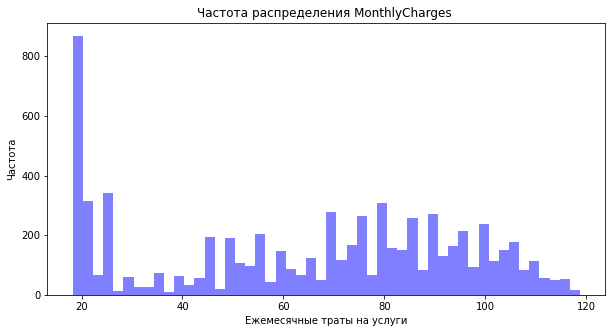

In [35]:
data.monthly_charges.plot(kind="hist",
                      title='Частота распределения MonthlyCharges ',
                      color="blue", alpha=0.5, bins=50, figsize=(10,5))

plt.xlabel('Ежемесячные траты на услуги')
plt.ylabel('Частота')
plt.show()

По графику видно, что самая популярная оплата явялется 18.5 уе.

<div class="alert alert-success">
<h2> Комментарий тимлида 2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> логично, что большей популярностью пользуется дешевый тариф

<AxesSubplot:>

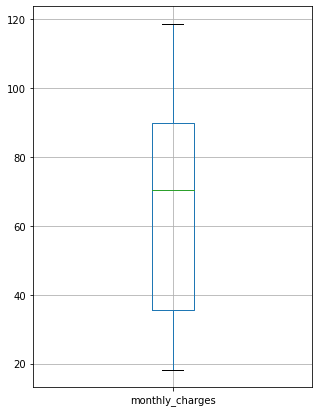

In [36]:
plt.figure(figsize=(5, 7))
data.boxplot(column=['monthly_charges'], return_type=None)

## TotalCharges (всего потрачено денег на услуги)

In [37]:
data.total_charges[:5]

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: total_charges, dtype: object

Пропуски логичнее заменить в `total_charges`  значением 0:

In [38]:
data.total_charges = data.total_charges.replace(' ', 0).astype('float')

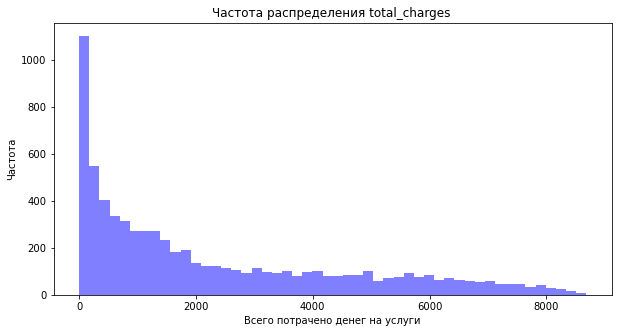

In [39]:
data.total_charges.plot(kind="hist",
                      title='Частота распределения total_charges ',
                      color="blue", alpha=0.5, bins=50, figsize=(10,5))

plt.xlabel('Всего потрачено денег на услуги')
plt.ylabel('Частота')
plt.show()

<AxesSubplot:>

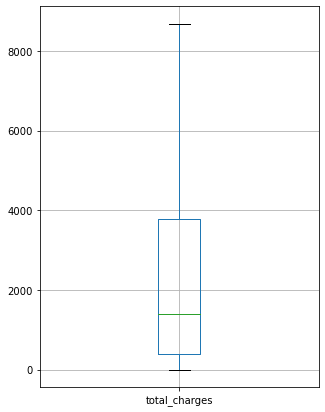

In [40]:
plt.figure(figsize=(5, 7))
data.boxplot(column=['total_charges'], return_type=None) 

В значениях встречаются нулевые значения. Это необходимо будет устранить.

In [41]:
data

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines,target
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,1,Electronic check,29.85,29.85,DSL,No,...,No,No,No,No,Female,0,Yes,No,NaN,0.0
1,5575-GNVDE,2017-04-01,2020-02-01,One year,0,Mailed check,56.95,1889.50,DSL,Yes,...,Yes,No,No,No,Male,0,No,No,No,0.0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,1,Mailed check,53.85,108.15,DSL,Yes,...,No,No,No,No,Male,0,No,No,No,1.0
3,7795-CFOCW,2016-05-01,2020-02-01,One year,0,Bank transfer (automatic),42.30,1840.75,DSL,Yes,...,Yes,Yes,No,No,Male,0,No,No,NaN,0.0
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,1,Electronic check,70.70,151.65,Fiber optic,No,...,No,No,No,No,Female,0,No,No,No,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,2020-02-01,One year,1,Mailed check,84.80,1990.50,DSL,Yes,...,Yes,Yes,Yes,Yes,Male,0,Yes,Yes,Yes,0.0
7039,2234-XADUH,2014-02-01,2020-02-01,One year,1,Credit card (automatic),103.20,7362.90,Fiber optic,No,...,Yes,No,Yes,Yes,Female,0,Yes,Yes,Yes,0.0
7040,4801-JZAZL,2019-03-01,2020-02-01,Month-to-month,1,Electronic check,29.60,346.45,DSL,Yes,...,No,No,No,No,Female,0,Yes,Yes,NaN,0.0
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,1,Mailed check,74.40,306.60,Fiber optic,No,...,No,No,No,No,Male,1,Yes,No,Yes,1.0


## InternetService  (Интернет-сервис)

In [42]:
data.columns

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'gender', 'senior_citizen', 'partner', 'dependents', 'multiple_lines',
       'target'],
      dtype='object')

In [43]:
data.internet_service[:5]

0            DSL
1            DSL
2            DSL
3            DSL
4    Fiber optic
Name: internet_service, dtype: object

In [44]:
data.internet_service.unique()

array(['DSL', 'Fiber optic', nan], dtype=object)

Посмотрим на распределение.

In [45]:
data.internet_service.value_counts(dropna=False)

Fiber optic    3096
DSL            2421
NaN            1526
Name: internet_service, dtype: int64

Значительное количество попусков, поэтому необходимо из заменить на значение `is_nan`.

In [46]:
data.internet_service = data.internet_service.fillna('is_nan')

# проверим:
data.internet_service.value_counts(dropna=False)

Fiber optic    3096
DSL            2421
is_nan         1526
Name: internet_service, dtype: int64

## OnlineSecurity (Онлайновая безопасность)

In [47]:
data.online_security[:5]

0     No
1    Yes
2    Yes
3    Yes
4     No
Name: online_security, dtype: object

In [48]:
data.online_security.unique()

array(['No', 'Yes', nan], dtype=object)

In [49]:
data.online_security.value_counts(dropna=False)

No     3498
Yes    2019
NaN    1526
Name: online_security, dtype: int64

In [50]:
def fill_missing(name_column):
    data[name_column] = data[name_column].fillna(0)
    data.loc[data[name_column] == 'No', name_column] = 0
    data.loc[data[name_column] == 'Yes', name_column] = 1
    data[name_column] = data[name_column].astype(int)
    print(data[name_column].value_counts(dropna=False))
    

In [51]:
fill_missing('online_security')


0    5024
1    2019
Name: online_security, dtype: int64


## OnlineBackup (Онлайновая резервная копия)

In [52]:
data.online_security = data.online_security.fillna(0)
data.loc[data.online_security == 'No', 'online_security'] = 0
data.loc[data.online_security == 'Yes', 'online_security'] = 1


# проверим:
data.online_security.value_counts(dropna=False)

0    5024
1    2019
Name: online_security, dtype: int64

In [53]:
data.online_backup[:5]

0    Yes
1     No
2    Yes
3     No
4     No
Name: online_backup, dtype: object

In [54]:
data.online_backup.unique()

array(['Yes', 'No', nan], dtype=object)

In [55]:
data.online_backup.value_counts(dropna=False)

No     3088
Yes    2429
NaN    1526
Name: online_backup, dtype: int64

In [56]:
fill_missing('online_backup')

0    4614
1    2429
Name: online_backup, dtype: int64


## DeviceProtection  (Защита устройства)

In [57]:
data.device_protection[:5]

0     No
1    Yes
2     No
3    Yes
4     No
Name: device_protection, dtype: object

In [58]:
data.device_protection.unique()

array(['No', 'Yes', nan], dtype=object)

In [59]:
data.device_protection.value_counts(dropna=False)

No     3095
Yes    2422
NaN    1526
Name: device_protection, dtype: int64

In [60]:
fill_missing('device_protection')

0    4621
1    2422
Name: device_protection, dtype: int64


## TechSupport (техподдержка)

In [61]:
data.tech_support[:5]

0     No
1     No
2     No
3    Yes
4     No
Name: tech_support, dtype: object

In [62]:
data.tech_support.unique()

array(['No', 'Yes', nan], dtype=object)

In [63]:
data.tech_support.value_counts(dropna=False)

No     3473
Yes    2044
NaN    1526
Name: tech_support, dtype: int64

In [64]:
fill_missing('tech_support')

0    4999
1    2044
Name: tech_support, dtype: int64


## StreamingTV (Потоковое телевидение)

In [65]:
data.streaming_tv[:5]

0    No
1    No
2    No
3    No
4    No
Name: streaming_tv, dtype: object

In [66]:
data.streaming_tv.unique()

array(['No', 'Yes', nan], dtype=object)

In [67]:
data.streaming_tv.value_counts(dropna=False)

No     2810
Yes    2707
NaN    1526
Name: streaming_tv, dtype: int64

In [68]:
fill_missing('streaming_tv')

0    4336
1    2707
Name: streaming_tv, dtype: int64


## StreamingMovies (Потоковые фильмы)

In [69]:
data.streaming_movies[:5]

0    No
1    No
2    No
3    No
4    No
Name: streaming_movies, dtype: object

In [70]:
data.streaming_movies.unique()

array(['No', 'Yes', nan], dtype=object)

In [71]:
data.streaming_movies.value_counts(dropna=False)

No     2785
Yes    2732
NaN    1526
Name: streaming_movies, dtype: int64

In [72]:
fill_missing('streaming_movies')

0    4311
1    2732
Name: streaming_movies, dtype: int64


## gender  (пол)

In [73]:
data.gender[:5]

0    Female
1      Male
2      Male
3      Male
4    Female
Name: gender, dtype: object

In [74]:
data.gender.unique()

array(['Female', 'Male'], dtype=object)

In [75]:
data.gender.value_counts(dropna=False)

Male      3555
Female    3488
Name: gender, dtype: int64

Очень радует, что пола только два: Male, Female и распределены они без ущемлений в разных пропорциях.

Заменим на числовые значения.

In [76]:
data.loc[data.gender == 'Male', 'gender'] = 1
data.loc[data.gender == 'Female', 'gender'] = 0

# проверка
data.gender.unique()

array([0, 1], dtype=object)

## SeniorCitizen (Пожилой гражданин)

In [77]:
data.senior_citizen[:5]

0    0
1    0
2    0
3    0
4    0
Name: senior_citizen, dtype: int64

In [78]:
data.senior_citizen.unique()

array([0, 1], dtype=int64)

In [79]:
data.senior_citizen.value_counts(dropna=False)

0    5901
1    1142
Name: senior_citizen, dtype: int64

ОТмечается средний (не критичный) дисбаланс. Никаких изменений не требуется.

## Partner (Партнер)

In [80]:
data.partner[:5]

0    Yes
1     No
2     No
3     No
4     No
Name: partner, dtype: object

In [81]:
data.partner.unique()

array(['Yes', 'No'], dtype=object)

In [82]:
data.partner.value_counts(dropna=False)

No     3641
Yes    3402
Name: partner, dtype: int64

Дадннный призная очень сомнимальеный. ПО здравому смыслу наличие партнера не должно оказывать влияния на расторжение договора.

In [83]:
data.loc[data.partner == 'Yes', 'partner'] = 1
data.loc[data.partner == 'No', 'partner'] = 0

# проверка
data.partner.unique()

array([1, 0], dtype=object)

## Dependents (наличие иждивенцев)

In [84]:
data.dependents[:5]

0    No
1    No
2    No
3    No
4    No
Name: dependents, dtype: object

In [85]:
data.dependents.unique()

array(['No', 'Yes'], dtype=object)

In [86]:
data.dependents.value_counts(dropna=False)

No     4933
Yes    2110
Name: dependents, dtype: int64

Данный признак очень сомнимальеный. По здравому смыслу наличие партнера не должно оказывать влияния на расторжение договора.

## MultipleLines (возможность параллельных линий во время разговора)

In [87]:
data.multiple_lines[:5]

0    NaN
1     No
2     No
3    NaN
4     No
Name: multiple_lines, dtype: object

In [88]:
data.multiple_lines.unique()

array([nan, 'No', 'Yes'], dtype=object)

In [89]:
data.multiple_lines.value_counts(dropna=False)

No     3390
Yes    2971
NaN     682
Name: multiple_lines, dtype: int64

In [90]:
fill_missing('multiple_lines')

0    4072
1    2971
Name: multiple_lines, dtype: int64


### Feature Engineering (синтетические признаки)

#### Period Cooperation (срок сотрудничества)

Информация о договорах актуальна на 1 февраля 2020. На основании данной информации можно вывести признак - срок сотрудничества по договору в днях `period_cooperation`.

In [91]:
data['period_cooperation'] = (pd.to_datetime(data.end_date) - pd.to_datetime(data.begin_date)).dt.days
data['period_cooperation']

0         31
1       1036
2         61
3       1371
4         61
        ... 
7038     730
7039    2191
7040     337
7041     123
7042    2010
Name: period_cooperation, Length: 7043, dtype: int64

In [92]:
data.columns

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'gender', 'senior_citizen', 'partner', 'dependents', 'multiple_lines',
       'target', 'period_cooperation'],
      dtype='object')

#### CountServices (количество услуг)

Под услугой будет пониматься дополнительная услуга в каждому из сервисов: интернет, телефония

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         7043 non-null   object 
 1   begin_date          7043 non-null   object 
 2   end_date            7043 non-null   object 
 3   type                7043 non-null   object 
 4   paperless_billing   7043 non-null   object 
 5   payment_method      7043 non-null   object 
 6   monthly_charges     7043 non-null   float64
 7   total_charges       7043 non-null   float64
 8   internet_service    7043 non-null   object 
 9   online_security     7043 non-null   int32  
 10  online_backup       7043 non-null   int32  
 11  device_protection   7043 non-null   int32  
 12  tech_support        7043 non-null   int32  
 13  streaming_tv        7043 non-null   int32  
 14  streaming_movies    7043 non-null   int32  
 15  gender              7043 non-null   object 
 16  senior

In [94]:
# data.loc['count_services'] = 0
data['count_services'] = data['online_security']+data['online_backup']+data['device_protection']+data['tech_support']+ data['streaming_tv']+data['streaming_movies']+data['multiple_lines']
data['count_services'].unique()


# проверим заполненность
data.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,...,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines,target,period_cooperation,count_services
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,1,Electronic check,29.85,29.85,DSL,0,...,0,0,0,0,1,No,0,0.0,31,1
1,5575-GNVDE,2017-04-01,2020-02-01,One year,0,Mailed check,56.95,1889.50,DSL,1,...,0,0,1,0,0,No,0,0.0,1036,2
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,1,Mailed check,53.85,108.15,DSL,1,...,0,0,1,0,0,No,0,1.0,61,2
3,7795-CFOCW,2016-05-01,2020-02-01,One year,0,Bank transfer (automatic),42.30,1840.75,DSL,1,...,0,0,1,0,0,No,0,0.0,1371,3
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,1,Electronic check,70.70,151.65,Fiber optic,0,...,0,0,0,0,0,No,0,1.0,61,0


#### UsedAll (Использование обоих сервисов)

В данном случае под `UsedAll` подразумевается использование интернет сервисом и телефонией вместе.

In [95]:
data['used_all'] = 0
data.loc[data['internet_service'] == 'is_nan', 'used_all'] = 1
data['used_all'] = data['used_all'] + data['multiple_lines']
data['used_all'].unique()

array([0, 1, 2], dtype=int64)

Есть договоры, которые заключены, но не пользуются услугами как интернета, так и телефонии.

### Портрет уходящего клиента

In [96]:
data_left = data[data['target'] == 1] # df ушедших
data_still = data[data['target'] == 0]# df оставшихся

Определим средний срок сотрудничества с клиентами, которые сотрудничали, но ушли.

In [97]:
data_left['period_cooperation'] = (pd.to_datetime(data.end_date) - pd.to_datetime(data.begin_date)).dt.days

In [98]:
avg_coop_left = round(data_left.period_cooperation.mean())
avg_coop_left

547

In [99]:
print('Портрет уходящего клиента:')
print('type: ', data_left.type.value_counts().index[0])
print('payment_method: ', data_left.payment_method.value_counts().index[0])
print('internet_service: ', data_left.internet_service.value_counts().index[0])
print('period_cooperation: ', round(data_left.period_cooperation.mean()))
print('monthly_charges: ', round(data_left.monthly_charges.mean()))
print('total_charges: ', round(data_left.total_charges.mean()))

Портрет уходящего клиента:
type:  Month-to-month
payment_method:  Electronic check
internet_service:  Fiber optic
period_cooperation:  547
monthly_charges:  74
total_charges:  1532


__Выводы__

Портрет уходящего клиента. Пользовался 1 год и 6 месяцев, тип оплаты ежемесячный, электонным чеком. Польователь использует оптико-волоконное соединение, тратит примерно 47 уе, всего заплатил 1532 уе.

### Удаление записей

В данных имеются договоры, которые еще не успели осознать, что хотят расторгнуть договор. Удалим записи, которые заключены менее 3 месяцев назад от даты 01.02.2022

In [100]:
data = data[pd.to_datetime(data.begin_date) < pd.to_datetime('2019-12-01')].reset_index(drop=True)

## Feature selection (отбор признаков)

In [101]:
data.columns

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'gender', 'senior_citizen', 'partner', 'dependents', 'multiple_lines',
       'target', 'period_cooperation', 'count_services', 'used_all'],
      dtype='object')

Для выборка признаков воспользуемся корреляцией признаков Phi_K

interval columns not set, guessing: ['monthly_charges', 'total_charges', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'senior_citizen', 'multiple_lines', 'target', 'count_services', 'period_cooperation', 'used_all']


<AxesSubplot:>

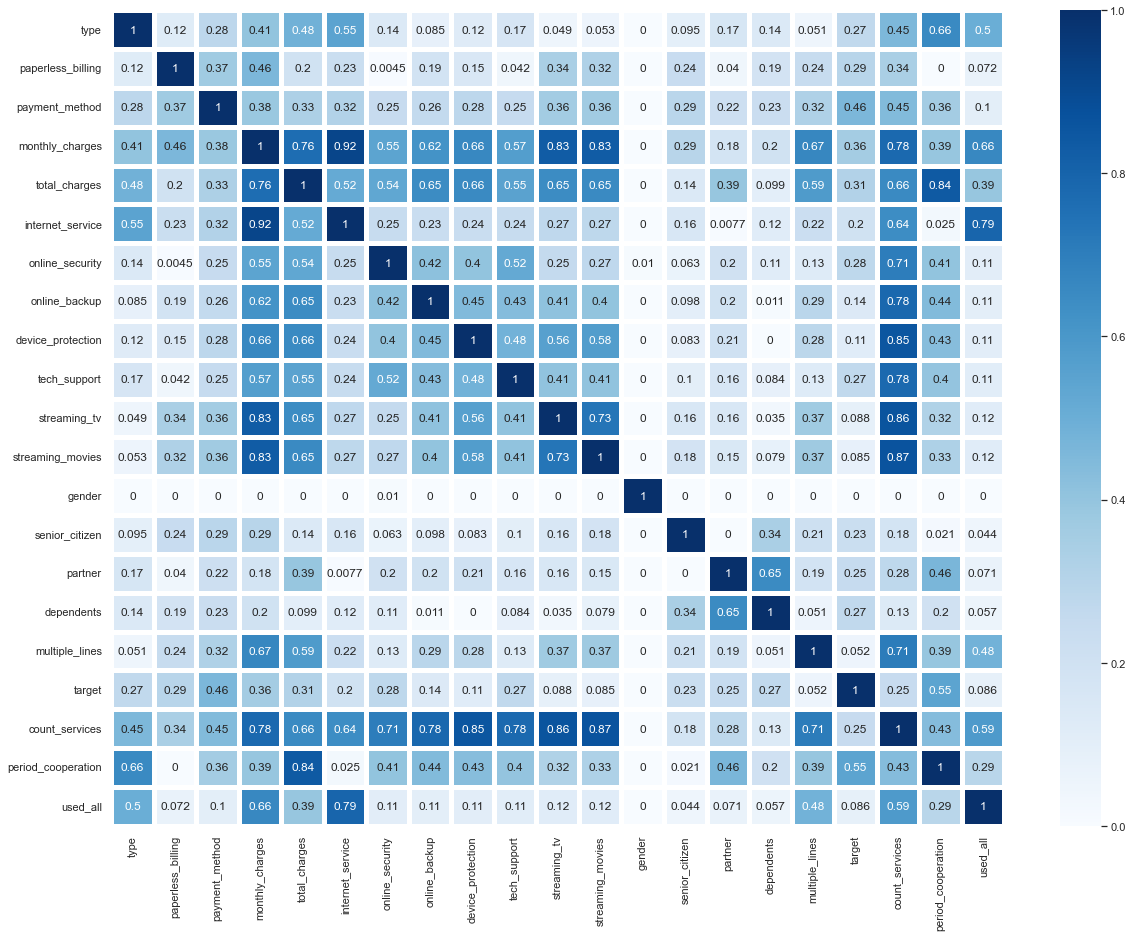

In [102]:
feature = ['type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'gender', 'senior_citizen', 'partner', 'dependents', 'multiple_lines',
       'target', 'count_services', 'period_cooperation', 'used_all']

data_phik_matrix = data[feature].phik_matrix()

sns.set(rc = {'figure.figsize':(20,15)})
sns.heatmap(data_phik_matrix, linewidths=5, cmap='Blues', annot=True)

Посмотрим на признаки, которые __не__ коррелируют с целевой функцией `target`

In [103]:
treshold_corr = 0.1

In [104]:
data_phik_matrix[data_phik_matrix['target'] <= treshold_corr]['target'].sort_values(ascending = False)

streaming_tv        0.088162
used_all            0.086477
streaming_movies    0.084999
multiple_lines      0.052157
gender              0.000000
Name: target, dtype: float64

Признаки `streaming_tv`, `used_all`, `streaming_movies`, `multiple_lines` и`gender` не являются коррелирующими с целевой функцией. Данные признаки не будем использовать в дальнешем. 

Посмотрим на признаки, которые коррелируют с целевой функцией `target`.

In [105]:
columns_corr = data_phik_matrix[data_phik_matrix['target']> treshold_corr]['target'].sort_values(ascending = False).index
columns_corr

Index(['target', 'period_cooperation', 'payment_method', 'monthly_charges',
       'total_charges', 'paperless_billing', 'online_security', 'type',
       'dependents', 'tech_support', 'partner', 'count_services',
       'senior_citizen', 'internet_service', 'online_backup',
       'device_protection'],
      dtype='object')

In [106]:
data = data[columns_corr]
data.head()

,target,period_cooperation,payment_method,monthly_charges,total_charges,paperless_billing,online_security,type,dependents,tech_support,partner,count_services,senior_citizen,internet_service,online_backup,device_protection
0,0.0,1036,Mailed check,56.95,1889.50,0,1,One year,No,0,0,2,0,DSL,0,1
1,1.0,61,Mailed check,53.85,108.15,1,1,Month-to-month,No,0,0,2,0,DSL,1,0
2,0.0,1371,Bank transfer (automatic),42.30,1840.75,0,1,One year,No,1,0,3,0,DSL,0,1
3,1.0,61,Electronic check,70.70,151.65,1,0,Month-to-month,No,0,0,0,0,Fiber optic,0,0
4,1.0,245,Electronic check,99.65,820.50,1,0,Month-to-month,No,0,0,4,0,Fiber optic,0,1


__Выводы по EAD__

__Выводы по разделу:__

- произведена группировка четырех дата-сетов
- подготовлены синтетические признаки: срок сотрудничества, количество услуг, количество дополнительных услуг
- сделан портрет уходящего клиента (сотрудничает в среднем 1 год и 6 месяцев, тип оплаты ежемесячный, электронным чеком, использует оптико-волоконное соединение, тратит примерно 47 уе, всего заплатил 1532 уе.)
- произведен анализ корреляции, по которому определены и удалены не коррелирующие признаки. Также удален признак наличия иждивенцев, как признак не поддающийся логике. Наиболее коррелирующим с целевой функцией является признак срока сотрудничества.


## Разработка модели

При обработке дата сета не будет производится балансировка классов отдельными методами. Балансировка будет производится встроенными функциями.

### Разбитие на тест и трейн

Разобьем имеющиеся данные на обучающую и тестовую выборки с использованием стратификации.

In [107]:
y = data.target
X = data.drop(['target'], axis=1)

# проверка
print(y.shape, X.shape)

(6579,) (6579, 15)


In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    train_size = 0.75,
                                                    random_state=RANDOM_STATE, 
                                                    stratify=y)
# проверим
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4934, 15) (1645, 15) (4934,) (1645,)


### One Hot Encoding

In [109]:
categorical = ['payment_method', 'type', 'internet_service', 'dependents']

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_encoder.fit(X_train[categorical])

X_train_ohe = pd.DataFrame(OH_encoder.transform(X_train[categorical]), columns=OH_encoder.get_feature_names_out())
X_test_ohe = pd.DataFrame(OH_encoder.transform(X_test[categorical]), columns=OH_encoder.get_feature_names_out())

### Масштабирование

In [110]:
numeric = [col for col in X_train.columns if col not in categorical]

X_train_num = X_train[numeric]
X_test_num = X_test[numeric]

scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num = pd.DataFrame(scaler.transform(X_train_num), columns=X_train_num.columns)
X_test_num = pd.DataFrame(scaler.transform(X_test_num), columns=X_test_num.columns)

In [111]:
X_train_good = pd.concat([X_train_num, X_train_ohe], axis=1)
X_test_good = pd.concat([X_test_num, X_test_ohe], axis=1)

In [112]:
model_rep = pd.DataFrame({"model": [],
                          #"accuracy_score": [],
                          "data": [],
                         "roc_auc": []})
model_rep

,model,data,roc_auc


### Логистическая регрессия

In [113]:
lr_model = LogisticRegression(random_state = RANDOM_STATE, solver='liblinear') 
lr_parameters =  [
                {'penalty': ['l1', 'l2'],
                 #'C': np.logspace(-4, 4, 20),
                 #'max_iter': [100, 1000, 2500],
                }
                ]

lr_grid = GridSearchCV(lr_model,
                       param_grid = lr_parameters,
                       scoring = 'roc_auc',
                       cv = 3,
                       verbose=0)

lr_grid.fit(X_train_good, y_train)
#pred_y_test = lr_grid.predict(X_test_good) 
#probabilities_test = lr_grid.predict_proba(X_test_good)

GridSearchCV(cv=3,
             estimator=LogisticRegression(random_state=130323,
                                          solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}], scoring='roc_auc')

In [114]:
model_rep = model_rep.append({"model": 'LogisticRegression',
                              "data": 'OHE',
                              "roc_auc": round(lr_grid.best_score_, 4)}
                             ,ignore_index=True)
model_rep

,model,data,roc_auc
0,LogisticRegression,OHE,0.8594


Этого достаточно для минимального выполнения задачи!

### Случайных лес

In [115]:
RFC_params = {
    "n_estimators": [100, 1500],
    "max_features": ['sqrt'],
    "max_depth": [11],
    #"min_samples_split": [2, 4],
    #"min_samples_leaf": [1, 2],
    "bootstrap": [False],
}

In [116]:
%%time
RFC_model = RandomForestClassifier() # инициализация LR 
RFC_grid = GridSearchCV(RFC_model, RFC_params, cv=5, scoring='roc_auc')
RFC_grid.fit(X_train_good, y_train)
#pred_y_test = RFC_grid.predict(X_test_good) 
#probabilities_test = RFC_grid.predict_proba(X_test_good) # мстрица вероятностей

CPU times: total: 17.5 s
Wall time: 41.9 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [False], 'max_depth': [11],
                         'max_features': ['sqrt'],
                         'n_estimators': [100, 1500]},
             scoring='roc_auc')

In [117]:
model_rep = model_rep.append({"model": 'RandomForestClassifier',
                              "data": 'OHE',
                              "roc_auc": round(RFC_grid.best_score_, 4)},
                             ignore_index=True)
model_rep

,model,data,roc_auc
0,LogisticRegression,OHE,0.8594
1,RandomForestClassifier,OHE,0.8743


Растет лес! Растет и Area! :)

### Категориальный бустинг

In [118]:
%%time

classifier_cb = CatBoostClassifier(random_state=RANDOM_STATE)
params_cb = {'iterations': [200, 300, 400],
             'eval_metric': ['AUC'],
             'learning_rate': [0.1],
             'max_depth': [2, 3, 4]
} 

grid_cb = GridSearchCV(classifier_cb,
                       scoring='roc_auc',
                       cv=5,
                       param_grid=params_cb,
                       #n_jobs=n_jobs,
                       verbose=3,
                       refit=True
)
grid_cb.fit(X_train_good, y_train)
grid_cb.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0:	total: 158ms	remaining: 31.4s
1:	total: 164ms	remaining: 16.2s
2:	total: 168ms	remaining: 11s
3:	total: 171ms	remaining: 8.37s
4:	total: 173ms	remaining: 6.74s
5:	total: 176ms	remaining: 5.69s
6:	total: 179ms	remaining: 4.95s
7:	total: 183ms	remaining: 4.4s
8:	total: 185ms	remaining: 3.92s
9:	total: 187ms	remaining: 3.55s
10:	total: 191ms	remaining: 3.27s
11:	total: 195ms	remaining: 3.05s
12:	total: 198ms	remaining: 2.85s
13:	total: 200ms	remaining: 2.66s
14:	total: 202ms	remaining: 2.49s
15:	total: 204ms	remaining: 2.34s
16:	total: 207ms	remaining: 2.23s
17:	total: 210ms	remaining: 2.13s
18:	total: 212ms	remaining: 2.02s
19:	total: 214ms	remaining: 1.93s
20:	total: 216ms	remaining: 1.84s
21:	total: 220ms	remaining: 1.78s
22:	total: 223ms	remaining: 1.72s
23:	total: 227ms	remaining: 1.66s
24:	total: 230ms	remaining: 1.61s
25:	total: 231ms	remaining: 1.55s
26:	total: 232ms	remaining: 1.49s
27:	total: 235ms	remaining: 1.44s
2

56:	total: 87.6ms	remaining: 220ms
57:	total: 89.4ms	remaining: 219ms
58:	total: 91.3ms	remaining: 218ms
59:	total: 93.2ms	remaining: 217ms
60:	total: 95.6ms	remaining: 218ms
61:	total: 97.5ms	remaining: 217ms
62:	total: 99.2ms	remaining: 216ms
63:	total: 103ms	remaining: 218ms
64:	total: 105ms	remaining: 218ms
65:	total: 107ms	remaining: 217ms
66:	total: 112ms	remaining: 222ms
67:	total: 113ms	remaining: 220ms
68:	total: 115ms	remaining: 219ms
69:	total: 118ms	remaining: 218ms
70:	total: 119ms	remaining: 216ms
71:	total: 120ms	remaining: 214ms
72:	total: 122ms	remaining: 212ms
73:	total: 123ms	remaining: 210ms
74:	total: 125ms	remaining: 208ms
75:	total: 126ms	remaining: 206ms
76:	total: 127ms	remaining: 203ms
77:	total: 129ms	remaining: 201ms
78:	total: 130ms	remaining: 199ms
79:	total: 132ms	remaining: 197ms
80:	total: 133ms	remaining: 196ms
81:	total: 135ms	remaining: 194ms
82:	total: 137ms	remaining: 193ms
83:	total: 139ms	remaining: 192ms
84:	total: 141ms	remaining: 190ms
85:	tot

137:	total: 383ms	remaining: 172ms
138:	total: 385ms	remaining: 169ms
139:	total: 387ms	remaining: 166ms
140:	total: 390ms	remaining: 163ms
141:	total: 392ms	remaining: 160ms
142:	total: 396ms	remaining: 158ms
143:	total: 398ms	remaining: 155ms
144:	total: 400ms	remaining: 152ms
145:	total: 404ms	remaining: 150ms
146:	total: 407ms	remaining: 147ms
147:	total: 410ms	remaining: 144ms
148:	total: 412ms	remaining: 141ms
149:	total: 414ms	remaining: 138ms
150:	total: 417ms	remaining: 135ms
151:	total: 421ms	remaining: 133ms
152:	total: 423ms	remaining: 130ms
153:	total: 426ms	remaining: 127ms
154:	total: 428ms	remaining: 124ms
155:	total: 429ms	remaining: 121ms
156:	total: 432ms	remaining: 118ms
157:	total: 434ms	remaining: 115ms
158:	total: 438ms	remaining: 113ms
159:	total: 440ms	remaining: 110ms
160:	total: 442ms	remaining: 107ms
161:	total: 443ms	remaining: 104ms
162:	total: 445ms	remaining: 101ms
163:	total: 448ms	remaining: 98.3ms
164:	total: 450ms	remaining: 95.4ms
165:	total: 452ms	

185:	total: 345ms	remaining: 26ms
186:	total: 347ms	remaining: 24.1ms
187:	total: 348ms	remaining: 22.2ms
188:	total: 350ms	remaining: 20.3ms
189:	total: 351ms	remaining: 18.5ms
190:	total: 352ms	remaining: 16.6ms
191:	total: 355ms	remaining: 14.8ms
192:	total: 357ms	remaining: 13ms
193:	total: 360ms	remaining: 11.1ms
194:	total: 362ms	remaining: 9.27ms
195:	total: 363ms	remaining: 7.41ms
196:	total: 365ms	remaining: 5.56ms
197:	total: 367ms	remaining: 3.7ms
198:	total: 372ms	remaining: 1.87ms
199:	total: 374ms	remaining: 0us
[CV 4/5] END eval_metric=AUC, iterations=200, learning_rate=0.1, max_depth=2;, score=0.889 total time=   0.4s
0:	total: 3.14ms	remaining: 625ms
1:	total: 4.8ms	remaining: 476ms
2:	total: 6.61ms	remaining: 434ms
3:	total: 9.44ms	remaining: 463ms
4:	total: 11.7ms	remaining: 456ms
5:	total: 13.2ms	remaining: 426ms
6:	total: 14.8ms	remaining: 409ms
7:	total: 16.3ms	remaining: 392ms
8:	total: 18ms	remaining: 382ms
9:	total: 19.5ms	remaining: 371ms
10:	total: 21ms	remai

45:	total: 85.7ms	remaining: 287ms
46:	total: 87.6ms	remaining: 285ms
47:	total: 89.4ms	remaining: 283ms
48:	total: 91.2ms	remaining: 281ms
49:	total: 93.1ms	remaining: 279ms
50:	total: 95ms	remaining: 278ms
51:	total: 97.2ms	remaining: 277ms
52:	total: 100ms	remaining: 279ms
53:	total: 105ms	remaining: 285ms
54:	total: 107ms	remaining: 283ms
55:	total: 110ms	remaining: 283ms
56:	total: 112ms	remaining: 281ms
57:	total: 114ms	remaining: 278ms
58:	total: 116ms	remaining: 277ms
59:	total: 117ms	remaining: 273ms
60:	total: 119ms	remaining: 270ms
61:	total: 120ms	remaining: 268ms
62:	total: 122ms	remaining: 265ms
63:	total: 124ms	remaining: 263ms
64:	total: 125ms	remaining: 260ms
65:	total: 127ms	remaining: 257ms
66:	total: 128ms	remaining: 255ms
67:	total: 130ms	remaining: 252ms
68:	total: 132ms	remaining: 250ms
69:	total: 133ms	remaining: 247ms
70:	total: 135ms	remaining: 245ms
71:	total: 136ms	remaining: 242ms
72:	total: 138ms	remaining: 240ms
73:	total: 140ms	remaining: 238ms
74:	total

97:	total: 186ms	remaining: 193ms
98:	total: 188ms	remaining: 191ms
99:	total: 190ms	remaining: 190ms
100:	total: 191ms	remaining: 188ms
101:	total: 193ms	remaining: 186ms
102:	total: 195ms	remaining: 184ms
103:	total: 197ms	remaining: 182ms
104:	total: 200ms	remaining: 181ms
105:	total: 203ms	remaining: 180ms
106:	total: 205ms	remaining: 178ms
107:	total: 207ms	remaining: 176ms
108:	total: 209ms	remaining: 175ms
109:	total: 211ms	remaining: 173ms
110:	total: 213ms	remaining: 171ms
111:	total: 215ms	remaining: 169ms
112:	total: 217ms	remaining: 167ms
113:	total: 219ms	remaining: 165ms
114:	total: 220ms	remaining: 163ms
115:	total: 222ms	remaining: 161ms
116:	total: 224ms	remaining: 159ms
117:	total: 225ms	remaining: 157ms
118:	total: 228ms	remaining: 155ms
119:	total: 229ms	remaining: 153ms
120:	total: 231ms	remaining: 151ms
121:	total: 234ms	remaining: 150ms
122:	total: 236ms	remaining: 148ms
123:	total: 238ms	remaining: 146ms
124:	total: 240ms	remaining: 144ms
125:	total: 241ms	remai

173:	total: 294ms	remaining: 43.9ms
174:	total: 296ms	remaining: 42.3ms
175:	total: 298ms	remaining: 40.6ms
176:	total: 300ms	remaining: 39ms
177:	total: 302ms	remaining: 37.4ms
178:	total: 304ms	remaining: 35.7ms
179:	total: 306ms	remaining: 34ms
180:	total: 310ms	remaining: 32.5ms
181:	total: 312ms	remaining: 30.9ms
182:	total: 314ms	remaining: 29.2ms
183:	total: 317ms	remaining: 27.5ms
184:	total: 319ms	remaining: 25.9ms
185:	total: 321ms	remaining: 24.2ms
186:	total: 323ms	remaining: 22.5ms
187:	total: 327ms	remaining: 20.8ms
188:	total: 328ms	remaining: 19.1ms
189:	total: 332ms	remaining: 17.5ms
190:	total: 334ms	remaining: 15.7ms
191:	total: 336ms	remaining: 14ms
192:	total: 337ms	remaining: 12.2ms
193:	total: 339ms	remaining: 10.5ms
194:	total: 341ms	remaining: 8.73ms
195:	total: 342ms	remaining: 6.99ms
196:	total: 344ms	remaining: 5.24ms
197:	total: 346ms	remaining: 3.49ms
198:	total: 348ms	remaining: 1.75ms
199:	total: 350ms	remaining: 0us
[CV 3/5] END eval_metric=AUC, iterati

46:	total: 87.2ms	remaining: 284ms
47:	total: 88.9ms	remaining: 282ms
48:	total: 91.1ms	remaining: 281ms
49:	total: 93.3ms	remaining: 280ms
50:	total: 95.6ms	remaining: 279ms
51:	total: 97.8ms	remaining: 278ms
52:	total: 99.7ms	remaining: 277ms
53:	total: 102ms	remaining: 277ms
54:	total: 105ms	remaining: 276ms
55:	total: 108ms	remaining: 277ms
56:	total: 111ms	remaining: 279ms
57:	total: 113ms	remaining: 278ms
58:	total: 116ms	remaining: 276ms
59:	total: 118ms	remaining: 274ms
60:	total: 120ms	remaining: 274ms
61:	total: 122ms	remaining: 271ms
62:	total: 123ms	remaining: 268ms
63:	total: 126ms	remaining: 268ms
64:	total: 128ms	remaining: 266ms
65:	total: 130ms	remaining: 264ms
66:	total: 132ms	remaining: 262ms
67:	total: 134ms	remaining: 260ms
68:	total: 136ms	remaining: 258ms
69:	total: 138ms	remaining: 256ms
70:	total: 140ms	remaining: 254ms
71:	total: 143ms	remaining: 254ms
72:	total: 145ms	remaining: 252ms
73:	total: 147ms	remaining: 250ms
74:	total: 149ms	remaining: 248ms
75:	tot

88:	total: 363ms	remaining: 452ms
89:	total: 366ms	remaining: 447ms
90:	total: 368ms	remaining: 441ms
91:	total: 371ms	remaining: 436ms
92:	total: 374ms	remaining: 430ms
93:	total: 377ms	remaining: 425ms
94:	total: 380ms	remaining: 420ms
95:	total: 383ms	remaining: 415ms
96:	total: 386ms	remaining: 410ms
97:	total: 388ms	remaining: 404ms
98:	total: 391ms	remaining: 399ms
99:	total: 397ms	remaining: 397ms
100:	total: 399ms	remaining: 391ms
101:	total: 402ms	remaining: 387ms
102:	total: 406ms	remaining: 383ms
103:	total: 411ms	remaining: 379ms
104:	total: 414ms	remaining: 375ms
105:	total: 418ms	remaining: 371ms
106:	total: 421ms	remaining: 366ms
107:	total: 424ms	remaining: 361ms
108:	total: 428ms	remaining: 357ms
109:	total: 431ms	remaining: 353ms
110:	total: 434ms	remaining: 348ms
111:	total: 437ms	remaining: 343ms
112:	total: 439ms	remaining: 338ms
113:	total: 442ms	remaining: 334ms
114:	total: 446ms	remaining: 330ms
115:	total: 449ms	remaining: 325ms
116:	total: 451ms	remaining: 320

169:	total: 395ms	remaining: 69.8ms
170:	total: 398ms	remaining: 67.5ms
171:	total: 400ms	remaining: 65.2ms
172:	total: 403ms	remaining: 62.9ms
173:	total: 405ms	remaining: 60.6ms
174:	total: 408ms	remaining: 58.3ms
175:	total: 410ms	remaining: 55.9ms
176:	total: 413ms	remaining: 53.7ms
177:	total: 415ms	remaining: 51.3ms
178:	total: 417ms	remaining: 48.9ms
179:	total: 419ms	remaining: 46.6ms
180:	total: 421ms	remaining: 44.2ms
181:	total: 423ms	remaining: 41.8ms
182:	total: 425ms	remaining: 39.4ms
183:	total: 427ms	remaining: 37.1ms
184:	total: 428ms	remaining: 34.7ms
185:	total: 430ms	remaining: 32.4ms
186:	total: 432ms	remaining: 30ms
187:	total: 434ms	remaining: 27.7ms
188:	total: 436ms	remaining: 25.4ms
189:	total: 438ms	remaining: 23ms
190:	total: 440ms	remaining: 20.7ms
191:	total: 442ms	remaining: 18.4ms
192:	total: 443ms	remaining: 16.1ms
193:	total: 445ms	remaining: 13.8ms
194:	total: 447ms	remaining: 11.5ms
195:	total: 449ms	remaining: 9.16ms
196:	total: 451ms	remaining: 6.8

1:	total: 4.73ms	remaining: 469ms
2:	total: 6.96ms	remaining: 457ms
3:	total: 9.44ms	remaining: 463ms
4:	total: 11.5ms	remaining: 450ms
5:	total: 14.2ms	remaining: 458ms
6:	total: 16.4ms	remaining: 453ms
7:	total: 21ms	remaining: 504ms
8:	total: 23.5ms	remaining: 498ms
9:	total: 25.6ms	remaining: 486ms
10:	total: 27.7ms	remaining: 476ms
11:	total: 31.1ms	remaining: 487ms
12:	total: 33.1ms	remaining: 477ms
13:	total: 35.2ms	remaining: 467ms
14:	total: 37.1ms	remaining: 457ms
15:	total: 39.1ms	remaining: 450ms
16:	total: 40.6ms	remaining: 437ms
17:	total: 42.3ms	remaining: 428ms
18:	total: 44.7ms	remaining: 426ms
19:	total: 46.3ms	remaining: 417ms
20:	total: 48.3ms	remaining: 411ms
21:	total: 49.9ms	remaining: 404ms
22:	total: 51.6ms	remaining: 397ms
23:	total: 53.5ms	remaining: 392ms
24:	total: 55.4ms	remaining: 387ms
25:	total: 57.2ms	remaining: 383ms
26:	total: 58.9ms	remaining: 377ms
27:	total: 61.8ms	remaining: 379ms
28:	total: 63.5ms	remaining: 374ms
29:	total: 65.3ms	remaining: 37

99:	total: 223ms	remaining: 223ms
100:	total: 226ms	remaining: 221ms
101:	total: 228ms	remaining: 219ms
102:	total: 230ms	remaining: 217ms
103:	total: 233ms	remaining: 215ms
104:	total: 235ms	remaining: 213ms
105:	total: 239ms	remaining: 212ms
106:	total: 241ms	remaining: 210ms
107:	total: 243ms	remaining: 207ms
108:	total: 245ms	remaining: 205ms
109:	total: 247ms	remaining: 202ms
110:	total: 249ms	remaining: 200ms
111:	total: 252ms	remaining: 198ms
112:	total: 254ms	remaining: 195ms
113:	total: 256ms	remaining: 193ms
114:	total: 258ms	remaining: 190ms
115:	total: 260ms	remaining: 188ms
116:	total: 261ms	remaining: 185ms
117:	total: 263ms	remaining: 183ms
118:	total: 266ms	remaining: 181ms
119:	total: 267ms	remaining: 178ms
120:	total: 269ms	remaining: 176ms
121:	total: 271ms	remaining: 173ms
122:	total: 272ms	remaining: 171ms
123:	total: 274ms	remaining: 168ms
124:	total: 276ms	remaining: 166ms
125:	total: 279ms	remaining: 164ms
126:	total: 281ms	remaining: 162ms
127:	total: 283ms	rem

227:	total: 369ms	remaining: 116ms
228:	total: 372ms	remaining: 115ms
229:	total: 374ms	remaining: 114ms
230:	total: 375ms	remaining: 112ms
231:	total: 377ms	remaining: 110ms
232:	total: 379ms	remaining: 109ms
233:	total: 381ms	remaining: 107ms
234:	total: 383ms	remaining: 106ms
235:	total: 385ms	remaining: 104ms
236:	total: 388ms	remaining: 103ms
237:	total: 391ms	remaining: 102ms
238:	total: 393ms	remaining: 100ms
239:	total: 394ms	remaining: 98.6ms
240:	total: 396ms	remaining: 96.9ms
241:	total: 398ms	remaining: 95.4ms
242:	total: 400ms	remaining: 93.8ms
243:	total: 401ms	remaining: 92.1ms
244:	total: 403ms	remaining: 90.4ms
245:	total: 405ms	remaining: 88.8ms
246:	total: 406ms	remaining: 87.1ms
247:	total: 408ms	remaining: 85.5ms
248:	total: 409ms	remaining: 83.8ms
249:	total: 411ms	remaining: 82.2ms
250:	total: 413ms	remaining: 80.6ms
251:	total: 414ms	remaining: 78.9ms
252:	total: 416ms	remaining: 77.3ms
253:	total: 418ms	remaining: 75.7ms
254:	total: 419ms	remaining: 73.9ms
255:

234:	total: 375ms	remaining: 104ms
235:	total: 377ms	remaining: 102ms
236:	total: 379ms	remaining: 101ms
237:	total: 380ms	remaining: 99.1ms
238:	total: 382ms	remaining: 97.6ms
239:	total: 384ms	remaining: 96ms
240:	total: 385ms	remaining: 94.3ms
241:	total: 387ms	remaining: 92.8ms
242:	total: 389ms	remaining: 91.2ms
243:	total: 391ms	remaining: 89.7ms
244:	total: 394ms	remaining: 88.4ms
245:	total: 396ms	remaining: 86.9ms
246:	total: 398ms	remaining: 85.3ms
247:	total: 399ms	remaining: 83.7ms
248:	total: 401ms	remaining: 82.1ms
249:	total: 402ms	remaining: 80.4ms
250:	total: 403ms	remaining: 78.8ms
251:	total: 406ms	remaining: 77.3ms
252:	total: 408ms	remaining: 75.8ms
253:	total: 409ms	remaining: 74.1ms
254:	total: 411ms	remaining: 72.5ms
255:	total: 412ms	remaining: 70.8ms
256:	total: 414ms	remaining: 69.2ms
257:	total: 415ms	remaining: 67.5ms
258:	total: 416ms	remaining: 65.9ms
259:	total: 418ms	remaining: 64.4ms
260:	total: 420ms	remaining: 62.8ms
261:	total: 422ms	remaining: 61.2

230:	total: 377ms	remaining: 113ms
231:	total: 379ms	remaining: 111ms
232:	total: 381ms	remaining: 109ms
233:	total: 383ms	remaining: 108ms
234:	total: 384ms	remaining: 106ms
235:	total: 385ms	remaining: 104ms
236:	total: 387ms	remaining: 103ms
237:	total: 389ms	remaining: 101ms
238:	total: 391ms	remaining: 99.8ms
239:	total: 393ms	remaining: 98.3ms
240:	total: 395ms	remaining: 96.6ms
241:	total: 396ms	remaining: 95ms
242:	total: 398ms	remaining: 93.4ms
243:	total: 400ms	remaining: 91.8ms
244:	total: 420ms	remaining: 94.3ms
245:	total: 424ms	remaining: 93.1ms
246:	total: 426ms	remaining: 91.4ms
247:	total: 432ms	remaining: 90.7ms
248:	total: 435ms	remaining: 89.1ms
249:	total: 437ms	remaining: 87.5ms
250:	total: 439ms	remaining: 85.8ms
251:	total: 441ms	remaining: 84ms
252:	total: 443ms	remaining: 82.3ms
253:	total: 445ms	remaining: 80.6ms
254:	total: 447ms	remaining: 78.8ms
255:	total: 448ms	remaining: 77.1ms
256:	total: 450ms	remaining: 75.3ms
257:	total: 452ms	remaining: 73.6ms
258:

230:	total: 353ms	remaining: 105ms
231:	total: 354ms	remaining: 104ms
232:	total: 356ms	remaining: 102ms
233:	total: 358ms	remaining: 101ms
234:	total: 359ms	remaining: 99.4ms
235:	total: 361ms	remaining: 97.9ms
236:	total: 363ms	remaining: 96.5ms
237:	total: 364ms	remaining: 94.9ms
238:	total: 367ms	remaining: 93.6ms
239:	total: 368ms	remaining: 92.1ms
240:	total: 371ms	remaining: 90.8ms
241:	total: 372ms	remaining: 89.2ms
242:	total: 374ms	remaining: 87.7ms
243:	total: 375ms	remaining: 86.1ms
244:	total: 377ms	remaining: 84.6ms
245:	total: 379ms	remaining: 83.1ms
246:	total: 380ms	remaining: 81.5ms
247:	total: 381ms	remaining: 79.9ms
248:	total: 383ms	remaining: 78.4ms
249:	total: 384ms	remaining: 76.8ms
250:	total: 385ms	remaining: 75.2ms
251:	total: 387ms	remaining: 73.6ms
252:	total: 388ms	remaining: 72.1ms
253:	total: 389ms	remaining: 70.5ms
254:	total: 391ms	remaining: 69ms
255:	total: 393ms	remaining: 67.5ms
256:	total: 394ms	remaining: 66ms
257:	total: 396ms	remaining: 64.5ms


238:	total: 372ms	remaining: 94.9ms
239:	total: 374ms	remaining: 93.4ms
240:	total: 375ms	remaining: 91.8ms
241:	total: 376ms	remaining: 90.2ms
242:	total: 378ms	remaining: 88.7ms
243:	total: 380ms	remaining: 87.1ms
244:	total: 382ms	remaining: 85.7ms
245:	total: 383ms	remaining: 84.1ms
246:	total: 385ms	remaining: 82.6ms
247:	total: 387ms	remaining: 81.2ms
248:	total: 389ms	remaining: 79.7ms
249:	total: 391ms	remaining: 78.2ms
250:	total: 392ms	remaining: 76.6ms
251:	total: 394ms	remaining: 75ms
252:	total: 395ms	remaining: 73.4ms
253:	total: 396ms	remaining: 71.8ms
254:	total: 398ms	remaining: 70.2ms
255:	total: 401ms	remaining: 68.9ms
256:	total: 402ms	remaining: 67.3ms
257:	total: 404ms	remaining: 65.7ms
258:	total: 405ms	remaining: 64.1ms
259:	total: 406ms	remaining: 62.5ms
260:	total: 407ms	remaining: 60.9ms
261:	total: 409ms	remaining: 59.3ms
262:	total: 410ms	remaining: 57.7ms
263:	total: 412ms	remaining: 56.1ms
264:	total: 415ms	remaining: 54.8ms
265:	total: 416ms	remaining: 5

213:	total: 402ms	remaining: 161ms
214:	total: 404ms	remaining: 160ms
215:	total: 406ms	remaining: 158ms
216:	total: 408ms	remaining: 156ms
217:	total: 410ms	remaining: 154ms
218:	total: 412ms	remaining: 152ms
219:	total: 414ms	remaining: 151ms
220:	total: 416ms	remaining: 149ms
221:	total: 419ms	remaining: 147ms
222:	total: 421ms	remaining: 145ms
223:	total: 422ms	remaining: 143ms
224:	total: 424ms	remaining: 141ms
225:	total: 426ms	remaining: 139ms
226:	total: 427ms	remaining: 137ms
227:	total: 429ms	remaining: 135ms
228:	total: 430ms	remaining: 133ms
229:	total: 432ms	remaining: 131ms
230:	total: 433ms	remaining: 129ms
231:	total: 436ms	remaining: 128ms
232:	total: 438ms	remaining: 126ms
233:	total: 439ms	remaining: 124ms
234:	total: 441ms	remaining: 122ms
235:	total: 443ms	remaining: 120ms
236:	total: 444ms	remaining: 118ms
237:	total: 447ms	remaining: 116ms
238:	total: 449ms	remaining: 115ms
239:	total: 451ms	remaining: 113ms
240:	total: 452ms	remaining: 111ms
241:	total: 454ms	re

198:	total: 474ms	remaining: 240ms
199:	total: 476ms	remaining: 238ms
200:	total: 478ms	remaining: 235ms
201:	total: 479ms	remaining: 233ms
202:	total: 481ms	remaining: 230ms
203:	total: 483ms	remaining: 227ms
204:	total: 485ms	remaining: 225ms
205:	total: 487ms	remaining: 222ms
206:	total: 488ms	remaining: 219ms
207:	total: 490ms	remaining: 217ms
208:	total: 492ms	remaining: 214ms
209:	total: 493ms	remaining: 211ms
210:	total: 495ms	remaining: 209ms
211:	total: 497ms	remaining: 206ms
212:	total: 499ms	remaining: 204ms
213:	total: 500ms	remaining: 201ms
214:	total: 502ms	remaining: 198ms
215:	total: 503ms	remaining: 196ms
216:	total: 505ms	remaining: 193ms
217:	total: 506ms	remaining: 191ms
218:	total: 508ms	remaining: 188ms
219:	total: 510ms	remaining: 185ms
220:	total: 511ms	remaining: 183ms
221:	total: 513ms	remaining: 180ms
222:	total: 514ms	remaining: 178ms
223:	total: 516ms	remaining: 175ms
224:	total: 518ms	remaining: 173ms
225:	total: 519ms	remaining: 170ms
226:	total: 521ms	re

181:	total: 318ms	remaining: 206ms
182:	total: 320ms	remaining: 205ms
183:	total: 322ms	remaining: 203ms
184:	total: 324ms	remaining: 202ms
185:	total: 326ms	remaining: 200ms
186:	total: 328ms	remaining: 198ms
187:	total: 330ms	remaining: 197ms
188:	total: 333ms	remaining: 196ms
189:	total: 336ms	remaining: 194ms
190:	total: 338ms	remaining: 193ms
191:	total: 339ms	remaining: 191ms
192:	total: 341ms	remaining: 189ms
193:	total: 342ms	remaining: 187ms
194:	total: 344ms	remaining: 185ms
195:	total: 346ms	remaining: 183ms
196:	total: 347ms	remaining: 182ms
197:	total: 349ms	remaining: 180ms
198:	total: 350ms	remaining: 178ms
199:	total: 352ms	remaining: 176ms
200:	total: 354ms	remaining: 174ms
201:	total: 356ms	remaining: 173ms
202:	total: 358ms	remaining: 171ms
203:	total: 360ms	remaining: 170ms
204:	total: 362ms	remaining: 168ms
205:	total: 364ms	remaining: 166ms
206:	total: 366ms	remaining: 164ms
207:	total: 368ms	remaining: 163ms
208:	total: 370ms	remaining: 161ms
209:	total: 371ms	re

157:	total: 292ms	remaining: 263ms
158:	total: 294ms	remaining: 261ms
159:	total: 296ms	remaining: 259ms
160:	total: 298ms	remaining: 257ms
161:	total: 299ms	remaining: 255ms
162:	total: 302ms	remaining: 254ms
163:	total: 304ms	remaining: 252ms
164:	total: 306ms	remaining: 250ms
165:	total: 308ms	remaining: 249ms
166:	total: 311ms	remaining: 248ms
167:	total: 314ms	remaining: 246ms
168:	total: 316ms	remaining: 245ms
169:	total: 318ms	remaining: 243ms
170:	total: 319ms	remaining: 241ms
171:	total: 321ms	remaining: 239ms
172:	total: 322ms	remaining: 237ms
173:	total: 324ms	remaining: 235ms
174:	total: 325ms	remaining: 232ms
175:	total: 327ms	remaining: 230ms
176:	total: 328ms	remaining: 228ms
177:	total: 330ms	remaining: 226ms
178:	total: 332ms	remaining: 224ms
179:	total: 333ms	remaining: 222ms
180:	total: 335ms	remaining: 220ms
181:	total: 336ms	remaining: 218ms
182:	total: 338ms	remaining: 216ms
183:	total: 339ms	remaining: 214ms
184:	total: 341ms	remaining: 212ms
185:	total: 343ms	re

125:	total: 237ms	remaining: 328ms
126:	total: 240ms	remaining: 326ms
127:	total: 241ms	remaining: 324ms
128:	total: 243ms	remaining: 323ms
129:	total: 245ms	remaining: 321ms
130:	total: 248ms	remaining: 320ms
131:	total: 252ms	remaining: 320ms
132:	total: 254ms	remaining: 319ms
133:	total: 256ms	remaining: 317ms
134:	total: 258ms	remaining: 316ms
135:	total: 260ms	remaining: 313ms
136:	total: 261ms	remaining: 311ms
137:	total: 263ms	remaining: 309ms
138:	total: 265ms	remaining: 307ms
139:	total: 267ms	remaining: 305ms
140:	total: 268ms	remaining: 302ms
141:	total: 270ms	remaining: 300ms
142:	total: 272ms	remaining: 298ms
143:	total: 273ms	remaining: 296ms
144:	total: 275ms	remaining: 294ms
145:	total: 277ms	remaining: 292ms
146:	total: 279ms	remaining: 290ms
147:	total: 281ms	remaining: 289ms
148:	total: 284ms	remaining: 287ms
149:	total: 285ms	remaining: 285ms
150:	total: 287ms	remaining: 284ms
151:	total: 289ms	remaining: 282ms
152:	total: 291ms	remaining: 280ms
153:	total: 293ms	re

87:	total: 183ms	remaining: 440ms
88:	total: 185ms	remaining: 438ms
89:	total: 187ms	remaining: 436ms
90:	total: 189ms	remaining: 435ms
91:	total: 192ms	remaining: 434ms
92:	total: 194ms	remaining: 433ms
93:	total: 200ms	remaining: 439ms
94:	total: 204ms	remaining: 440ms
95:	total: 206ms	remaining: 438ms
96:	total: 209ms	remaining: 437ms
97:	total: 211ms	remaining: 435ms
98:	total: 214ms	remaining: 434ms
99:	total: 216ms	remaining: 433ms
100:	total: 219ms	remaining: 432ms
101:	total: 221ms	remaining: 430ms
102:	total: 223ms	remaining: 427ms
103:	total: 225ms	remaining: 425ms
104:	total: 227ms	remaining: 422ms
105:	total: 230ms	remaining: 420ms
106:	total: 231ms	remaining: 417ms
107:	total: 233ms	remaining: 414ms
108:	total: 235ms	remaining: 412ms
109:	total: 237ms	remaining: 409ms
110:	total: 239ms	remaining: 407ms
111:	total: 241ms	remaining: 404ms
112:	total: 243ms	remaining: 401ms
113:	total: 245ms	remaining: 399ms
114:	total: 247ms	remaining: 397ms
115:	total: 249ms	remaining: 394m

94:	total: 247ms	remaining: 533ms
95:	total: 257ms	remaining: 546ms
96:	total: 261ms	remaining: 547ms
97:	total: 264ms	remaining: 544ms
98:	total: 268ms	remaining: 544ms
99:	total: 271ms	remaining: 543ms
100:	total: 275ms	remaining: 541ms
101:	total: 278ms	remaining: 539ms
102:	total: 281ms	remaining: 537ms
103:	total: 293ms	remaining: 553ms
104:	total: 296ms	remaining: 550ms
105:	total: 303ms	remaining: 554ms
106:	total: 312ms	remaining: 562ms
107:	total: 315ms	remaining: 560ms
108:	total: 318ms	remaining: 558ms
109:	total: 321ms	remaining: 555ms
110:	total: 324ms	remaining: 552ms
111:	total: 327ms	remaining: 549ms
112:	total: 330ms	remaining: 546ms
113:	total: 332ms	remaining: 542ms
114:	total: 334ms	remaining: 538ms
115:	total: 337ms	remaining: 535ms
116:	total: 339ms	remaining: 531ms
117:	total: 342ms	remaining: 528ms
118:	total: 345ms	remaining: 525ms
119:	total: 347ms	remaining: 521ms
120:	total: 350ms	remaining: 517ms
121:	total: 352ms	remaining: 513ms
122:	total: 354ms	remainin

61:	total: 133ms	remaining: 511ms
62:	total: 135ms	remaining: 510ms
63:	total: 138ms	remaining: 507ms
64:	total: 139ms	remaining: 504ms
65:	total: 142ms	remaining: 502ms
66:	total: 144ms	remaining: 500ms
67:	total: 146ms	remaining: 497ms
68:	total: 151ms	remaining: 506ms
69:	total: 153ms	remaining: 503ms
70:	total: 155ms	remaining: 500ms
71:	total: 157ms	remaining: 497ms
72:	total: 159ms	remaining: 493ms
73:	total: 161ms	remaining: 492ms
74:	total: 164ms	remaining: 491ms
75:	total: 166ms	remaining: 490ms
76:	total: 168ms	remaining: 487ms
77:	total: 170ms	remaining: 483ms
78:	total: 172ms	remaining: 480ms
79:	total: 173ms	remaining: 477ms
80:	total: 175ms	remaining: 474ms
81:	total: 177ms	remaining: 471ms
82:	total: 179ms	remaining: 468ms
83:	total: 181ms	remaining: 466ms
84:	total: 183ms	remaining: 463ms
85:	total: 185ms	remaining: 459ms
86:	total: 187ms	remaining: 457ms
87:	total: 189ms	remaining: 455ms
88:	total: 191ms	remaining: 453ms
89:	total: 193ms	remaining: 450ms
90:	total: 195

7:	total: 23.6ms	remaining: 862ms
8:	total: 26.5ms	remaining: 856ms
9:	total: 28.7ms	remaining: 833ms
10:	total: 31.3ms	remaining: 823ms
11:	total: 34.1ms	remaining: 818ms
12:	total: 36.8ms	remaining: 812ms
13:	total: 39.5ms	remaining: 807ms
14:	total: 42.2ms	remaining: 802ms
15:	total: 44.1ms	remaining: 783ms
16:	total: 46.1ms	remaining: 767ms
17:	total: 47.8ms	remaining: 748ms
18:	total: 49.6ms	remaining: 734ms
19:	total: 51.7ms	remaining: 724ms
20:	total: 53.6ms	remaining: 712ms
21:	total: 55.6ms	remaining: 703ms
22:	total: 58.3ms	remaining: 702ms
23:	total: 60ms	remaining: 690ms
24:	total: 62ms	remaining: 682ms
25:	total: 63.9ms	remaining: 674ms
26:	total: 65.6ms	remaining: 663ms
27:	total: 67.5ms	remaining: 655ms
28:	total: 69.6ms	remaining: 650ms
29:	total: 71.3ms	remaining: 641ms
30:	total: 75.4ms	remaining: 654ms
31:	total: 77.5ms	remaining: 649ms
32:	total: 79.5ms	remaining: 643ms
33:	total: 81.4ms	remaining: 637ms
34:	total: 83.3ms	remaining: 631ms
35:	total: 85.1ms	remaining

268:	total: 552ms	remaining: 63.6ms
269:	total: 555ms	remaining: 61.6ms
270:	total: 557ms	remaining: 59.6ms
271:	total: 559ms	remaining: 57.6ms
272:	total: 562ms	remaining: 55.6ms
273:	total: 565ms	remaining: 53.6ms
274:	total: 567ms	remaining: 51.6ms
275:	total: 571ms	remaining: 49.6ms
276:	total: 573ms	remaining: 47.6ms
277:	total: 576ms	remaining: 45.6ms
278:	total: 578ms	remaining: 43.5ms
279:	total: 580ms	remaining: 41.5ms
280:	total: 582ms	remaining: 39.4ms
281:	total: 584ms	remaining: 37.3ms
282:	total: 586ms	remaining: 35.2ms
283:	total: 588ms	remaining: 33.1ms
284:	total: 591ms	remaining: 31.1ms
285:	total: 593ms	remaining: 29ms
286:	total: 595ms	remaining: 27ms
287:	total: 597ms	remaining: 24.9ms
288:	total: 599ms	remaining: 22.8ms
289:	total: 601ms	remaining: 20.7ms
290:	total: 603ms	remaining: 18.7ms
291:	total: 606ms	remaining: 16.6ms
292:	total: 608ms	remaining: 14.5ms
293:	total: 611ms	remaining: 12.5ms
294:	total: 613ms	remaining: 10.4ms
295:	total: 615ms	remaining: 8.3

279:	total: 597ms	remaining: 42.6ms
280:	total: 599ms	remaining: 40.5ms
281:	total: 601ms	remaining: 38.4ms
282:	total: 604ms	remaining: 36.3ms
283:	total: 607ms	remaining: 34.2ms
284:	total: 609ms	remaining: 32.1ms
285:	total: 612ms	remaining: 30ms
286:	total: 615ms	remaining: 27.9ms
287:	total: 618ms	remaining: 25.7ms
288:	total: 621ms	remaining: 23.6ms
289:	total: 623ms	remaining: 21.5ms
290:	total: 625ms	remaining: 19.3ms
291:	total: 627ms	remaining: 17.2ms
292:	total: 629ms	remaining: 15ms
293:	total: 631ms	remaining: 12.9ms
294:	total: 634ms	remaining: 10.7ms
295:	total: 636ms	remaining: 8.59ms
296:	total: 638ms	remaining: 6.45ms
297:	total: 641ms	remaining: 4.3ms
298:	total: 643ms	remaining: 2.15ms
299:	total: 645ms	remaining: 0us
[CV 5/5] END eval_metric=AUC, iterations=300, learning_rate=0.1, max_depth=4;, score=0.897 total time=   0.6s
0:	total: 1.7ms	remaining: 677ms
1:	total: 3.02ms	remaining: 602ms
2:	total: 4.3ms	remaining: 569ms
3:	total: 5.89ms	remaining: 583ms
4:	total

305:	total: 447ms	remaining: 137ms
306:	total: 448ms	remaining: 136ms
307:	total: 450ms	remaining: 134ms
308:	total: 452ms	remaining: 133ms
309:	total: 453ms	remaining: 132ms
310:	total: 455ms	remaining: 130ms
311:	total: 458ms	remaining: 129ms
312:	total: 460ms	remaining: 128ms
313:	total: 461ms	remaining: 126ms
314:	total: 463ms	remaining: 125ms
315:	total: 466ms	remaining: 124ms
316:	total: 468ms	remaining: 122ms
317:	total: 469ms	remaining: 121ms
318:	total: 471ms	remaining: 120ms
319:	total: 472ms	remaining: 118ms
320:	total: 474ms	remaining: 117ms
321:	total: 476ms	remaining: 115ms
322:	total: 478ms	remaining: 114ms
323:	total: 479ms	remaining: 112ms
324:	total: 481ms	remaining: 111ms
325:	total: 482ms	remaining: 109ms
326:	total: 484ms	remaining: 108ms
327:	total: 485ms	remaining: 106ms
328:	total: 486ms	remaining: 105ms
329:	total: 488ms	remaining: 103ms
330:	total: 490ms	remaining: 102ms
331:	total: 491ms	remaining: 101ms
332:	total: 492ms	remaining: 99.1ms
333:	total: 494ms	r

226:	total: 348ms	remaining: 265ms
227:	total: 350ms	remaining: 264ms
228:	total: 352ms	remaining: 263ms
229:	total: 354ms	remaining: 261ms
230:	total: 356ms	remaining: 260ms
231:	total: 357ms	remaining: 259ms
232:	total: 359ms	remaining: 257ms
233:	total: 361ms	remaining: 256ms
234:	total: 363ms	remaining: 255ms
235:	total: 366ms	remaining: 254ms
236:	total: 367ms	remaining: 253ms
237:	total: 369ms	remaining: 251ms
238:	total: 370ms	remaining: 249ms
239:	total: 372ms	remaining: 248ms
240:	total: 373ms	remaining: 246ms
241:	total: 374ms	remaining: 244ms
242:	total: 376ms	remaining: 243ms
243:	total: 378ms	remaining: 242ms
244:	total: 380ms	remaining: 240ms
245:	total: 381ms	remaining: 239ms
246:	total: 383ms	remaining: 237ms
247:	total: 384ms	remaining: 235ms
248:	total: 385ms	remaining: 234ms
249:	total: 387ms	remaining: 232ms
250:	total: 388ms	remaining: 230ms
251:	total: 389ms	remaining: 229ms
252:	total: 391ms	remaining: 227ms
253:	total: 392ms	remaining: 225ms
254:	total: 394ms	re

65:	total: 114ms	remaining: 578ms
66:	total: 116ms	remaining: 576ms
67:	total: 117ms	remaining: 574ms
68:	total: 120ms	remaining: 575ms
69:	total: 122ms	remaining: 574ms
70:	total: 124ms	remaining: 573ms
71:	total: 126ms	remaining: 572ms
72:	total: 128ms	remaining: 571ms
73:	total: 130ms	remaining: 571ms
74:	total: 132ms	remaining: 570ms
75:	total: 134ms	remaining: 571ms
76:	total: 136ms	remaining: 570ms
77:	total: 138ms	remaining: 568ms
78:	total: 139ms	remaining: 565ms
79:	total: 140ms	remaining: 561ms
80:	total: 141ms	remaining: 557ms
81:	total: 143ms	remaining: 553ms
82:	total: 144ms	remaining: 551ms
83:	total: 146ms	remaining: 548ms
84:	total: 147ms	remaining: 545ms
85:	total: 148ms	remaining: 541ms
86:	total: 150ms	remaining: 540ms
87:	total: 151ms	remaining: 536ms
88:	total: 152ms	remaining: 533ms
89:	total: 154ms	remaining: 530ms
90:	total: 155ms	remaining: 527ms
91:	total: 157ms	remaining: 525ms
92:	total: 158ms	remaining: 523ms
93:	total: 160ms	remaining: 521ms
94:	total: 161

391:	total: 634ms	remaining: 12.9ms
392:	total: 635ms	remaining: 11.3ms
393:	total: 637ms	remaining: 9.7ms
394:	total: 639ms	remaining: 8.09ms
395:	total: 641ms	remaining: 6.47ms
396:	total: 642ms	remaining: 4.85ms
397:	total: 644ms	remaining: 3.24ms
398:	total: 646ms	remaining: 1.62ms
399:	total: 648ms	remaining: 0us
[CV 3/5] END eval_metric=AUC, iterations=400, learning_rate=0.1, max_depth=2;, score=0.912 total time=   0.7s
0:	total: 1.48ms	remaining: 591ms
1:	total: 3.03ms	remaining: 603ms
2:	total: 4.96ms	remaining: 656ms
3:	total: 7.08ms	remaining: 701ms
4:	total: 8.61ms	remaining: 680ms
5:	total: 9.85ms	remaining: 647ms
6:	total: 11.3ms	remaining: 635ms
7:	total: 12.5ms	remaining: 614ms
8:	total: 13.8ms	remaining: 598ms
9:	total: 15.1ms	remaining: 589ms
10:	total: 16.4ms	remaining: 581ms
11:	total: 17.7ms	remaining: 571ms
12:	total: 19.1ms	remaining: 569ms
13:	total: 20.6ms	remaining: 568ms
14:	total: 21.8ms	remaining: 559ms
15:	total: 23.1ms	remaining: 553ms
16:	total: 24.4ms	re

288:	total: 448ms	remaining: 172ms
289:	total: 450ms	remaining: 171ms
290:	total: 452ms	remaining: 169ms
291:	total: 454ms	remaining: 168ms
292:	total: 456ms	remaining: 166ms
293:	total: 458ms	remaining: 165ms
294:	total: 460ms	remaining: 164ms
295:	total: 462ms	remaining: 162ms
296:	total: 465ms	remaining: 161ms
297:	total: 468ms	remaining: 160ms
298:	total: 470ms	remaining: 159ms
299:	total: 472ms	remaining: 157ms
300:	total: 474ms	remaining: 156ms
301:	total: 475ms	remaining: 154ms
302:	total: 477ms	remaining: 153ms
303:	total: 478ms	remaining: 151ms
304:	total: 480ms	remaining: 149ms
305:	total: 481ms	remaining: 148ms
306:	total: 482ms	remaining: 146ms
307:	total: 484ms	remaining: 145ms
308:	total: 485ms	remaining: 143ms
309:	total: 487ms	remaining: 141ms
310:	total: 488ms	remaining: 140ms
311:	total: 490ms	remaining: 138ms
312:	total: 492ms	remaining: 137ms
313:	total: 493ms	remaining: 135ms
314:	total: 494ms	remaining: 133ms
315:	total: 496ms	remaining: 132ms
316:	total: 497ms	re

195:	total: 313ms	remaining: 326ms
196:	total: 315ms	remaining: 324ms
197:	total: 316ms	remaining: 323ms
198:	total: 318ms	remaining: 322ms
199:	total: 320ms	remaining: 320ms
200:	total: 323ms	remaining: 320ms
201:	total: 325ms	remaining: 318ms
202:	total: 327ms	remaining: 317ms
203:	total: 329ms	remaining: 316ms
204:	total: 333ms	remaining: 317ms
205:	total: 335ms	remaining: 315ms
206:	total: 336ms	remaining: 313ms
207:	total: 338ms	remaining: 312ms
208:	total: 339ms	remaining: 310ms
209:	total: 341ms	remaining: 308ms
210:	total: 342ms	remaining: 306ms
211:	total: 344ms	remaining: 305ms
212:	total: 346ms	remaining: 304ms
213:	total: 348ms	remaining: 302ms
214:	total: 349ms	remaining: 300ms
215:	total: 351ms	remaining: 299ms
216:	total: 352ms	remaining: 297ms
217:	total: 354ms	remaining: 295ms
218:	total: 355ms	remaining: 293ms
219:	total: 356ms	remaining: 291ms
220:	total: 358ms	remaining: 290ms
221:	total: 360ms	remaining: 289ms
222:	total: 363ms	remaining: 288ms
223:	total: 364ms	re

96:	total: 175ms	remaining: 546ms
97:	total: 177ms	remaining: 546ms
98:	total: 179ms	remaining: 544ms
99:	total: 182ms	remaining: 546ms
100:	total: 184ms	remaining: 545ms
101:	total: 187ms	remaining: 545ms
102:	total: 189ms	remaining: 546ms
103:	total: 191ms	remaining: 544ms
104:	total: 194ms	remaining: 544ms
105:	total: 197ms	remaining: 546ms
106:	total: 199ms	remaining: 545ms
107:	total: 201ms	remaining: 544ms
108:	total: 203ms	remaining: 542ms
109:	total: 205ms	remaining: 540ms
110:	total: 206ms	remaining: 537ms
111:	total: 208ms	remaining: 534ms
112:	total: 209ms	remaining: 532ms
113:	total: 212ms	remaining: 531ms
114:	total: 213ms	remaining: 528ms
115:	total: 215ms	remaining: 525ms
116:	total: 216ms	remaining: 523ms
117:	total: 218ms	remaining: 522ms
118:	total: 220ms	remaining: 520ms
119:	total: 222ms	remaining: 518ms
120:	total: 224ms	remaining: 516ms
121:	total: 225ms	remaining: 514ms
122:	total: 228ms	remaining: 513ms
123:	total: 230ms	remaining: 511ms
124:	total: 231ms	remain

389:	total: 701ms	remaining: 18ms
390:	total: 703ms	remaining: 16.2ms
391:	total: 705ms	remaining: 14.4ms
392:	total: 707ms	remaining: 12.6ms
393:	total: 709ms	remaining: 10.8ms
394:	total: 712ms	remaining: 9.01ms
395:	total: 714ms	remaining: 7.21ms
396:	total: 717ms	remaining: 5.42ms
397:	total: 719ms	remaining: 3.61ms
398:	total: 721ms	remaining: 1.81ms
399:	total: 723ms	remaining: 0us
[CV 1/5] END eval_metric=AUC, iterations=400, learning_rate=0.1, max_depth=3;, score=0.913 total time=   0.7s
0:	total: 2.64ms	remaining: 1.05s
1:	total: 4.64ms	remaining: 924ms
2:	total: 6.75ms	remaining: 893ms
3:	total: 9.2ms	remaining: 911ms
4:	total: 11.9ms	remaining: 942ms
5:	total: 13.9ms	remaining: 911ms
6:	total: 16.3ms	remaining: 917ms
7:	total: 18.7ms	remaining: 916ms
8:	total: 20.8ms	remaining: 906ms
9:	total: 22.7ms	remaining: 886ms
10:	total: 24.8ms	remaining: 878ms
11:	total: 26.8ms	remaining: 867ms
12:	total: 28.8ms	remaining: 858ms
13:	total: 30.8ms	remaining: 848ms
14:	total: 33.1ms	re

294:	total: 637ms	remaining: 227ms
295:	total: 639ms	remaining: 225ms
296:	total: 641ms	remaining: 222ms
297:	total: 643ms	remaining: 220ms
298:	total: 645ms	remaining: 218ms
299:	total: 649ms	remaining: 216ms
300:	total: 651ms	remaining: 214ms
301:	total: 655ms	remaining: 212ms
302:	total: 657ms	remaining: 210ms
303:	total: 659ms	remaining: 208ms
304:	total: 662ms	remaining: 206ms
305:	total: 664ms	remaining: 204ms
306:	total: 667ms	remaining: 202ms
307:	total: 669ms	remaining: 200ms
308:	total: 670ms	remaining: 197ms
309:	total: 673ms	remaining: 195ms
310:	total: 675ms	remaining: 193ms
311:	total: 677ms	remaining: 191ms
312:	total: 679ms	remaining: 189ms
313:	total: 681ms	remaining: 187ms
314:	total: 683ms	remaining: 184ms
315:	total: 685ms	remaining: 182ms
316:	total: 688ms	remaining: 180ms
317:	total: 690ms	remaining: 178ms
318:	total: 692ms	remaining: 176ms
319:	total: 694ms	remaining: 173ms
320:	total: 696ms	remaining: 171ms
321:	total: 698ms	remaining: 169ms
322:	total: 700ms	re

130:	total: 255ms	remaining: 524ms
131:	total: 257ms	remaining: 522ms
132:	total: 259ms	remaining: 521ms
133:	total: 261ms	remaining: 519ms
134:	total: 264ms	remaining: 517ms
135:	total: 266ms	remaining: 516ms
136:	total: 269ms	remaining: 517ms
137:	total: 273ms	remaining: 517ms
138:	total: 274ms	remaining: 515ms
139:	total: 276ms	remaining: 513ms
140:	total: 278ms	remaining: 510ms
141:	total: 279ms	remaining: 508ms
142:	total: 281ms	remaining: 506ms
143:	total: 284ms	remaining: 504ms
144:	total: 286ms	remaining: 502ms
145:	total: 287ms	remaining: 500ms
146:	total: 289ms	remaining: 498ms
147:	total: 291ms	remaining: 496ms
148:	total: 293ms	remaining: 494ms
149:	total: 295ms	remaining: 491ms
150:	total: 297ms	remaining: 489ms
151:	total: 299ms	remaining: 488ms
152:	total: 301ms	remaining: 486ms
153:	total: 302ms	remaining: 483ms
154:	total: 304ms	remaining: 480ms
155:	total: 306ms	remaining: 478ms
156:	total: 307ms	remaining: 476ms
157:	total: 309ms	remaining: 474ms
158:	total: 311ms	re

1:	total: 6.33ms	remaining: 1.26s
2:	total: 8.58ms	remaining: 1.14s
3:	total: 11.7ms	remaining: 1.16s
4:	total: 14.3ms	remaining: 1.13s
5:	total: 17.7ms	remaining: 1.17s
6:	total: 19.9ms	remaining: 1.12s
7:	total: 22.6ms	remaining: 1.11s
8:	total: 25.8ms	remaining: 1.12s
9:	total: 28.4ms	remaining: 1.11s
10:	total: 29.8ms	remaining: 1.05s
11:	total: 31.8ms	remaining: 1.03s
12:	total: 34.7ms	remaining: 1.03s
13:	total: 36.5ms	remaining: 1.01s
14:	total: 38.7ms	remaining: 993ms
15:	total: 40.7ms	remaining: 976ms
16:	total: 43ms	remaining: 969ms
17:	total: 44.7ms	remaining: 948ms
18:	total: 46.7ms	remaining: 936ms
19:	total: 48.5ms	remaining: 922ms
20:	total: 50.8ms	remaining: 916ms
21:	total: 52.8ms	remaining: 906ms
22:	total: 54.8ms	remaining: 898ms
23:	total: 56.6ms	remaining: 887ms
24:	total: 58.6ms	remaining: 879ms
25:	total: 60.3ms	remaining: 867ms
26:	total: 62ms	remaining: 857ms
27:	total: 63.7ms	remaining: 847ms
28:	total: 65.4ms	remaining: 837ms
29:	total: 67.1ms	remaining: 827m

275:	total: 528ms	remaining: 237ms
276:	total: 530ms	remaining: 235ms
277:	total: 531ms	remaining: 233ms
278:	total: 533ms	remaining: 231ms
279:	total: 536ms	remaining: 230ms
280:	total: 538ms	remaining: 228ms
281:	total: 539ms	remaining: 226ms
282:	total: 542ms	remaining: 224ms
283:	total: 544ms	remaining: 222ms
284:	total: 546ms	remaining: 220ms
285:	total: 547ms	remaining: 218ms
286:	total: 549ms	remaining: 216ms
287:	total: 551ms	remaining: 214ms
288:	total: 553ms	remaining: 212ms
289:	total: 554ms	remaining: 210ms
290:	total: 556ms	remaining: 208ms
291:	total: 557ms	remaining: 206ms
292:	total: 559ms	remaining: 204ms
293:	total: 561ms	remaining: 202ms
294:	total: 562ms	remaining: 200ms
295:	total: 564ms	remaining: 198ms
296:	total: 565ms	remaining: 196ms
297:	total: 567ms	remaining: 194ms
298:	total: 569ms	remaining: 192ms
299:	total: 571ms	remaining: 190ms
300:	total: 572ms	remaining: 188ms
301:	total: 574ms	remaining: 186ms
302:	total: 575ms	remaining: 184ms
303:	total: 577ms	re

129:	total: 256ms	remaining: 531ms
130:	total: 257ms	remaining: 528ms
131:	total: 259ms	remaining: 525ms
132:	total: 260ms	remaining: 523ms
133:	total: 262ms	remaining: 521ms
134:	total: 264ms	remaining: 518ms
135:	total: 266ms	remaining: 515ms
136:	total: 268ms	remaining: 514ms
137:	total: 270ms	remaining: 512ms
138:	total: 272ms	remaining: 510ms
139:	total: 274ms	remaining: 509ms
140:	total: 276ms	remaining: 506ms
141:	total: 277ms	remaining: 504ms
142:	total: 280ms	remaining: 503ms
143:	total: 283ms	remaining: 503ms
144:	total: 285ms	remaining: 501ms
145:	total: 287ms	remaining: 499ms
146:	total: 289ms	remaining: 498ms
147:	total: 291ms	remaining: 496ms
148:	total: 293ms	remaining: 494ms
149:	total: 295ms	remaining: 491ms
150:	total: 296ms	remaining: 489ms
151:	total: 299ms	remaining: 487ms
152:	total: 300ms	remaining: 485ms
153:	total: 302ms	remaining: 482ms
154:	total: 303ms	remaining: 479ms
155:	total: 306ms	remaining: 478ms
156:	total: 308ms	remaining: 476ms
157:	total: 310ms	re

1:	total: 6.62ms	remaining: 1.32s
2:	total: 9.95ms	remaining: 1.32s
3:	total: 12.5ms	remaining: 1.24s
4:	total: 14.7ms	remaining: 1.16s
5:	total: 17.6ms	remaining: 1.15s
6:	total: 20.7ms	remaining: 1.16s
7:	total: 23.3ms	remaining: 1.14s
8:	total: 25.9ms	remaining: 1.12s
9:	total: 27.6ms	remaining: 1.07s
10:	total: 29.4ms	remaining: 1.04s
11:	total: 31.4ms	remaining: 1.01s
12:	total: 34ms	remaining: 1.01s
13:	total: 36.1ms	remaining: 994ms
14:	total: 38.1ms	remaining: 979ms
15:	total: 40.1ms	remaining: 961ms
16:	total: 41.9ms	remaining: 944ms
17:	total: 44.5ms	remaining: 944ms
18:	total: 46.4ms	remaining: 930ms
19:	total: 48.2ms	remaining: 915ms
20:	total: 50.3ms	remaining: 908ms
21:	total: 52ms	remaining: 894ms
22:	total: 53.8ms	remaining: 882ms
23:	total: 56.1ms	remaining: 879ms
24:	total: 58.3ms	remaining: 874ms
25:	total: 60.8ms	remaining: 875ms
26:	total: 63.4ms	remaining: 876ms
27:	total: 66.7ms	remaining: 887ms
28:	total: 69ms	remaining: 883ms
29:	total: 71.1ms	remaining: 877ms


267:	total: 531ms	remaining: 261ms
268:	total: 533ms	remaining: 260ms
269:	total: 536ms	remaining: 258ms
270:	total: 538ms	remaining: 256ms
271:	total: 541ms	remaining: 255ms
272:	total: 544ms	remaining: 253ms
273:	total: 546ms	remaining: 251ms
274:	total: 549ms	remaining: 250ms
275:	total: 551ms	remaining: 248ms
276:	total: 553ms	remaining: 245ms
277:	total: 555ms	remaining: 244ms
278:	total: 557ms	remaining: 242ms
279:	total: 559ms	remaining: 240ms
280:	total: 561ms	remaining: 238ms
281:	total: 563ms	remaining: 236ms
282:	total: 566ms	remaining: 234ms
283:	total: 568ms	remaining: 232ms
284:	total: 570ms	remaining: 230ms
285:	total: 572ms	remaining: 228ms
286:	total: 574ms	remaining: 226ms
287:	total: 576ms	remaining: 224ms
288:	total: 578ms	remaining: 222ms
289:	total: 580ms	remaining: 220ms
290:	total: 582ms	remaining: 218ms
291:	total: 583ms	remaining: 216ms
292:	total: 585ms	remaining: 214ms
293:	total: 587ms	remaining: 212ms
294:	total: 589ms	remaining: 210ms
295:	total: 591ms	re

103:	total: 231ms	remaining: 658ms
104:	total: 234ms	remaining: 656ms
105:	total: 236ms	remaining: 655ms
106:	total: 238ms	remaining: 653ms
107:	total: 241ms	remaining: 651ms
108:	total: 243ms	remaining: 649ms
109:	total: 245ms	remaining: 647ms
110:	total: 248ms	remaining: 647ms
111:	total: 250ms	remaining: 644ms
112:	total: 253ms	remaining: 642ms
113:	total: 255ms	remaining: 641ms
114:	total: 257ms	remaining: 637ms
115:	total: 259ms	remaining: 634ms
116:	total: 261ms	remaining: 632ms
117:	total: 263ms	remaining: 628ms
118:	total: 265ms	remaining: 625ms
119:	total: 267ms	remaining: 622ms
120:	total: 269ms	remaining: 620ms
121:	total: 272ms	remaining: 619ms
122:	total: 274ms	remaining: 616ms
123:	total: 276ms	remaining: 614ms
124:	total: 278ms	remaining: 612ms
125:	total: 280ms	remaining: 609ms
126:	total: 283ms	remaining: 608ms
127:	total: 286ms	remaining: 607ms
128:	total: 288ms	remaining: 604ms
129:	total: 289ms	remaining: 601ms
130:	total: 291ms	remaining: 598ms
131:	total: 293ms	re

350:	total: 915ms	remaining: 128ms
351:	total: 917ms	remaining: 125ms
352:	total: 919ms	remaining: 122ms
353:	total: 922ms	remaining: 120ms
354:	total: 925ms	remaining: 117ms
355:	total: 927ms	remaining: 115ms
356:	total: 931ms	remaining: 112ms
357:	total: 933ms	remaining: 109ms
358:	total: 935ms	remaining: 107ms
359:	total: 937ms	remaining: 104ms
360:	total: 939ms	remaining: 101ms
361:	total: 941ms	remaining: 98.7ms
362:	total: 942ms	remaining: 96.1ms
363:	total: 944ms	remaining: 93.4ms
364:	total: 947ms	remaining: 90.8ms
365:	total: 949ms	remaining: 88.2ms
366:	total: 951ms	remaining: 85.5ms
367:	total: 954ms	remaining: 82.9ms
368:	total: 956ms	remaining: 80.3ms
369:	total: 958ms	remaining: 77.7ms
370:	total: 960ms	remaining: 75.1ms
371:	total: 962ms	remaining: 72.4ms
372:	total: 964ms	remaining: 69.8ms
373:	total: 966ms	remaining: 67.1ms
374:	total: 968ms	remaining: 64.5ms
375:	total: 969ms	remaining: 61.9ms
376:	total: 971ms	remaining: 59.2ms
377:	total: 973ms	remaining: 56.6ms
378

266:	total: 558ms	remaining: 278ms
267:	total: 561ms	remaining: 276ms
268:	total: 564ms	remaining: 275ms
269:	total: 567ms	remaining: 273ms
270:	total: 569ms	remaining: 271ms
271:	total: 572ms	remaining: 269ms
272:	total: 575ms	remaining: 267ms
273:	total: 577ms	remaining: 265ms
274:	total: 579ms	remaining: 263ms
275:	total: 582ms	remaining: 261ms
276:	total: 584ms	remaining: 259ms
277:	total: 586ms	remaining: 257ms
278:	total: 587ms	remaining: 255ms
279:	total: 589ms	remaining: 253ms
280:	total: 591ms	remaining: 250ms
281:	total: 593ms	remaining: 248ms
282:	total: 595ms	remaining: 246ms
283:	total: 597ms	remaining: 244ms
284:	total: 599ms	remaining: 242ms
285:	total: 601ms	remaining: 240ms
286:	total: 603ms	remaining: 237ms
287:	total: 605ms	remaining: 235ms
288:	total: 607ms	remaining: 233ms
289:	total: 609ms	remaining: 231ms
290:	total: 611ms	remaining: 229ms
291:	total: 613ms	remaining: 227ms
292:	total: 615ms	remaining: 225ms
293:	total: 617ms	remaining: 223ms
294:	total: 619ms	re

176:	total: 398ms	remaining: 502ms
177:	total: 400ms	remaining: 499ms
178:	total: 402ms	remaining: 497ms
179:	total: 404ms	remaining: 494ms
180:	total: 407ms	remaining: 492ms
181:	total: 409ms	remaining: 490ms
182:	total: 412ms	remaining: 488ms
183:	total: 414ms	remaining: 486ms
184:	total: 417ms	remaining: 485ms
185:	total: 420ms	remaining: 483ms
186:	total: 422ms	remaining: 481ms
187:	total: 424ms	remaining: 478ms
188:	total: 426ms	remaining: 476ms
189:	total: 428ms	remaining: 473ms
190:	total: 430ms	remaining: 471ms
191:	total: 432ms	remaining: 468ms
192:	total: 434ms	remaining: 466ms
193:	total: 437ms	remaining: 464ms
194:	total: 439ms	remaining: 462ms
195:	total: 441ms	remaining: 459ms
196:	total: 443ms	remaining: 457ms
197:	total: 445ms	remaining: 454ms
198:	total: 447ms	remaining: 451ms
199:	total: 448ms	remaining: 448ms
200:	total: 450ms	remaining: 446ms
201:	total: 452ms	remaining: 443ms
202:	total: 454ms	remaining: 441ms
203:	total: 456ms	remaining: 438ms
204:	total: 459ms	re

80:	total: 178ms	remaining: 701ms
81:	total: 180ms	remaining: 699ms
82:	total: 183ms	remaining: 697ms
83:	total: 185ms	remaining: 695ms
84:	total: 187ms	remaining: 693ms
85:	total: 189ms	remaining: 691ms
86:	total: 192ms	remaining: 690ms
87:	total: 194ms	remaining: 689ms
88:	total: 197ms	remaining: 689ms
89:	total: 199ms	remaining: 686ms
90:	total: 201ms	remaining: 682ms
91:	total: 204ms	remaining: 682ms
92:	total: 206ms	remaining: 679ms
93:	total: 207ms	remaining: 675ms
94:	total: 209ms	remaining: 672ms
95:	total: 211ms	remaining: 669ms
96:	total: 213ms	remaining: 666ms
97:	total: 215ms	remaining: 662ms
98:	total: 217ms	remaining: 659ms
99:	total: 219ms	remaining: 658ms
100:	total: 221ms	remaining: 654ms
101:	total: 223ms	remaining: 652ms
102:	total: 225ms	remaining: 648ms
103:	total: 227ms	remaining: 645ms
104:	total: 229ms	remaining: 642ms
105:	total: 231ms	remaining: 639ms
106:	total: 233ms	remaining: 637ms
107:	total: 235ms	remaining: 634ms
108:	total: 236ms	remaining: 631ms
109:	

342:	total: 709ms	remaining: 118ms
343:	total: 712ms	remaining: 116ms
344:	total: 714ms	remaining: 114ms
345:	total: 716ms	remaining: 112ms
346:	total: 719ms	remaining: 110ms
347:	total: 721ms	remaining: 108ms
348:	total: 724ms	remaining: 106ms
349:	total: 728ms	remaining: 104ms
350:	total: 731ms	remaining: 102ms
351:	total: 734ms	remaining: 100ms
352:	total: 736ms	remaining: 98ms
353:	total: 744ms	remaining: 96.7ms
354:	total: 747ms	remaining: 94.6ms
355:	total: 749ms	remaining: 92.6ms
356:	total: 752ms	remaining: 90.6ms
357:	total: 754ms	remaining: 88.5ms
358:	total: 757ms	remaining: 86.5ms
359:	total: 759ms	remaining: 84.3ms
360:	total: 761ms	remaining: 82.2ms
361:	total: 763ms	remaining: 80.1ms
362:	total: 765ms	remaining: 78ms
363:	total: 767ms	remaining: 75.8ms
364:	total: 769ms	remaining: 73.7ms
365:	total: 771ms	remaining: 71.6ms
366:	total: 773ms	remaining: 69.5ms
367:	total: 775ms	remaining: 67.4ms
368:	total: 776ms	remaining: 65.2ms
369:	total: 778ms	remaining: 63.1ms
370:	t

233:	total: 528ms	remaining: 374ms
234:	total: 531ms	remaining: 372ms
235:	total: 533ms	remaining: 370ms
236:	total: 536ms	remaining: 368ms
237:	total: 540ms	remaining: 368ms
238:	total: 543ms	remaining: 366ms
239:	total: 548ms	remaining: 366ms
240:	total: 551ms	remaining: 364ms
241:	total: 553ms	remaining: 361ms
242:	total: 556ms	remaining: 359ms
243:	total: 558ms	remaining: 357ms
244:	total: 560ms	remaining: 354ms
245:	total: 562ms	remaining: 352ms
246:	total: 564ms	remaining: 349ms
247:	total: 565ms	remaining: 347ms
248:	total: 567ms	remaining: 344ms
249:	total: 570ms	remaining: 342ms
250:	total: 572ms	remaining: 339ms
251:	total: 573ms	remaining: 337ms
252:	total: 576ms	remaining: 334ms
253:	total: 578ms	remaining: 332ms
254:	total: 580ms	remaining: 330ms
255:	total: 582ms	remaining: 328ms
256:	total: 585ms	remaining: 325ms
257:	total: 587ms	remaining: 323ms
258:	total: 589ms	remaining: 321ms
259:	total: 591ms	remaining: 318ms
260:	total: 593ms	remaining: 316ms
261:	total: 596ms	re

0.9180730158851269

In [119]:
model_rep = model_rep.append({"model": 'CatBoostClassifier',
                              "data": 'OHE',
                              "roc_auc": round(grid_cb.best_score_, 4)},
                             ignore_index=True)
model_rep

,model,data,roc_auc
0,LogisticRegression,OHE,0.8594
1,RandomForestClassifier,OHE,0.8743
2,CatBoostClassifier,OHE,0.9181


#### Категориальный бустинг с categorical features

In [120]:
%%time

classifier_cb_cat = CatBoostClassifier(random_state=RANDOM_STATE)
params_cb = {'iterations': [200, 300, 400],
             'eval_metric': ['AUC'],
             'learning_rate': [0.1],
             'max_depth': [2, 3, 4]
} 

grid_cb_cat = GridSearchCV(classifier_cb_cat,
                       scoring='roc_auc',
                       cv=5,
                       param_grid=params_cb,
                       #n_jobs=n_jobs,
                       verbose=3,
                       refit=True
)
grid_cb_cat.fit(X_train, y_train, cat_features = categorical)
grid_cb_cat.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0:	total: 64.7ms	remaining: 12.9s
1:	total: 83.4ms	remaining: 8.26s
2:	total: 100ms	remaining: 6.58s
3:	total: 121ms	remaining: 5.93s
4:	total: 145ms	remaining: 5.64s
5:	total: 164ms	remaining: 5.3s
6:	total: 182ms	remaining: 5.02s
7:	total: 196ms	remaining: 4.71s
8:	total: 210ms	remaining: 4.46s
9:	total: 224ms	remaining: 4.26s
10:	total: 237ms	remaining: 4.08s
11:	total: 251ms	remaining: 3.93s
12:	total: 273ms	remaining: 3.92s
13:	total: 290ms	remaining: 3.85s
14:	total: 303ms	remaining: 3.73s
15:	total: 313ms	remaining: 3.6s
16:	total: 324ms	remaining: 3.49s
17:	total: 334ms	remaining: 3.38s
18:	total: 352ms	remaining: 3.35s
19:	total: 368ms	remaining: 3.31s
20:	total: 381ms	remaining: 3.25s
21:	total: 396ms	remaining: 3.21s
22:	total: 412ms	remaining: 3.17s
23:	total: 427ms	remaining: 3.13s
24:	total: 441ms	remaining: 3.08s
25:	total: 453ms	remaining: 3.03s
26:	total: 477ms	remaining: 3.05s
27:	total: 495ms	remaining: 3.04

44:	total: 506ms	remaining: 1.74s
45:	total: 521ms	remaining: 1.74s
46:	total: 533ms	remaining: 1.74s
47:	total: 544ms	remaining: 1.72s
48:	total: 555ms	remaining: 1.71s
49:	total: 565ms	remaining: 1.7s
50:	total: 578ms	remaining: 1.69s
51:	total: 589ms	remaining: 1.68s
52:	total: 605ms	remaining: 1.68s
53:	total: 617ms	remaining: 1.67s
54:	total: 631ms	remaining: 1.66s
55:	total: 642ms	remaining: 1.65s
56:	total: 653ms	remaining: 1.64s
57:	total: 663ms	remaining: 1.62s
58:	total: 675ms	remaining: 1.61s
59:	total: 687ms	remaining: 1.6s
60:	total: 702ms	remaining: 1.6s
61:	total: 714ms	remaining: 1.59s
62:	total: 725ms	remaining: 1.58s
63:	total: 740ms	remaining: 1.57s
64:	total: 754ms	remaining: 1.57s
65:	total: 767ms	remaining: 1.56s
66:	total: 781ms	remaining: 1.55s
67:	total: 797ms	remaining: 1.55s
68:	total: 809ms	remaining: 1.53s
69:	total: 821ms	remaining: 1.52s
70:	total: 832ms	remaining: 1.51s
71:	total: 844ms	remaining: 1.5s
72:	total: 858ms	remaining: 1.49s
73:	total: 871ms	r

86:	total: 1.1s	remaining: 1.43s
87:	total: 1.11s	remaining: 1.41s
88:	total: 1.12s	remaining: 1.4s
89:	total: 1.13s	remaining: 1.38s
90:	total: 1.14s	remaining: 1.37s
91:	total: 1.15s	remaining: 1.35s
92:	total: 1.17s	remaining: 1.34s
93:	total: 1.18s	remaining: 1.33s
94:	total: 1.19s	remaining: 1.32s
95:	total: 1.21s	remaining: 1.31s
96:	total: 1.22s	remaining: 1.29s
97:	total: 1.23s	remaining: 1.28s
98:	total: 1.24s	remaining: 1.27s
99:	total: 1.25s	remaining: 1.25s
100:	total: 1.26s	remaining: 1.24s
101:	total: 1.27s	remaining: 1.22s
102:	total: 1.29s	remaining: 1.21s
103:	total: 1.3s	remaining: 1.2s
104:	total: 1.31s	remaining: 1.19s
105:	total: 1.32s	remaining: 1.17s
106:	total: 1.33s	remaining: 1.16s
107:	total: 1.35s	remaining: 1.15s
108:	total: 1.36s	remaining: 1.13s
109:	total: 1.37s	remaining: 1.12s
110:	total: 1.38s	remaining: 1.11s
111:	total: 1.39s	remaining: 1.09s
112:	total: 1.41s	remaining: 1.08s
113:	total: 1.42s	remaining: 1.07s
114:	total: 1.43s	remaining: 1.06s
115

127:	total: 1.61s	remaining: 906ms
128:	total: 1.63s	remaining: 896ms
129:	total: 1.64s	remaining: 883ms
130:	total: 1.65s	remaining: 870ms
131:	total: 1.66s	remaining: 857ms
132:	total: 1.68s	remaining: 845ms
133:	total: 1.69s	remaining: 831ms
134:	total: 1.7s	remaining: 818ms
135:	total: 1.71s	remaining: 806ms
136:	total: 1.72s	remaining: 793ms
137:	total: 1.74s	remaining: 780ms
138:	total: 1.75s	remaining: 768ms
139:	total: 1.76s	remaining: 754ms
140:	total: 1.77s	remaining: 741ms
141:	total: 1.78s	remaining: 728ms
142:	total: 1.79s	remaining: 715ms
143:	total: 1.81s	remaining: 703ms
144:	total: 1.82s	remaining: 691ms
145:	total: 1.83s	remaining: 678ms
146:	total: 1.84s	remaining: 665ms
147:	total: 1.85s	remaining: 651ms
148:	total: 1.86s	remaining: 638ms
149:	total: 1.88s	remaining: 625ms
150:	total: 1.89s	remaining: 613ms
151:	total: 1.9s	remaining: 602ms
152:	total: 1.92s	remaining: 590ms
153:	total: 1.93s	remaining: 578ms
154:	total: 1.95s	remaining: 565ms
155:	total: 1.96s	rema

165:	total: 2.45s	remaining: 501ms
166:	total: 2.46s	remaining: 486ms
167:	total: 2.48s	remaining: 471ms
168:	total: 2.49s	remaining: 456ms
169:	total: 2.5s	remaining: 441ms
170:	total: 2.51s	remaining: 426ms
171:	total: 2.52s	remaining: 411ms
172:	total: 2.53s	remaining: 396ms
173:	total: 2.54s	remaining: 380ms
174:	total: 2.56s	remaining: 366ms
175:	total: 2.57s	remaining: 351ms
176:	total: 2.58s	remaining: 336ms
177:	total: 2.6s	remaining: 321ms
178:	total: 2.61s	remaining: 306ms
179:	total: 2.63s	remaining: 292ms
180:	total: 2.64s	remaining: 277ms
181:	total: 2.66s	remaining: 263ms
182:	total: 2.67s	remaining: 248ms
183:	total: 2.68s	remaining: 233ms
184:	total: 2.69s	remaining: 218ms
185:	total: 2.7s	remaining: 204ms
186:	total: 2.72s	remaining: 189ms
187:	total: 2.73s	remaining: 174ms
188:	total: 2.74s	remaining: 160ms
189:	total: 2.76s	remaining: 145ms
190:	total: 2.78s	remaining: 131ms
191:	total: 2.79s	remaining: 116ms
192:	total: 2.8s	remaining: 102ms
193:	total: 2.82s	remain

7:	total: 120ms	remaining: 2.87s
8:	total: 134ms	remaining: 2.85s
9:	total: 150ms	remaining: 2.85s
10:	total: 165ms	remaining: 2.83s
11:	total: 183ms	remaining: 2.87s
12:	total: 199ms	remaining: 2.86s
13:	total: 217ms	remaining: 2.88s
14:	total: 232ms	remaining: 2.86s
15:	total: 247ms	remaining: 2.84s
16:	total: 263ms	remaining: 2.83s
17:	total: 279ms	remaining: 2.82s
18:	total: 294ms	remaining: 2.8s
19:	total: 309ms	remaining: 2.78s
20:	total: 331ms	remaining: 2.83s
21:	total: 347ms	remaining: 2.81s
22:	total: 366ms	remaining: 2.82s
23:	total: 382ms	remaining: 2.8s
24:	total: 396ms	remaining: 2.77s
25:	total: 411ms	remaining: 2.75s
26:	total: 427ms	remaining: 2.74s
27:	total: 444ms	remaining: 2.73s
28:	total: 458ms	remaining: 2.7s
29:	total: 474ms	remaining: 2.69s
30:	total: 488ms	remaining: 2.66s
31:	total: 502ms	remaining: 2.63s
32:	total: 516ms	remaining: 2.61s
33:	total: 535ms	remaining: 2.61s
34:	total: 553ms	remaining: 2.61s
35:	total: 570ms	remaining: 2.59s
36:	total: 580ms	rem

47:	total: 746ms	remaining: 2.36s
48:	total: 761ms	remaining: 2.35s
49:	total: 777ms	remaining: 2.33s
50:	total: 791ms	remaining: 2.31s
51:	total: 806ms	remaining: 2.29s
52:	total: 822ms	remaining: 2.28s
53:	total: 835ms	remaining: 2.26s
54:	total: 849ms	remaining: 2.24s
55:	total: 868ms	remaining: 2.23s
56:	total: 884ms	remaining: 2.22s
57:	total: 898ms	remaining: 2.2s
58:	total: 913ms	remaining: 2.18s
59:	total: 930ms	remaining: 2.17s
60:	total: 952ms	remaining: 2.17s
61:	total: 969ms	remaining: 2.16s
62:	total: 986ms	remaining: 2.14s
63:	total: 1s	remaining: 2.13s
64:	total: 1.01s	remaining: 2.11s
65:	total: 1.03s	remaining: 2.1s
66:	total: 1.05s	remaining: 2.08s
67:	total: 1.06s	remaining: 2.07s
68:	total: 1.08s	remaining: 2.06s
69:	total: 1.1s	remaining: 2.04s
70:	total: 1.11s	remaining: 2.02s
71:	total: 1.13s	remaining: 2s
72:	total: 1.14s	remaining: 1.99s
73:	total: 1.17s	remaining: 1.99s
74:	total: 1.18s	remaining: 1.97s
75:	total: 1.2s	remaining: 1.95s
76:	total: 1.21s	remaini

89:	total: 1.48s	remaining: 1.81s
90:	total: 1.51s	remaining: 1.8s
91:	total: 1.53s	remaining: 1.8s
92:	total: 1.56s	remaining: 1.79s
93:	total: 1.58s	remaining: 1.78s
94:	total: 1.61s	remaining: 1.78s
95:	total: 1.63s	remaining: 1.77s
96:	total: 1.65s	remaining: 1.75s
97:	total: 1.67s	remaining: 1.74s
98:	total: 1.69s	remaining: 1.72s
99:	total: 1.7s	remaining: 1.7s
100:	total: 1.72s	remaining: 1.68s
101:	total: 1.73s	remaining: 1.67s
102:	total: 1.75s	remaining: 1.65s
103:	total: 1.77s	remaining: 1.63s
104:	total: 1.78s	remaining: 1.61s
105:	total: 1.82s	remaining: 1.61s
106:	total: 1.84s	remaining: 1.59s
107:	total: 1.85s	remaining: 1.58s
108:	total: 1.88s	remaining: 1.57s
109:	total: 1.9s	remaining: 1.55s
110:	total: 1.92s	remaining: 1.54s
111:	total: 1.94s	remaining: 1.52s
112:	total: 1.97s	remaining: 1.51s
113:	total: 1.99s	remaining: 1.5s
114:	total: 2.02s	remaining: 1.49s
115:	total: 2.04s	remaining: 1.48s
116:	total: 2.07s	remaining: 1.47s
117:	total: 2.09s	remaining: 1.45s
11

132:	total: 2.61s	remaining: 1.32s
133:	total: 2.65s	remaining: 1.3s
134:	total: 2.69s	remaining: 1.3s
135:	total: 2.73s	remaining: 1.28s
136:	total: 2.75s	remaining: 1.26s
137:	total: 2.77s	remaining: 1.25s
138:	total: 2.8s	remaining: 1.23s
139:	total: 2.82s	remaining: 1.21s
140:	total: 2.84s	remaining: 1.19s
141:	total: 2.86s	remaining: 1.17s
142:	total: 2.87s	remaining: 1.15s
143:	total: 2.89s	remaining: 1.12s
144:	total: 2.9s	remaining: 1.1s
145:	total: 2.92s	remaining: 1.08s
146:	total: 2.94s	remaining: 1.06s
147:	total: 2.96s	remaining: 1.04s
148:	total: 2.98s	remaining: 1.02s
149:	total: 3s	remaining: 1000ms
150:	total: 3.02s	remaining: 981ms
151:	total: 3.04s	remaining: 960ms
152:	total: 3.06s	remaining: 939ms
153:	total: 3.07s	remaining: 918ms
154:	total: 3.09s	remaining: 898ms
155:	total: 3.11s	remaining: 877ms
156:	total: 3.12s	remaining: 855ms
157:	total: 3.14s	remaining: 835ms
158:	total: 3.16s	remaining: 814ms
159:	total: 3.17s	remaining: 794ms
160:	total: 3.19s	remaining

176:	total: 3.92s	remaining: 509ms
177:	total: 3.94s	remaining: 487ms
178:	total: 3.96s	remaining: 465ms
179:	total: 3.98s	remaining: 443ms
180:	total: 4s	remaining: 420ms
181:	total: 4.02s	remaining: 398ms
182:	total: 4.05s	remaining: 376ms
183:	total: 4.07s	remaining: 354ms
184:	total: 4.09s	remaining: 332ms
185:	total: 4.12s	remaining: 310ms
186:	total: 4.14s	remaining: 288ms
187:	total: 4.16s	remaining: 266ms
188:	total: 4.18s	remaining: 243ms
189:	total: 4.2s	remaining: 221ms
190:	total: 4.22s	remaining: 199ms
191:	total: 4.25s	remaining: 177ms
192:	total: 4.27s	remaining: 155ms
193:	total: 4.29s	remaining: 133ms
194:	total: 4.31s	remaining: 110ms
195:	total: 4.33s	remaining: 88.3ms
196:	total: 4.35s	remaining: 66.2ms
197:	total: 4.37s	remaining: 44.2ms
198:	total: 4.4s	remaining: 22.1ms
199:	total: 4.42s	remaining: 0us
[CV 1/5] END eval_metric=AUC, iterations=200, learning_rate=0.1, max_depth=4;, score=0.900 total time=   4.5s
0:	total: 18.5ms	remaining: 3.68s
1:	total: 38.7ms	re

18:	total: 466ms	remaining: 4.44s
19:	total: 505ms	remaining: 4.54s
20:	total: 536ms	remaining: 4.57s
21:	total: 568ms	remaining: 4.6s
22:	total: 597ms	remaining: 4.59s
23:	total: 616ms	remaining: 4.52s
24:	total: 636ms	remaining: 4.45s
25:	total: 666ms	remaining: 4.45s
26:	total: 684ms	remaining: 4.38s
27:	total: 708ms	remaining: 4.35s
28:	total: 723ms	remaining: 4.26s
29:	total: 739ms	remaining: 4.19s
30:	total: 765ms	remaining: 4.17s
31:	total: 791ms	remaining: 4.15s
32:	total: 816ms	remaining: 4.13s
33:	total: 838ms	remaining: 4.09s
34:	total: 865ms	remaining: 4.08s
35:	total: 896ms	remaining: 4.08s
36:	total: 928ms	remaining: 4.09s
37:	total: 966ms	remaining: 4.12s
38:	total: 1s	remaining: 4.13s
39:	total: 1.03s	remaining: 4.13s
40:	total: 1.06s	remaining: 4.13s
41:	total: 1.09s	remaining: 4.12s
42:	total: 1.12s	remaining: 4.1s
43:	total: 1.14s	remaining: 4.04s
44:	total: 1.17s	remaining: 4.01s
45:	total: 1.19s	remaining: 3.99s
46:	total: 1.22s	remaining: 3.96s
47:	total: 1.24s	re

56:	total: 1.55s	remaining: 3.88s
57:	total: 1.56s	remaining: 3.83s
58:	total: 1.58s	remaining: 3.79s
59:	total: 1.62s	remaining: 3.77s
60:	total: 1.65s	remaining: 3.77s
61:	total: 1.67s	remaining: 3.71s
62:	total: 1.68s	remaining: 3.66s
63:	total: 1.71s	remaining: 3.64s
64:	total: 1.74s	remaining: 3.62s
65:	total: 1.76s	remaining: 3.57s
66:	total: 1.78s	remaining: 3.54s
67:	total: 1.8s	remaining: 3.5s
68:	total: 1.82s	remaining: 3.46s
69:	total: 1.85s	remaining: 3.43s
70:	total: 1.87s	remaining: 3.4s
71:	total: 1.9s	remaining: 3.37s
72:	total: 1.92s	remaining: 3.34s
73:	total: 1.95s	remaining: 3.32s
74:	total: 1.99s	remaining: 3.31s
75:	total: 2.02s	remaining: 3.3s
76:	total: 2.05s	remaining: 3.28s
77:	total: 2.08s	remaining: 3.26s
78:	total: 2.11s	remaining: 3.23s
79:	total: 2.14s	remaining: 3.21s
80:	total: 2.16s	remaining: 3.17s
81:	total: 2.18s	remaining: 3.13s
82:	total: 2.2s	remaining: 3.1s
83:	total: 2.22s	remaining: 3.07s
84:	total: 2.24s	remaining: 3.04s
85:	total: 2.27s	rema

96:	total: 2.34s	remaining: 2.48s
97:	total: 2.37s	remaining: 2.47s
98:	total: 2.42s	remaining: 2.48s
99:	total: 2.47s	remaining: 2.47s
100:	total: 2.51s	remaining: 2.46s
101:	total: 2.54s	remaining: 2.44s
102:	total: 2.56s	remaining: 2.41s
103:	total: 2.58s	remaining: 2.38s
104:	total: 2.61s	remaining: 2.36s
105:	total: 2.63s	remaining: 2.33s
106:	total: 2.65s	remaining: 2.3s
107:	total: 2.67s	remaining: 2.27s
108:	total: 2.69s	remaining: 2.24s
109:	total: 2.71s	remaining: 2.22s
110:	total: 2.73s	remaining: 2.19s
111:	total: 2.76s	remaining: 2.17s
112:	total: 2.79s	remaining: 2.14s
113:	total: 2.81s	remaining: 2.12s
114:	total: 2.85s	remaining: 2.1s
115:	total: 2.87s	remaining: 2.08s
116:	total: 2.9s	remaining: 2.06s
117:	total: 2.93s	remaining: 2.04s
118:	total: 2.96s	remaining: 2.02s
119:	total: 2.99s	remaining: 1.99s
120:	total: 3.01s	remaining: 1.97s
121:	total: 3.03s	remaining: 1.94s
122:	total: 3.05s	remaining: 1.91s
123:	total: 3.08s	remaining: 1.89s
124:	total: 3.1s	remaining:

148:	total: 2s	remaining: 2.02s
149:	total: 2.01s	remaining: 2.01s
150:	total: 2.02s	remaining: 1.99s
151:	total: 2.03s	remaining: 1.98s
152:	total: 2.04s	remaining: 1.96s
153:	total: 2.05s	remaining: 1.95s
154:	total: 2.06s	remaining: 1.93s
155:	total: 2.08s	remaining: 1.92s
156:	total: 2.08s	remaining: 1.9s
157:	total: 2.1s	remaining: 1.89s
158:	total: 2.11s	remaining: 1.87s
159:	total: 2.12s	remaining: 1.85s
160:	total: 2.13s	remaining: 1.84s
161:	total: 2.14s	remaining: 1.82s
162:	total: 2.15s	remaining: 1.81s
163:	total: 2.17s	remaining: 1.79s
164:	total: 2.18s	remaining: 1.78s
165:	total: 2.19s	remaining: 1.76s
166:	total: 2.2s	remaining: 1.75s
167:	total: 2.21s	remaining: 1.74s
168:	total: 2.22s	remaining: 1.72s
169:	total: 2.23s	remaining: 1.71s
170:	total: 2.24s	remaining: 1.69s
171:	total: 2.26s	remaining: 1.68s
172:	total: 2.27s	remaining: 1.66s
173:	total: 2.28s	remaining: 1.65s
174:	total: 2.29s	remaining: 1.64s
175:	total: 2.3s	remaining: 1.62s
176:	total: 2.31s	remaining

91:	total: 1.1s	remaining: 2.49s
92:	total: 1.11s	remaining: 2.48s
93:	total: 1.12s	remaining: 2.46s
94:	total: 1.14s	remaining: 2.45s
95:	total: 1.15s	remaining: 2.44s
96:	total: 1.16s	remaining: 2.42s
97:	total: 1.17s	remaining: 2.41s
98:	total: 1.18s	remaining: 2.4s
99:	total: 1.19s	remaining: 2.39s
100:	total: 1.21s	remaining: 2.38s
101:	total: 1.22s	remaining: 2.37s
102:	total: 1.23s	remaining: 2.35s
103:	total: 1.24s	remaining: 2.35s
104:	total: 1.25s	remaining: 2.33s
105:	total: 1.27s	remaining: 2.33s
106:	total: 1.28s	remaining: 2.32s
107:	total: 1.3s	remaining: 2.31s
108:	total: 1.31s	remaining: 2.3s
109:	total: 1.33s	remaining: 2.29s
110:	total: 1.34s	remaining: 2.29s
111:	total: 1.36s	remaining: 2.28s
112:	total: 1.37s	remaining: 2.27s
113:	total: 1.38s	remaining: 2.25s
114:	total: 1.4s	remaining: 2.25s
115:	total: 1.41s	remaining: 2.23s
116:	total: 1.42s	remaining: 2.22s
117:	total: 1.43s	remaining: 2.21s
118:	total: 1.45s	remaining: 2.2s
119:	total: 1.46s	remaining: 2.19s


40:	total: 473ms	remaining: 2.99s
41:	total: 487ms	remaining: 2.99s
42:	total: 498ms	remaining: 2.98s
43:	total: 509ms	remaining: 2.96s
44:	total: 519ms	remaining: 2.94s
45:	total: 530ms	remaining: 2.92s
46:	total: 540ms	remaining: 2.91s
47:	total: 553ms	remaining: 2.9s
48:	total: 572ms	remaining: 2.93s
49:	total: 596ms	remaining: 2.98s
50:	total: 613ms	remaining: 2.99s
51:	total: 634ms	remaining: 3.02s
52:	total: 651ms	remaining: 3.03s
53:	total: 672ms	remaining: 3.06s
54:	total: 684ms	remaining: 3.05s
55:	total: 697ms	remaining: 3.04s
56:	total: 709ms	remaining: 3.02s
57:	total: 722ms	remaining: 3.01s
58:	total: 733ms	remaining: 3s
59:	total: 744ms	remaining: 2.98s
60:	total: 756ms	remaining: 2.96s
61:	total: 768ms	remaining: 2.95s
62:	total: 779ms	remaining: 2.93s
63:	total: 796ms	remaining: 2.94s
64:	total: 813ms	remaining: 2.94s
65:	total: 828ms	remaining: 2.93s
66:	total: 840ms	remaining: 2.92s
67:	total: 853ms	remaining: 2.91s
68:	total: 869ms	remaining: 2.91s
69:	total: 881ms	r

285:	total: 3.62s	remaining: 177ms
286:	total: 3.63s	remaining: 164ms
287:	total: 3.64s	remaining: 152ms
288:	total: 3.65s	remaining: 139ms
289:	total: 3.67s	remaining: 126ms
290:	total: 3.68s	remaining: 114ms
291:	total: 3.69s	remaining: 101ms
292:	total: 3.7s	remaining: 88.4ms
293:	total: 3.71s	remaining: 75.8ms
294:	total: 3.73s	remaining: 63.2ms
295:	total: 3.74s	remaining: 50.5ms
296:	total: 3.75s	remaining: 37.9ms
297:	total: 3.76s	remaining: 25.2ms
298:	total: 3.77s	remaining: 12.6ms
299:	total: 3.79s	remaining: 0us
[CV 3/5] END eval_metric=AUC, iterations=300, learning_rate=0.1, max_depth=2;, score=0.903 total time=   3.8s
0:	total: 8.76ms	remaining: 2.62s
1:	total: 18.4ms	remaining: 2.74s
2:	total: 26ms	remaining: 2.57s
3:	total: 35.5ms	remaining: 2.63s
4:	total: 48.9ms	remaining: 2.88s
5:	total: 60.8ms	remaining: 2.98s
6:	total: 71.1ms	remaining: 2.98s
7:	total: 84.8ms	remaining: 3.1s
8:	total: 96.7ms	remaining: 3.13s
9:	total: 108ms	remaining: 3.13s
10:	total: 118ms	remainin

220:	total: 2.79s	remaining: 999ms
221:	total: 2.81s	remaining: 986ms
222:	total: 2.82s	remaining: 973ms
223:	total: 2.83s	remaining: 960ms
224:	total: 2.84s	remaining: 948ms
225:	total: 2.85s	remaining: 935ms
226:	total: 2.87s	remaining: 922ms
227:	total: 2.88s	remaining: 909ms
228:	total: 2.89s	remaining: 897ms
229:	total: 2.91s	remaining: 885ms
230:	total: 2.92s	remaining: 873ms
231:	total: 2.94s	remaining: 862ms
232:	total: 2.95s	remaining: 850ms
233:	total: 2.97s	remaining: 837ms
234:	total: 2.98s	remaining: 824ms
235:	total: 3s	remaining: 815ms
236:	total: 3.02s	remaining: 804ms
237:	total: 3.04s	remaining: 792ms
238:	total: 3.05s	remaining: 780ms
239:	total: 3.07s	remaining: 767ms
240:	total: 3.08s	remaining: 754ms
241:	total: 3.09s	remaining: 741ms
242:	total: 3.11s	remaining: 729ms
243:	total: 3.12s	remaining: 716ms
244:	total: 3.13s	remaining: 703ms
245:	total: 3.14s	remaining: 690ms
246:	total: 3.16s	remaining: 678ms
247:	total: 3.17s	remaining: 665ms
248:	total: 3.19s	remai

159:	total: 2.3s	remaining: 2.01s
160:	total: 2.32s	remaining: 2s
161:	total: 2.33s	remaining: 1.99s
162:	total: 2.35s	remaining: 1.97s
163:	total: 2.36s	remaining: 1.96s
164:	total: 2.37s	remaining: 1.94s
165:	total: 2.39s	remaining: 1.93s
166:	total: 2.4s	remaining: 1.91s
167:	total: 2.41s	remaining: 1.9s
168:	total: 2.42s	remaining: 1.88s
169:	total: 2.44s	remaining: 1.86s
170:	total: 2.45s	remaining: 1.85s
171:	total: 2.46s	remaining: 1.83s
172:	total: 2.47s	remaining: 1.81s
173:	total: 2.49s	remaining: 1.8s
174:	total: 2.5s	remaining: 1.79s
175:	total: 2.52s	remaining: 1.77s
176:	total: 2.53s	remaining: 1.76s
177:	total: 2.54s	remaining: 1.74s
178:	total: 2.56s	remaining: 1.73s
179:	total: 2.57s	remaining: 1.71s
180:	total: 2.59s	remaining: 1.7s
181:	total: 2.6s	remaining: 1.69s
182:	total: 2.62s	remaining: 1.67s
183:	total: 2.63s	remaining: 1.66s
184:	total: 2.65s	remaining: 1.64s
185:	total: 2.66s	remaining: 1.63s
186:	total: 2.67s	remaining: 1.62s
187:	total: 2.7s	remaining: 1.

94:	total: 1.86s	remaining: 4.01s
95:	total: 1.89s	remaining: 4.01s
96:	total: 1.91s	remaining: 4s
97:	total: 1.93s	remaining: 3.97s
98:	total: 1.94s	remaining: 3.95s
99:	total: 1.96s	remaining: 3.92s
100:	total: 1.98s	remaining: 3.89s
101:	total: 1.99s	remaining: 3.87s
102:	total: 2.01s	remaining: 3.85s
103:	total: 2.03s	remaining: 3.83s
104:	total: 2.05s	remaining: 3.8s
105:	total: 2.07s	remaining: 3.79s
106:	total: 2.09s	remaining: 3.78s
107:	total: 2.11s	remaining: 3.75s
108:	total: 2.13s	remaining: 3.73s
109:	total: 2.14s	remaining: 3.7s
110:	total: 2.16s	remaining: 3.68s
111:	total: 2.18s	remaining: 3.66s
112:	total: 2.2s	remaining: 3.64s
113:	total: 2.22s	remaining: 3.62s
114:	total: 2.23s	remaining: 3.59s
115:	total: 2.25s	remaining: 3.57s
116:	total: 2.27s	remaining: 3.55s
117:	total: 2.29s	remaining: 3.53s
118:	total: 2.3s	remaining: 3.5s
119:	total: 2.32s	remaining: 3.48s
120:	total: 2.33s	remaining: 3.45s
121:	total: 2.35s	remaining: 3.43s
122:	total: 2.37s	remaining: 3.41s

37:	total: 665ms	remaining: 4.59s
38:	total: 681ms	remaining: 4.56s
39:	total: 697ms	remaining: 4.53s
40:	total: 716ms	remaining: 4.53s
41:	total: 732ms	remaining: 4.5s
42:	total: 749ms	remaining: 4.48s
43:	total: 767ms	remaining: 4.46s
44:	total: 784ms	remaining: 4.44s
45:	total: 803ms	remaining: 4.44s
46:	total: 819ms	remaining: 4.41s
47:	total: 836ms	remaining: 4.39s
48:	total: 853ms	remaining: 4.37s
49:	total: 876ms	remaining: 4.38s
50:	total: 893ms	remaining: 4.36s
51:	total: 910ms	remaining: 4.34s
52:	total: 928ms	remaining: 4.33s
53:	total: 947ms	remaining: 4.31s
54:	total: 966ms	remaining: 4.3s
55:	total: 984ms	remaining: 4.29s
56:	total: 999ms	remaining: 4.26s
57:	total: 1.02s	remaining: 4.25s
58:	total: 1.03s	remaining: 4.22s
59:	total: 1.05s	remaining: 4.2s
60:	total: 1.07s	remaining: 4.18s
61:	total: 1.09s	remaining: 4.18s
62:	total: 1.11s	remaining: 4.17s
63:	total: 1.12s	remaining: 4.14s
64:	total: 1.14s	remaining: 4.13s
65:	total: 1.16s	remaining: 4.1s
66:	total: 1.18s	r

276:	total: 5.49s	remaining: 456ms
277:	total: 5.5s	remaining: 436ms
278:	total: 5.53s	remaining: 416ms
279:	total: 5.55s	remaining: 396ms
280:	total: 5.57s	remaining: 376ms
281:	total: 5.59s	remaining: 357ms
282:	total: 5.61s	remaining: 337ms
283:	total: 5.63s	remaining: 317ms
284:	total: 5.64s	remaining: 297ms
285:	total: 5.66s	remaining: 277ms
286:	total: 5.68s	remaining: 257ms
287:	total: 5.7s	remaining: 238ms
288:	total: 5.72s	remaining: 218ms
289:	total: 5.73s	remaining: 198ms
290:	total: 5.75s	remaining: 178ms
291:	total: 5.76s	remaining: 158ms
292:	total: 5.78s	remaining: 138ms
293:	total: 5.8s	remaining: 118ms
294:	total: 5.82s	remaining: 98.6ms
295:	total: 5.83s	remaining: 78.8ms
296:	total: 5.85s	remaining: 59.1ms
297:	total: 5.87s	remaining: 39.4ms
298:	total: 5.9s	remaining: 19.7ms
299:	total: 5.94s	remaining: 0us
[CV 2/5] END eval_metric=AUC, iterations=300, learning_rate=0.1, max_depth=3;, score=0.920 total time=   6.0s
0:	total: 19.5ms	remaining: 5.83s
1:	total: 36ms	re

217:	total: 4.69s	remaining: 1.76s
218:	total: 4.72s	remaining: 1.74s
219:	total: 4.74s	remaining: 1.72s
220:	total: 4.77s	remaining: 1.71s
221:	total: 4.8s	remaining: 1.69s
222:	total: 4.82s	remaining: 1.67s
223:	total: 4.85s	remaining: 1.65s
224:	total: 4.88s	remaining: 1.63s
225:	total: 4.91s	remaining: 1.61s
226:	total: 4.93s	remaining: 1.59s
227:	total: 4.95s	remaining: 1.56s
228:	total: 4.97s	remaining: 1.54s
229:	total: 5s	remaining: 1.52s
230:	total: 5.02s	remaining: 1.5s
231:	total: 5.04s	remaining: 1.48s
232:	total: 5.06s	remaining: 1.46s
233:	total: 5.08s	remaining: 1.43s
234:	total: 5.1s	remaining: 1.41s
235:	total: 5.13s	remaining: 1.39s
236:	total: 5.15s	remaining: 1.37s
237:	total: 5.18s	remaining: 1.35s
238:	total: 5.2s	remaining: 1.33s
239:	total: 5.23s	remaining: 1.31s
240:	total: 5.25s	remaining: 1.28s
241:	total: 5.27s	remaining: 1.26s
242:	total: 5.29s	remaining: 1.24s
243:	total: 5.32s	remaining: 1.22s
244:	total: 5.34s	remaining: 1.2s
245:	total: 5.37s	remaining:

163:	total: 3.23s	remaining: 2.68s
164:	total: 3.32s	remaining: 2.72s
165:	total: 3.35s	remaining: 2.7s
166:	total: 3.39s	remaining: 2.7s
167:	total: 3.41s	remaining: 2.68s
168:	total: 3.44s	remaining: 2.67s
169:	total: 3.46s	remaining: 2.65s
170:	total: 3.5s	remaining: 2.64s
171:	total: 3.52s	remaining: 2.62s
172:	total: 3.54s	remaining: 2.6s
173:	total: 3.56s	remaining: 2.58s
174:	total: 3.58s	remaining: 2.56s
175:	total: 3.59s	remaining: 2.53s
176:	total: 3.61s	remaining: 2.51s
177:	total: 3.63s	remaining: 2.48s
178:	total: 3.65s	remaining: 2.47s
179:	total: 3.67s	remaining: 2.45s
180:	total: 3.69s	remaining: 2.43s
181:	total: 3.71s	remaining: 2.4s
182:	total: 3.73s	remaining: 2.38s
183:	total: 3.75s	remaining: 2.36s
184:	total: 3.76s	remaining: 2.34s
185:	total: 3.78s	remaining: 2.32s
186:	total: 3.81s	remaining: 2.3s
187:	total: 3.82s	remaining: 2.28s
188:	total: 3.84s	remaining: 2.26s
189:	total: 3.87s	remaining: 2.24s
190:	total: 3.89s	remaining: 2.22s
191:	total: 3.91s	remainin

99:	total: 1.99s	remaining: 3.98s
100:	total: 2.01s	remaining: 3.95s
101:	total: 2.03s	remaining: 3.94s
102:	total: 2.05s	remaining: 3.92s
103:	total: 2.07s	remaining: 3.89s
104:	total: 2.08s	remaining: 3.87s
105:	total: 2.1s	remaining: 3.85s
106:	total: 2.12s	remaining: 3.83s
107:	total: 2.14s	remaining: 3.81s
108:	total: 2.16s	remaining: 3.79s
109:	total: 2.18s	remaining: 3.77s
110:	total: 2.2s	remaining: 3.75s
111:	total: 2.23s	remaining: 3.74s
112:	total: 2.25s	remaining: 3.72s
113:	total: 2.26s	remaining: 3.69s
114:	total: 2.29s	remaining: 3.68s
115:	total: 2.3s	remaining: 3.65s
116:	total: 2.32s	remaining: 3.63s
117:	total: 2.34s	remaining: 3.62s
118:	total: 2.36s	remaining: 3.59s
119:	total: 2.38s	remaining: 3.58s
120:	total: 2.41s	remaining: 3.57s
121:	total: 2.43s	remaining: 3.54s
122:	total: 2.44s	remaining: 3.52s
123:	total: 2.46s	remaining: 3.5s
124:	total: 2.49s	remaining: 3.48s
125:	total: 2.5s	remaining: 3.46s
126:	total: 2.52s	remaining: 3.43s
127:	total: 2.55s	remainin

40:	total: 1.01s	remaining: 6.41s
41:	total: 1.05s	remaining: 6.42s
42:	total: 1.07s	remaining: 6.37s
43:	total: 1.09s	remaining: 6.33s
44:	total: 1.12s	remaining: 6.33s
45:	total: 1.14s	remaining: 6.32s
46:	total: 1.17s	remaining: 6.28s
47:	total: 1.2s	remaining: 6.3s
48:	total: 1.24s	remaining: 6.33s
49:	total: 1.27s	remaining: 6.33s
50:	total: 1.29s	remaining: 6.31s
51:	total: 1.31s	remaining: 6.25s
52:	total: 1.33s	remaining: 6.22s
53:	total: 1.35s	remaining: 6.16s
54:	total: 1.38s	remaining: 6.14s
55:	total: 1.41s	remaining: 6.15s
56:	total: 1.43s	remaining: 6.12s
57:	total: 1.46s	remaining: 6.09s
58:	total: 1.48s	remaining: 6.05s
59:	total: 1.51s	remaining: 6.03s
60:	total: 1.53s	remaining: 6s
61:	total: 1.55s	remaining: 5.97s
62:	total: 1.58s	remaining: 5.93s
63:	total: 1.59s	remaining: 5.86s
64:	total: 1.61s	remaining: 5.84s
65:	total: 1.65s	remaining: 5.85s
66:	total: 1.68s	remaining: 5.83s
67:	total: 1.69s	remaining: 5.77s
68:	total: 1.71s	remaining: 5.73s
69:	total: 1.73s	re

283:	total: 7.28s	remaining: 410ms
284:	total: 7.3s	remaining: 384ms
285:	total: 7.33s	remaining: 359ms
286:	total: 7.35s	remaining: 333ms
287:	total: 7.37s	remaining: 307ms
288:	total: 7.4s	remaining: 282ms
289:	total: 7.42s	remaining: 256ms
290:	total: 7.45s	remaining: 230ms
291:	total: 7.47s	remaining: 205ms
292:	total: 7.5s	remaining: 179ms
293:	total: 7.53s	remaining: 154ms
294:	total: 7.56s	remaining: 128ms
295:	total: 7.58s	remaining: 102ms
296:	total: 7.61s	remaining: 76.8ms
297:	total: 7.63s	remaining: 51.2ms
298:	total: 7.66s	remaining: 25.6ms
299:	total: 7.68s	remaining: 0us
[CV 1/5] END eval_metric=AUC, iterations=300, learning_rate=0.1, max_depth=4;, score=0.905 total time=   7.7s
0:	total: 18.7ms	remaining: 5.58s
1:	total: 36.5ms	remaining: 5.44s
2:	total: 56.9ms	remaining: 5.63s
3:	total: 81.5ms	remaining: 6.03s
4:	total: 106ms	remaining: 6.27s
5:	total: 129ms	remaining: 6.3s
6:	total: 153ms	remaining: 6.39s
7:	total: 185ms	remaining: 6.74s
8:	total: 211ms	remaining: 6.8

219:	total: 6.04s	remaining: 2.19s
220:	total: 6.06s	remaining: 2.17s
221:	total: 6.08s	remaining: 2.14s
222:	total: 6.11s	remaining: 2.11s
223:	total: 6.13s	remaining: 2.08s
224:	total: 6.16s	remaining: 2.05s
225:	total: 6.18s	remaining: 2.02s
226:	total: 6.2s	remaining: 2s
227:	total: 6.23s	remaining: 1.97s
228:	total: 6.26s	remaining: 1.94s
229:	total: 6.28s	remaining: 1.91s
230:	total: 6.3s	remaining: 1.88s
231:	total: 6.33s	remaining: 1.85s
232:	total: 6.35s	remaining: 1.83s
233:	total: 6.37s	remaining: 1.8s
234:	total: 6.4s	remaining: 1.77s
235:	total: 6.42s	remaining: 1.74s
236:	total: 6.45s	remaining: 1.71s
237:	total: 6.48s	remaining: 1.69s
238:	total: 6.5s	remaining: 1.66s
239:	total: 6.52s	remaining: 1.63s
240:	total: 6.55s	remaining: 1.6s
241:	total: 6.57s	remaining: 1.57s
242:	total: 6.59s	remaining: 1.55s
243:	total: 6.62s	remaining: 1.52s
244:	total: 6.64s	remaining: 1.49s
245:	total: 6.66s	remaining: 1.46s
246:	total: 6.69s	remaining: 1.44s
247:	total: 6.71s	remaining: 

160:	total: 3.86s	remaining: 3.33s
161:	total: 3.88s	remaining: 3.31s
162:	total: 3.9s	remaining: 3.28s
163:	total: 3.93s	remaining: 3.26s
164:	total: 3.96s	remaining: 3.24s
165:	total: 3.98s	remaining: 3.21s
166:	total: 4s	remaining: 3.19s
167:	total: 4.03s	remaining: 3.16s
168:	total: 4.05s	remaining: 3.14s
169:	total: 4.08s	remaining: 3.12s
170:	total: 4.11s	remaining: 3.1s
171:	total: 4.13s	remaining: 3.07s
172:	total: 4.15s	remaining: 3.05s
173:	total: 4.18s	remaining: 3.02s
174:	total: 4.2s	remaining: 3s
175:	total: 4.22s	remaining: 2.97s
176:	total: 4.24s	remaining: 2.95s
177:	total: 4.27s	remaining: 2.92s
178:	total: 4.29s	remaining: 2.9s
179:	total: 4.32s	remaining: 2.88s
180:	total: 4.34s	remaining: 2.85s
181:	total: 4.37s	remaining: 2.83s
182:	total: 4.39s	remaining: 2.81s
183:	total: 4.41s	remaining: 2.78s
184:	total: 4.43s	remaining: 2.75s
185:	total: 4.45s	remaining: 2.73s
186:	total: 4.48s	remaining: 2.71s
187:	total: 4.51s	remaining: 2.69s
188:	total: 4.53s	remaining: 2

100:	total: 2.55s	remaining: 5.02s
101:	total: 2.58s	remaining: 5s
102:	total: 2.6s	remaining: 4.97s
103:	total: 2.62s	remaining: 4.94s
104:	total: 2.65s	remaining: 4.91s
105:	total: 2.67s	remaining: 4.89s
106:	total: 2.69s	remaining: 4.85s
107:	total: 2.71s	remaining: 4.82s
108:	total: 2.74s	remaining: 4.79s
109:	total: 2.77s	remaining: 4.78s
110:	total: 2.79s	remaining: 4.75s
111:	total: 2.81s	remaining: 4.72s
112:	total: 2.84s	remaining: 4.7s
113:	total: 2.87s	remaining: 4.68s
114:	total: 2.89s	remaining: 4.65s
115:	total: 2.91s	remaining: 4.62s
116:	total: 2.94s	remaining: 4.59s
117:	total: 2.97s	remaining: 4.58s
118:	total: 3s	remaining: 4.57s
119:	total: 3.02s	remaining: 4.53s
120:	total: 3.04s	remaining: 4.5s
121:	total: 3.07s	remaining: 4.48s
122:	total: 3.09s	remaining: 4.45s
123:	total: 3.11s	remaining: 4.42s
124:	total: 3.13s	remaining: 4.39s
125:	total: 3.16s	remaining: 4.36s
126:	total: 3.18s	remaining: 4.33s
127:	total: 3.21s	remaining: 4.31s
128:	total: 3.23s	remaining: 

41:	total: 994ms	remaining: 6.11s
42:	total: 1.03s	remaining: 6.15s
43:	total: 1.06s	remaining: 6.15s
44:	total: 1.08s	remaining: 6.11s
45:	total: 1.1s	remaining: 6.1s
46:	total: 1.13s	remaining: 6.07s
47:	total: 1.15s	remaining: 6.03s
48:	total: 1.17s	remaining: 6.01s
49:	total: 1.2s	remaining: 5.98s
50:	total: 1.23s	remaining: 6s
51:	total: 1.25s	remaining: 5.98s
52:	total: 1.28s	remaining: 5.96s
53:	total: 1.3s	remaining: 5.92s
54:	total: 1.32s	remaining: 5.89s
55:	total: 1.35s	remaining: 5.87s
56:	total: 1.37s	remaining: 5.85s
57:	total: 1.39s	remaining: 5.81s
58:	total: 1.41s	remaining: 5.78s
59:	total: 1.43s	remaining: 5.71s
60:	total: 1.45s	remaining: 5.7s
61:	total: 1.47s	remaining: 5.66s
62:	total: 1.5s	remaining: 5.63s
63:	total: 1.52s	remaining: 5.62s
64:	total: 1.54s	remaining: 5.58s
65:	total: 1.57s	remaining: 5.55s
66:	total: 1.59s	remaining: 5.52s
67:	total: 1.61s	remaining: 5.48s
68:	total: 1.64s	remaining: 5.48s
69:	total: 1.66s	remaining: 5.45s
70:	total: 1.69s	remain

282:	total: 6.88s	remaining: 413ms
283:	total: 6.9s	remaining: 389ms
284:	total: 6.92s	remaining: 364ms
285:	total: 6.95s	remaining: 340ms
286:	total: 6.97s	remaining: 316ms
287:	total: 7s	remaining: 292ms
288:	total: 7.02s	remaining: 267ms
289:	total: 7.04s	remaining: 243ms
290:	total: 7.07s	remaining: 219ms
291:	total: 7.1s	remaining: 195ms
292:	total: 7.12s	remaining: 170ms
293:	total: 7.14s	remaining: 146ms
294:	total: 7.17s	remaining: 122ms
295:	total: 7.19s	remaining: 97.2ms
296:	total: 7.21s	remaining: 72.9ms
297:	total: 7.24s	remaining: 48.6ms
298:	total: 7.26s	remaining: 24.3ms
299:	total: 7.28s	remaining: 0us
[CV 5/5] END eval_metric=AUC, iterations=300, learning_rate=0.1, max_depth=4;, score=0.897 total time=   7.4s
0:	total: 8.26ms	remaining: 3.29s
1:	total: 20.9ms	remaining: 4.16s
2:	total: 28.8ms	remaining: 3.81s
3:	total: 42.9ms	remaining: 4.25s
4:	total: 57.6ms	remaining: 4.55s
5:	total: 70ms	remaining: 4.6s
6:	total: 82.7ms	remaining: 4.64s
7:	total: 95.2ms	remaining: 

219:	total: 2.96s	remaining: 2.42s
220:	total: 2.97s	remaining: 2.41s
221:	total: 2.98s	remaining: 2.39s
222:	total: 3s	remaining: 2.38s
223:	total: 3.01s	remaining: 2.37s
224:	total: 3.02s	remaining: 2.35s
225:	total: 3.04s	remaining: 2.34s
226:	total: 3.05s	remaining: 2.33s
227:	total: 3.06s	remaining: 2.31s
228:	total: 3.07s	remaining: 2.29s
229:	total: 3.09s	remaining: 2.28s
230:	total: 3.1s	remaining: 2.27s
231:	total: 3.12s	remaining: 2.26s
232:	total: 3.13s	remaining: 2.24s
233:	total: 3.14s	remaining: 2.23s
234:	total: 3.16s	remaining: 2.22s
235:	total: 3.17s	remaining: 2.2s
236:	total: 3.19s	remaining: 2.19s
237:	total: 3.2s	remaining: 2.18s
238:	total: 3.21s	remaining: 2.17s
239:	total: 3.23s	remaining: 2.15s
240:	total: 3.24s	remaining: 2.14s
241:	total: 3.25s	remaining: 2.12s
242:	total: 3.26s	remaining: 2.11s
243:	total: 3.27s	remaining: 2.09s
244:	total: 3.29s	remaining: 2.08s
245:	total: 3.3s	remaining: 2.07s
246:	total: 3.31s	remaining: 2.05s
247:	total: 3.33s	remaining

55:	total: 817ms	remaining: 5.02s
56:	total: 834ms	remaining: 5.02s
57:	total: 847ms	remaining: 4.99s
58:	total: 861ms	remaining: 4.98s
59:	total: 873ms	remaining: 4.95s
60:	total: 884ms	remaining: 4.91s
61:	total: 897ms	remaining: 4.89s
62:	total: 910ms	remaining: 4.87s
63:	total: 923ms	remaining: 4.84s
64:	total: 937ms	remaining: 4.83s
65:	total: 950ms	remaining: 4.81s
66:	total: 967ms	remaining: 4.8s
67:	total: 984ms	remaining: 4.8s
68:	total: 1s	remaining: 4.82s
69:	total: 1.02s	remaining: 4.82s
70:	total: 1.04s	remaining: 4.8s
71:	total: 1.05s	remaining: 4.77s
72:	total: 1.06s	remaining: 4.75s
73:	total: 1.07s	remaining: 4.73s
74:	total: 1.09s	remaining: 4.71s
75:	total: 1.1s	remaining: 4.68s
76:	total: 1.11s	remaining: 4.65s
77:	total: 1.12s	remaining: 4.62s
78:	total: 1.13s	remaining: 4.59s
79:	total: 1.14s	remaining: 4.58s
80:	total: 1.16s	remaining: 4.56s
81:	total: 1.17s	remaining: 4.55s
82:	total: 1.19s	remaining: 4.53s
83:	total: 1.2s	remaining: 4.52s
84:	total: 1.22s	remai

292:	total: 3.99s	remaining: 1.46s
293:	total: 4.01s	remaining: 1.45s
294:	total: 4.03s	remaining: 1.43s
295:	total: 4.04s	remaining: 1.42s
296:	total: 4.05s	remaining: 1.4s
297:	total: 4.06s	remaining: 1.39s
298:	total: 4.07s	remaining: 1.38s
299:	total: 4.09s	remaining: 1.36s
300:	total: 4.1s	remaining: 1.35s
301:	total: 4.12s	remaining: 1.34s
302:	total: 4.13s	remaining: 1.32s
303:	total: 4.15s	remaining: 1.31s
304:	total: 4.16s	remaining: 1.3s
305:	total: 4.18s	remaining: 1.28s
306:	total: 4.2s	remaining: 1.27s
307:	total: 4.21s	remaining: 1.26s
308:	total: 4.22s	remaining: 1.24s
309:	total: 4.23s	remaining: 1.23s
310:	total: 4.25s	remaining: 1.22s
311:	total: 4.26s	remaining: 1.2s
312:	total: 4.27s	remaining: 1.19s
313:	total: 4.29s	remaining: 1.17s
314:	total: 4.3s	remaining: 1.16s
315:	total: 4.31s	remaining: 1.15s
316:	total: 4.32s	remaining: 1.13s
317:	total: 4.33s	remaining: 1.12s
318:	total: 4.35s	remaining: 1.1s
319:	total: 4.36s	remaining: 1.09s
320:	total: 4.38s	remaining

137:	total: 1.86s	remaining: 3.54s
138:	total: 1.88s	remaining: 3.53s
139:	total: 1.89s	remaining: 3.51s
140:	total: 1.91s	remaining: 3.5s
141:	total: 1.92s	remaining: 3.49s
142:	total: 1.93s	remaining: 3.47s
143:	total: 1.95s	remaining: 3.46s
144:	total: 1.96s	remaining: 3.44s
145:	total: 1.97s	remaining: 3.43s
146:	total: 1.99s	remaining: 3.42s
147:	total: 2s	remaining: 3.41s
148:	total: 2.01s	remaining: 3.39s
149:	total: 2.03s	remaining: 3.38s
150:	total: 2.04s	remaining: 3.36s
151:	total: 2.05s	remaining: 3.35s
152:	total: 2.07s	remaining: 3.35s
153:	total: 2.09s	remaining: 3.33s
154:	total: 2.1s	remaining: 3.32s
155:	total: 2.11s	remaining: 3.3s
156:	total: 2.12s	remaining: 3.29s
157:	total: 2.14s	remaining: 3.27s
158:	total: 2.15s	remaining: 3.26s
159:	total: 2.16s	remaining: 3.25s
160:	total: 2.18s	remaining: 3.23s
161:	total: 2.19s	remaining: 3.22s
162:	total: 2.2s	remaining: 3.2s
163:	total: 2.21s	remaining: 3.19s
164:	total: 2.23s	remaining: 3.17s
165:	total: 2.24s	remaining:

375:	total: 5.08s	remaining: 324ms
376:	total: 5.09s	remaining: 311ms
377:	total: 5.11s	remaining: 297ms
378:	total: 5.12s	remaining: 284ms
379:	total: 5.14s	remaining: 270ms
380:	total: 5.15s	remaining: 257ms
381:	total: 5.16s	remaining: 243ms
382:	total: 5.17s	remaining: 230ms
383:	total: 5.18s	remaining: 216ms
384:	total: 5.2s	remaining: 203ms
385:	total: 5.21s	remaining: 189ms
386:	total: 5.22s	remaining: 175ms
387:	total: 5.24s	remaining: 162ms
388:	total: 5.25s	remaining: 148ms
389:	total: 5.26s	remaining: 135ms
390:	total: 5.28s	remaining: 122ms
391:	total: 5.29s	remaining: 108ms
392:	total: 5.3s	remaining: 94.4ms
393:	total: 5.31s	remaining: 80.9ms
394:	total: 5.33s	remaining: 67.4ms
395:	total: 5.34s	remaining: 54ms
396:	total: 5.35s	remaining: 40.4ms
397:	total: 5.36s	remaining: 27ms
398:	total: 5.38s	remaining: 13.5ms
399:	total: 5.39s	remaining: 0us
[CV 3/5] END eval_metric=AUC, iterations=400, learning_rate=0.1, max_depth=2;, score=0.908 total time=   5.5s
0:	total: 8.44ms

222:	total: 3.01s	remaining: 2.39s
223:	total: 3.02s	remaining: 2.38s
224:	total: 3.04s	remaining: 2.37s
225:	total: 3.05s	remaining: 2.35s
226:	total: 3.06s	remaining: 2.33s
227:	total: 3.08s	remaining: 2.32s
228:	total: 3.09s	remaining: 2.31s
229:	total: 3.1s	remaining: 2.29s
230:	total: 3.12s	remaining: 2.28s
231:	total: 3.13s	remaining: 2.27s
232:	total: 3.14s	remaining: 2.25s
233:	total: 3.15s	remaining: 2.24s
234:	total: 3.17s	remaining: 2.22s
235:	total: 3.18s	remaining: 2.21s
236:	total: 3.19s	remaining: 2.19s
237:	total: 3.21s	remaining: 2.18s
238:	total: 3.22s	remaining: 2.17s
239:	total: 3.23s	remaining: 2.15s
240:	total: 3.24s	remaining: 2.14s
241:	total: 3.25s	remaining: 2.12s
242:	total: 3.27s	remaining: 2.11s
243:	total: 3.28s	remaining: 2.1s
244:	total: 3.3s	remaining: 2.08s
245:	total: 3.31s	remaining: 2.07s
246:	total: 3.32s	remaining: 2.06s
247:	total: 3.33s	remaining: 2.04s
248:	total: 3.35s	remaining: 2.03s
249:	total: 3.36s	remaining: 2.02s
250:	total: 3.38s	remai

67:	total: 1.02s	remaining: 4.99s
68:	total: 1.04s	remaining: 4.98s
69:	total: 1.05s	remaining: 4.96s
70:	total: 1.06s	remaining: 4.93s
71:	total: 1.08s	remaining: 4.92s
72:	total: 1.09s	remaining: 4.9s
73:	total: 1.11s	remaining: 4.87s
74:	total: 1.12s	remaining: 4.85s
75:	total: 1.13s	remaining: 4.82s
76:	total: 1.14s	remaining: 4.79s
77:	total: 1.15s	remaining: 4.77s
78:	total: 1.17s	remaining: 4.74s
79:	total: 1.18s	remaining: 4.72s
80:	total: 1.19s	remaining: 4.7s
81:	total: 1.21s	remaining: 4.68s
82:	total: 1.23s	remaining: 4.68s
83:	total: 1.24s	remaining: 4.66s
84:	total: 1.25s	remaining: 4.63s
85:	total: 1.26s	remaining: 4.6s
86:	total: 1.27s	remaining: 4.59s
87:	total: 1.29s	remaining: 4.57s
88:	total: 1.3s	remaining: 4.55s
89:	total: 1.31s	remaining: 4.53s
90:	total: 1.32s	remaining: 4.5s
91:	total: 1.34s	remaining: 4.48s
92:	total: 1.35s	remaining: 4.46s
93:	total: 1.36s	remaining: 4.44s
94:	total: 1.38s	remaining: 4.42s
95:	total: 1.39s	remaining: 4.39s
96:	total: 1.4s	rem

318:	total: 4.42s	remaining: 1.12s
319:	total: 4.44s	remaining: 1.11s
320:	total: 4.46s	remaining: 1.1s
321:	total: 4.47s	remaining: 1.08s
322:	total: 4.48s	remaining: 1.07s
323:	total: 4.49s	remaining: 1.05s
324:	total: 4.5s	remaining: 1.04s
325:	total: 4.52s	remaining: 1.02s
326:	total: 4.53s	remaining: 1.01s
327:	total: 4.55s	remaining: 999ms
328:	total: 4.56s	remaining: 984ms
329:	total: 4.57s	remaining: 970ms
330:	total: 4.58s	remaining: 955ms
331:	total: 4.59s	remaining: 941ms
332:	total: 4.61s	remaining: 927ms
333:	total: 4.63s	remaining: 915ms
334:	total: 4.64s	remaining: 901ms
335:	total: 4.65s	remaining: 887ms
336:	total: 4.67s	remaining: 872ms
337:	total: 4.68s	remaining: 859ms
338:	total: 4.7s	remaining: 845ms
339:	total: 4.71s	remaining: 831ms
340:	total: 4.72s	remaining: 817ms
341:	total: 4.73s	remaining: 803ms
342:	total: 4.75s	remaining: 789ms
343:	total: 4.76s	remaining: 775ms
344:	total: 4.77s	remaining: 761ms
345:	total: 4.78s	remaining: 747ms
346:	total: 4.8s	remain

154:	total: 2.94s	remaining: 4.64s
155:	total: 2.96s	remaining: 4.63s
156:	total: 2.98s	remaining: 4.61s
157:	total: 3s	remaining: 4.6s
158:	total: 3.03s	remaining: 4.59s
159:	total: 3.05s	remaining: 4.58s
160:	total: 3.07s	remaining: 4.56s
161:	total: 3.09s	remaining: 4.54s
162:	total: 3.11s	remaining: 4.52s
163:	total: 3.13s	remaining: 4.5s
164:	total: 3.16s	remaining: 4.5s
165:	total: 3.17s	remaining: 4.47s
166:	total: 3.19s	remaining: 4.46s
167:	total: 3.21s	remaining: 4.43s
168:	total: 3.23s	remaining: 4.42s
169:	total: 3.25s	remaining: 4.39s
170:	total: 3.26s	remaining: 4.37s
171:	total: 3.28s	remaining: 4.35s
172:	total: 3.3s	remaining: 4.34s
173:	total: 3.32s	remaining: 4.32s
174:	total: 3.34s	remaining: 4.3s
175:	total: 3.37s	remaining: 4.28s
176:	total: 3.38s	remaining: 4.26s
177:	total: 3.4s	remaining: 4.24s
178:	total: 3.42s	remaining: 4.22s
179:	total: 3.44s	remaining: 4.2s
180:	total: 3.46s	remaining: 4.18s
181:	total: 3.47s	remaining: 4.16s
182:	total: 3.49s	remaining: 4

399:	total: 7.71s	remaining: 0us
[CV 1/5] END eval_metric=AUC, iterations=400, learning_rate=0.1, max_depth=3;, score=0.908 total time=   7.8s
0:	total: 15.9ms	remaining: 6.33s
1:	total: 31.7ms	remaining: 6.3s
2:	total: 45.3ms	remaining: 6s
3:	total: 64.5ms	remaining: 6.38s
4:	total: 80.3ms	remaining: 6.34s
5:	total: 96.9ms	remaining: 6.36s
6:	total: 115ms	remaining: 6.45s
7:	total: 135ms	remaining: 6.6s
8:	total: 157ms	remaining: 6.83s
9:	total: 174ms	remaining: 6.79s
10:	total: 191ms	remaining: 6.76s
11:	total: 211ms	remaining: 6.82s
12:	total: 227ms	remaining: 6.75s
13:	total: 243ms	remaining: 6.69s
14:	total: 259ms	remaining: 6.65s
15:	total: 276ms	remaining: 6.62s
16:	total: 293ms	remaining: 6.59s
17:	total: 312ms	remaining: 6.62s
18:	total: 329ms	remaining: 6.61s
19:	total: 348ms	remaining: 6.61s
20:	total: 369ms	remaining: 6.66s
21:	total: 391ms	remaining: 6.71s
22:	total: 409ms	remaining: 6.7s
23:	total: 429ms	remaining: 6.73s
24:	total: 449ms	remaining: 6.74s
25:	total: 468ms	

238:	total: 4.99s	remaining: 3.36s
239:	total: 5.01s	remaining: 3.34s
240:	total: 5.04s	remaining: 3.33s
241:	total: 5.06s	remaining: 3.3s
242:	total: 5.08s	remaining: 3.28s
243:	total: 5.09s	remaining: 3.26s
244:	total: 5.11s	remaining: 3.23s
245:	total: 5.13s	remaining: 3.21s
246:	total: 5.15s	remaining: 3.19s
247:	total: 5.16s	remaining: 3.16s
248:	total: 5.18s	remaining: 3.14s
249:	total: 5.21s	remaining: 3.13s
250:	total: 5.23s	remaining: 3.11s
251:	total: 5.25s	remaining: 3.08s
252:	total: 5.27s	remaining: 3.06s
253:	total: 5.29s	remaining: 3.04s
254:	total: 5.31s	remaining: 3.02s
255:	total: 5.33s	remaining: 3s
256:	total: 5.35s	remaining: 2.98s
257:	total: 5.37s	remaining: 2.96s
258:	total: 5.39s	remaining: 2.94s
259:	total: 5.42s	remaining: 2.92s
260:	total: 5.45s	remaining: 2.9s
261:	total: 5.47s	remaining: 2.88s
262:	total: 5.49s	remaining: 2.86s
263:	total: 5.51s	remaining: 2.84s
264:	total: 5.53s	remaining: 2.82s
265:	total: 5.55s	remaining: 2.8s
266:	total: 5.57s	remainin

75:	total: 1.54s	remaining: 6.57s
76:	total: 1.56s	remaining: 6.53s
77:	total: 1.57s	remaining: 6.5s
78:	total: 1.59s	remaining: 6.46s
79:	total: 1.61s	remaining: 6.42s
80:	total: 1.62s	remaining: 6.4s
81:	total: 1.64s	remaining: 6.37s
82:	total: 1.66s	remaining: 6.33s
83:	total: 1.68s	remaining: 6.3s
84:	total: 1.69s	remaining: 6.27s
85:	total: 1.71s	remaining: 6.25s
86:	total: 1.73s	remaining: 6.23s
87:	total: 1.76s	remaining: 6.24s
88:	total: 1.78s	remaining: 6.21s
89:	total: 1.79s	remaining: 6.18s
90:	total: 1.82s	remaining: 6.17s
91:	total: 1.84s	remaining: 6.15s
92:	total: 1.85s	remaining: 6.12s
93:	total: 1.87s	remaining: 6.1s
94:	total: 1.89s	remaining: 6.08s
95:	total: 1.91s	remaining: 6.05s
96:	total: 1.93s	remaining: 6.03s
97:	total: 1.96s	remaining: 6.04s
98:	total: 1.99s	remaining: 6.05s
99:	total: 2.01s	remaining: 6.03s
100:	total: 2.02s	remaining: 5.99s
101:	total: 2.04s	remaining: 5.98s
102:	total: 2.08s	remaining: 5.99s
103:	total: 2.11s	remaining: 6s
104:	total: 2.13s

317:	total: 6.79s	remaining: 1.75s
318:	total: 6.82s	remaining: 1.73s
319:	total: 6.84s	remaining: 1.71s
320:	total: 6.86s	remaining: 1.69s
321:	total: 6.88s	remaining: 1.67s
322:	total: 6.9s	remaining: 1.64s
323:	total: 6.92s	remaining: 1.62s
324:	total: 6.94s	remaining: 1.6s
325:	total: 6.96s	remaining: 1.58s
326:	total: 6.99s	remaining: 1.56s
327:	total: 7.01s	remaining: 1.54s
328:	total: 7.03s	remaining: 1.52s
329:	total: 7.05s	remaining: 1.5s
330:	total: 7.07s	remaining: 1.47s
331:	total: 7.09s	remaining: 1.45s
332:	total: 7.12s	remaining: 1.43s
333:	total: 7.16s	remaining: 1.41s
334:	total: 7.19s	remaining: 1.4s
335:	total: 7.23s	remaining: 1.38s
336:	total: 7.27s	remaining: 1.36s
337:	total: 7.3s	remaining: 1.34s
338:	total: 7.33s	remaining: 1.32s
339:	total: 7.37s	remaining: 1.3s
340:	total: 7.4s	remaining: 1.28s
341:	total: 7.44s	remaining: 1.26s
342:	total: 7.47s	remaining: 1.24s
343:	total: 7.51s	remaining: 1.22s
344:	total: 7.54s	remaining: 1.2s
345:	total: 7.56s	remaining:

161:	total: 3.15s	remaining: 4.62s
162:	total: 3.16s	remaining: 4.6s
163:	total: 3.18s	remaining: 4.57s
164:	total: 3.2s	remaining: 4.55s
165:	total: 3.22s	remaining: 4.53s
166:	total: 3.24s	remaining: 4.52s
167:	total: 3.25s	remaining: 4.49s
168:	total: 3.27s	remaining: 4.47s
169:	total: 3.29s	remaining: 4.45s
170:	total: 3.31s	remaining: 4.43s
171:	total: 3.33s	remaining: 4.41s
172:	total: 3.35s	remaining: 4.4s
173:	total: 3.37s	remaining: 4.37s
174:	total: 3.39s	remaining: 4.36s
175:	total: 3.41s	remaining: 4.34s
176:	total: 3.43s	remaining: 4.32s
177:	total: 3.44s	remaining: 4.29s
178:	total: 3.46s	remaining: 4.27s
179:	total: 3.48s	remaining: 4.25s
180:	total: 3.5s	remaining: 4.23s
181:	total: 3.51s	remaining: 4.21s
182:	total: 3.53s	remaining: 4.19s
183:	total: 3.56s	remaining: 4.18s
184:	total: 3.58s	remaining: 4.16s
185:	total: 3.6s	remaining: 4.14s
186:	total: 3.62s	remaining: 4.12s
187:	total: 3.64s	remaining: 4.1s
188:	total: 3.66s	remaining: 4.08s
189:	total: 3.67s	remainin

1:	total: 33.7ms	remaining: 6.7s
2:	total: 51.7ms	remaining: 6.84s
3:	total: 67.7ms	remaining: 6.7s
4:	total: 82.7ms	remaining: 6.53s
5:	total: 103ms	remaining: 6.77s
6:	total: 121ms	remaining: 6.77s
7:	total: 139ms	remaining: 6.8s
8:	total: 156ms	remaining: 6.77s
9:	total: 173ms	remaining: 6.75s
10:	total: 192ms	remaining: 6.79s
11:	total: 212ms	remaining: 6.87s
12:	total: 237ms	remaining: 7.05s
13:	total: 255ms	remaining: 7.04s
14:	total: 275ms	remaining: 7.05s
15:	total: 290ms	remaining: 6.96s
16:	total: 306ms	remaining: 6.9s
17:	total: 324ms	remaining: 6.88s
18:	total: 341ms	remaining: 6.83s
19:	total: 359ms	remaining: 6.82s
20:	total: 375ms	remaining: 6.76s
21:	total: 390ms	remaining: 6.7s
22:	total: 406ms	remaining: 6.65s
23:	total: 423ms	remaining: 6.63s
24:	total: 449ms	remaining: 6.74s
25:	total: 467ms	remaining: 6.72s
26:	total: 484ms	remaining: 6.68s
27:	total: 500ms	remaining: 6.64s
28:	total: 519ms	remaining: 6.64s
29:	total: 541ms	remaining: 6.67s
30:	total: 562ms	remaini

242:	total: 5.24s	remaining: 3.38s
243:	total: 5.26s	remaining: 3.36s
244:	total: 5.28s	remaining: 3.34s
245:	total: 5.3s	remaining: 3.31s
246:	total: 5.32s	remaining: 3.29s
247:	total: 5.34s	remaining: 3.27s
248:	total: 5.36s	remaining: 3.25s
249:	total: 5.38s	remaining: 3.23s
250:	total: 5.39s	remaining: 3.2s
251:	total: 5.41s	remaining: 3.18s
252:	total: 5.43s	remaining: 3.15s
253:	total: 5.46s	remaining: 3.14s
254:	total: 5.48s	remaining: 3.11s
255:	total: 5.49s	remaining: 3.09s
256:	total: 5.51s	remaining: 3.07s
257:	total: 5.53s	remaining: 3.04s
258:	total: 5.56s	remaining: 3.02s
259:	total: 5.57s	remaining: 3s
260:	total: 5.59s	remaining: 2.98s
261:	total: 5.61s	remaining: 2.95s
262:	total: 5.63s	remaining: 2.93s
263:	total: 5.64s	remaining: 2.91s
264:	total: 5.67s	remaining: 2.89s
265:	total: 5.7s	remaining: 2.87s
266:	total: 5.71s	remaining: 2.85s
267:	total: 5.73s	remaining: 2.82s
268:	total: 5.75s	remaining: 2.8s
269:	total: 5.76s	remaining: 2.77s
270:	total: 5.78s	remaining

77:	total: 1.82s	remaining: 7.52s
78:	total: 1.84s	remaining: 7.5s
79:	total: 1.87s	remaining: 7.47s
80:	total: 1.89s	remaining: 7.43s
81:	total: 1.91s	remaining: 7.41s
82:	total: 1.94s	remaining: 7.4s
83:	total: 1.96s	remaining: 7.37s
84:	total: 1.98s	remaining: 7.34s
85:	total: 2s	remaining: 7.32s
86:	total: 2.04s	remaining: 7.33s
87:	total: 2.06s	remaining: 7.3s
88:	total: 2.08s	remaining: 7.28s
89:	total: 2.1s	remaining: 7.25s
90:	total: 2.12s	remaining: 7.21s
91:	total: 2.15s	remaining: 7.2s
92:	total: 2.17s	remaining: 7.17s
93:	total: 2.19s	remaining: 7.14s
94:	total: 2.21s	remaining: 7.11s
95:	total: 2.25s	remaining: 7.11s
96:	total: 2.27s	remaining: 7.1s
97:	total: 2.29s	remaining: 7.07s
98:	total: 2.31s	remaining: 7.04s
99:	total: 2.34s	remaining: 7.01s
100:	total: 2.36s	remaining: 6.99s
101:	total: 2.38s	remaining: 6.96s
102:	total: 2.4s	remaining: 6.93s
103:	total: 2.43s	remaining: 6.91s
104:	total: 2.46s	remaining: 6.9s
105:	total: 2.48s	remaining: 6.88s
106:	total: 2.5s	re

315:	total: 7.91s	remaining: 2.1s
316:	total: 7.94s	remaining: 2.08s
317:	total: 7.97s	remaining: 2.06s
318:	total: 8.01s	remaining: 2.03s
319:	total: 8.05s	remaining: 2.01s
320:	total: 8.08s	remaining: 1.99s
321:	total: 8.12s	remaining: 1.97s
322:	total: 8.16s	remaining: 1.94s
323:	total: 8.19s	remaining: 1.92s
324:	total: 8.22s	remaining: 1.9s
325:	total: 8.26s	remaining: 1.87s
326:	total: 8.29s	remaining: 1.85s
327:	total: 8.32s	remaining: 1.83s
328:	total: 8.36s	remaining: 1.8s
329:	total: 8.39s	remaining: 1.78s
330:	total: 8.43s	remaining: 1.76s
331:	total: 8.46s	remaining: 1.73s
332:	total: 8.49s	remaining: 1.71s
333:	total: 8.52s	remaining: 1.68s
334:	total: 8.56s	remaining: 1.66s
335:	total: 8.6s	remaining: 1.64s
336:	total: 8.63s	remaining: 1.61s
337:	total: 8.65s	remaining: 1.59s
338:	total: 8.68s	remaining: 1.56s
339:	total: 8.71s	remaining: 1.54s
340:	total: 8.74s	remaining: 1.51s
341:	total: 8.76s	remaining: 1.49s
342:	total: 8.79s	remaining: 1.46s
343:	total: 8.81s	remain

159:	total: 3.96s	remaining: 5.94s
160:	total: 3.99s	remaining: 5.92s
161:	total: 4.01s	remaining: 5.89s
162:	total: 4.03s	remaining: 5.86s
163:	total: 4.05s	remaining: 5.83s
164:	total: 4.08s	remaining: 5.81s
165:	total: 4.1s	remaining: 5.78s
166:	total: 4.12s	remaining: 5.75s
167:	total: 4.14s	remaining: 5.72s
168:	total: 4.17s	remaining: 5.7s
169:	total: 4.2s	remaining: 5.68s
170:	total: 4.22s	remaining: 5.66s
171:	total: 4.26s	remaining: 5.65s
172:	total: 4.29s	remaining: 5.63s
173:	total: 4.32s	remaining: 5.61s
174:	total: 4.34s	remaining: 5.58s
175:	total: 4.36s	remaining: 5.55s
176:	total: 4.39s	remaining: 5.53s
177:	total: 4.42s	remaining: 5.51s
178:	total: 4.44s	remaining: 5.48s
179:	total: 4.46s	remaining: 5.45s
180:	total: 4.49s	remaining: 5.43s
181:	total: 4.51s	remaining: 5.4s
182:	total: 4.53s	remaining: 5.38s
183:	total: 4.56s	remaining: 5.35s
184:	total: 4.58s	remaining: 5.33s
185:	total: 4.62s	remaining: 5.31s
186:	total: 4.65s	remaining: 5.29s
187:	total: 4.7s	remaini

395:	total: 10.1s	remaining: 102ms
396:	total: 10.2s	remaining: 76.7ms
397:	total: 10.2s	remaining: 51.1ms
398:	total: 10.2s	remaining: 25.6ms
399:	total: 10.2s	remaining: 0us
[CV 2/5] END eval_metric=AUC, iterations=400, learning_rate=0.1, max_depth=4;, score=0.929 total time=  10.3s
0:	total: 18.3ms	remaining: 7.3s
1:	total: 35.9ms	remaining: 7.14s
2:	total: 66.6ms	remaining: 8.81s
3:	total: 91.6ms	remaining: 9.07s
4:	total: 115ms	remaining: 9.09s
5:	total: 133ms	remaining: 8.76s
6:	total: 152ms	remaining: 8.56s
7:	total: 178ms	remaining: 8.71s
8:	total: 197ms	remaining: 8.57s
9:	total: 221ms	remaining: 8.62s
10:	total: 246ms	remaining: 8.7s
11:	total: 268ms	remaining: 8.67s
12:	total: 304ms	remaining: 9.05s
13:	total: 329ms	remaining: 9.06s
14:	total: 349ms	remaining: 8.97s
15:	total: 373ms	remaining: 8.96s
16:	total: 395ms	remaining: 8.9s
17:	total: 418ms	remaining: 8.86s
18:	total: 441ms	remaining: 8.84s
19:	total: 462ms	remaining: 8.78s
20:	total: 486ms	remaining: 8.77s
21:	total

237:	total: 5.75s	remaining: 3.92s
238:	total: 5.78s	remaining: 3.89s
239:	total: 5.8s	remaining: 3.87s
240:	total: 5.82s	remaining: 3.84s
241:	total: 5.84s	remaining: 3.81s
242:	total: 5.87s	remaining: 3.79s
243:	total: 5.89s	remaining: 3.77s
244:	total: 5.92s	remaining: 3.74s
245:	total: 5.94s	remaining: 3.72s
246:	total: 5.97s	remaining: 3.69s
247:	total: 5.99s	remaining: 3.67s
248:	total: 6.01s	remaining: 3.65s
249:	total: 6.04s	remaining: 3.62s
250:	total: 6.06s	remaining: 3.6s
251:	total: 6.08s	remaining: 3.57s
252:	total: 6.1s	remaining: 3.55s
253:	total: 6.13s	remaining: 3.52s
254:	total: 6.15s	remaining: 3.5s
255:	total: 6.18s	remaining: 3.48s
256:	total: 6.2s	remaining: 3.45s
257:	total: 6.23s	remaining: 3.43s
258:	total: 6.25s	remaining: 3.4s
259:	total: 6.28s	remaining: 3.38s
260:	total: 6.3s	remaining: 3.35s
261:	total: 6.32s	remaining: 3.33s
262:	total: 6.34s	remaining: 3.31s
263:	total: 6.37s	remaining: 3.28s
264:	total: 6.4s	remaining: 3.26s
265:	total: 6.43s	remaining:

76:	total: 1.87s	remaining: 7.83s
77:	total: 1.89s	remaining: 7.8s
78:	total: 1.91s	remaining: 7.76s
79:	total: 1.93s	remaining: 7.74s
80:	total: 1.96s	remaining: 7.72s
81:	total: 1.98s	remaining: 7.68s
82:	total: 2.01s	remaining: 7.66s
83:	total: 2.03s	remaining: 7.63s
84:	total: 2.05s	remaining: 7.6s
85:	total: 2.08s	remaining: 7.61s
86:	total: 2.11s	remaining: 7.58s
87:	total: 2.13s	remaining: 7.55s
88:	total: 2.15s	remaining: 7.53s
89:	total: 2.18s	remaining: 7.51s
90:	total: 2.2s	remaining: 7.48s
91:	total: 2.23s	remaining: 7.45s
92:	total: 2.25s	remaining: 7.42s
93:	total: 2.28s	remaining: 7.41s
94:	total: 2.3s	remaining: 7.4s
95:	total: 2.33s	remaining: 7.37s
96:	total: 2.35s	remaining: 7.34s
97:	total: 2.37s	remaining: 7.32s
98:	total: 2.4s	remaining: 7.29s
99:	total: 2.42s	remaining: 7.26s
100:	total: 2.44s	remaining: 7.23s
101:	total: 2.46s	remaining: 7.2s
102:	total: 2.49s	remaining: 7.17s
103:	total: 2.52s	remaining: 7.18s
104:	total: 2.55s	remaining: 7.15s
105:	total: 2.57

320:	total: 8.08s	remaining: 1.99s
321:	total: 8.1s	remaining: 1.96s
322:	total: 8.12s	remaining: 1.94s
323:	total: 8.14s	remaining: 1.91s
324:	total: 8.17s	remaining: 1.89s
325:	total: 8.19s	remaining: 1.86s
326:	total: 8.21s	remaining: 1.83s
327:	total: 8.24s	remaining: 1.81s
328:	total: 8.26s	remaining: 1.78s
329:	total: 8.29s	remaining: 1.76s
330:	total: 8.32s	remaining: 1.73s
331:	total: 8.34s	remaining: 1.71s
332:	total: 8.36s	remaining: 1.68s
333:	total: 8.39s	remaining: 1.66s
334:	total: 8.41s	remaining: 1.63s
335:	total: 8.43s	remaining: 1.6s
336:	total: 8.46s	remaining: 1.58s
337:	total: 8.48s	remaining: 1.55s
338:	total: 8.52s	remaining: 1.53s
339:	total: 8.54s	remaining: 1.51s
340:	total: 8.56s	remaining: 1.48s
341:	total: 8.59s	remaining: 1.46s
342:	total: 8.61s	remaining: 1.43s
343:	total: 8.64s	remaining: 1.41s
344:	total: 8.66s	remaining: 1.38s
345:	total: 8.68s	remaining: 1.35s
346:	total: 8.71s	remaining: 1.33s
347:	total: 8.74s	remaining: 1.3s
348:	total: 8.76s	remai

158:	total: 3.88s	remaining: 5.89s
159:	total: 3.91s	remaining: 5.86s
160:	total: 3.93s	remaining: 5.84s
161:	total: 3.96s	remaining: 5.81s
162:	total: 3.98s	remaining: 5.78s
163:	total: 4s	remaining: 5.75s
164:	total: 4.02s	remaining: 5.73s
165:	total: 4.05s	remaining: 5.71s
166:	total: 4.07s	remaining: 5.68s
167:	total: 4.09s	remaining: 5.65s
168:	total: 4.12s	remaining: 5.64s
169:	total: 4.15s	remaining: 5.61s
170:	total: 4.17s	remaining: 5.59s
171:	total: 4.2s	remaining: 5.56s
172:	total: 4.22s	remaining: 5.53s
173:	total: 4.24s	remaining: 5.51s
174:	total: 4.27s	remaining: 5.49s
175:	total: 4.3s	remaining: 5.47s
176:	total: 4.32s	remaining: 5.44s
177:	total: 4.34s	remaining: 5.42s
178:	total: 4.37s	remaining: 5.39s
179:	total: 4.39s	remaining: 5.37s
180:	total: 4.41s	remaining: 5.34s
181:	total: 4.44s	remaining: 5.32s
182:	total: 4.46s	remaining: 5.29s
183:	total: 4.5s	remaining: 5.28s
184:	total: 4.53s	remaining: 5.27s
185:	total: 4.56s	remaining: 5.25s
186:	total: 4.59s	remainin

396:	total: 9.68s	remaining: 73.2ms
397:	total: 9.71s	remaining: 48.8ms
398:	total: 9.73s	remaining: 24.4ms
399:	total: 9.76s	remaining: 0us
[CV 5/5] END eval_metric=AUC, iterations=400, learning_rate=0.1, max_depth=4;, score=0.901 total time=   9.9s
0:	total: 20.5ms	remaining: 8.16s
1:	total: 47.2ms	remaining: 9.39s
2:	total: 75ms	remaining: 9.92s
3:	total: 99.1ms	remaining: 9.81s
4:	total: 123ms	remaining: 9.68s
5:	total: 149ms	remaining: 9.76s
6:	total: 171ms	remaining: 9.6s
7:	total: 194ms	remaining: 9.51s
8:	total: 219ms	remaining: 9.52s
9:	total: 241ms	remaining: 9.4s
10:	total: 267ms	remaining: 9.44s
11:	total: 299ms	remaining: 9.65s
12:	total: 321ms	remaining: 9.54s
13:	total: 346ms	remaining: 9.53s
14:	total: 372ms	remaining: 9.54s
15:	total: 395ms	remaining: 9.47s
16:	total: 417ms	remaining: 9.39s
17:	total: 443ms	remaining: 9.41s
18:	total: 467ms	remaining: 9.36s
19:	total: 492ms	remaining: 9.34s
20:	total: 528ms	remaining: 9.53s
21:	total: 551ms	remaining: 9.47s
22:	total: 

236:	total: 5.97s	remaining: 4.11s
237:	total: 6s	remaining: 4.08s
238:	total: 6.03s	remaining: 4.06s
239:	total: 6.05s	remaining: 4.03s
240:	total: 6.08s	remaining: 4.01s
241:	total: 6.1s	remaining: 3.98s
242:	total: 6.13s	remaining: 3.96s
243:	total: 6.15s	remaining: 3.93s
244:	total: 6.18s	remaining: 3.91s
245:	total: 6.21s	remaining: 3.89s
246:	total: 6.23s	remaining: 3.86s
247:	total: 6.26s	remaining: 3.83s
248:	total: 6.28s	remaining: 3.81s
249:	total: 6.3s	remaining: 3.78s
250:	total: 6.33s	remaining: 3.76s
251:	total: 6.35s	remaining: 3.73s
252:	total: 6.37s	remaining: 3.7s
253:	total: 6.41s	remaining: 3.68s
254:	total: 6.43s	remaining: 3.65s
255:	total: 6.46s	remaining: 3.63s
256:	total: 6.48s	remaining: 3.6s
257:	total: 6.5s	remaining: 3.58s
258:	total: 6.53s	remaining: 3.55s
259:	total: 6.55s	remaining: 3.53s
260:	total: 6.58s	remaining: 3.5s
261:	total: 6.6s	remaining: 3.48s
262:	total: 6.63s	remaining: 3.45s
263:	total: 6.66s	remaining: 3.43s
264:	total: 6.68s	remaining: 3

0.914133028756439

In [121]:
model_rep = model_rep.append({"model": 'CatBoostClassifier',
                              "data": 'categorical features',
                              "roc_auc": round(grid_cb_cat.best_score_, 4)},
                             ignore_index=True)
model_rep

,model,data,roc_auc
0,LogisticRegression,OHE,0.8594
1,RandomForestClassifier,OHE,0.8743
2,CatBoostClassifier,OHE,0.9181
3,CatBoostClassifier,categorical features,0.9141


Категориальный бустинг (OHE + Шкалирование) стал лучшей моделью на тестовых данных.

### Тестирование модели

Протестируем CatBoostClassifier на тестовых данных

In [122]:
pred_y_test = grid_cb.predict(X_test_good) 
probabilities_test = grid_cb.predict_proba(X_test_good) # мстрица вероятностей

In [123]:
print('ROC-AUC:', round(roc_auc_score(y_test, probabilities_test[:, 1]), 4))

ROC-AUC: 0.9132


Как правило, значение площади под кривой сложно интерпретивароть специалистам отличных от гениальных математиков и датасаентистов. Поэтому используем в данном случае более приземленную и понятную метрику точности (accuracy).

In [124]:
print('accuracy_score:', round(accuracy_score(pred_y_test, y_test), 4))

accuracy_score: 0.8766


### Нейронные сети

Вне конкурса используем простейшую нейросеть.

In [125]:
model = keras.Sequential()
model.add(Dense(128, input_dim=X_test_good.shape[1], activation='relu'))
model.add(Dense(64, input_dim=X_test_good.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = Adam(0.01), metrics=tf.keras.metrics.AUC())
model.fit(X_train_good, y_train,
         verbose=2, validation_split=0.2, epochs = 3)

Epoch 1/3
124/124 - 2s - loss: 0.4315 - auc: 0.8363 - val_loss: 0.4536 - val_auc: 0.8416 - 2s/epoch - 16ms/step
Epoch 2/3
124/124 - 0s - loss: 0.4159 - auc: 0.8487 - val_loss: 0.4205 - val_auc: 0.8478 - 239ms/epoch - 2ms/step
Epoch 3/3
124/124 - 0s - loss: 0.4046 - auc: 0.8577 - val_loss: 0.4409 - val_auc: 0.8453 - 239ms/epoch - 2ms/step


Значение на полносвязной нейронное сети на тестовой выборке показало невысокое значение - на уровне логистической регрессии.

#### Анализ значимости признаков

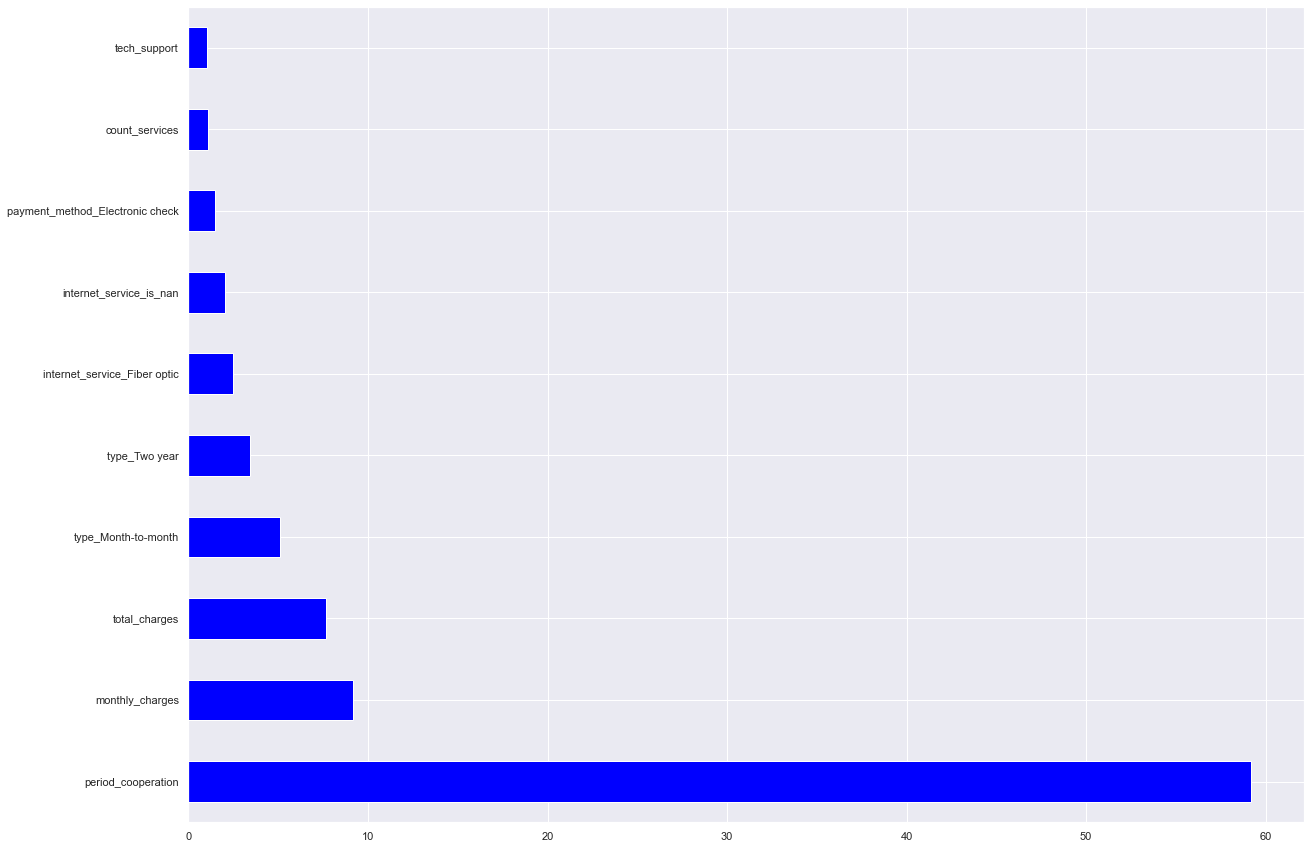

In [126]:
pd.Series(grid_cb.best_estimator_.feature_importances_,
          index=X_train_good.columns).nlargest(10).plot(kind='barh',color='blue')
plt.show()

Самуое большое влияние оказывается синтетический признак `period_cooperation` - около 58%. `monthly_charges` и `total_charges` тоже входят в тройку по значимости. Но объективно, они имеют значитиельную корреляцию с `period_cooperation`.

## Отчет по проекту

В рамках проекта оператор связи «Ниединогоразрыва.ком» хотел научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

Предоставлены 4 дата-сета: информация по договорам, устугам интернета, телефонии, клиенте. Данные были достаточно хорошего качества. Основной сложностью был факт заключения единого договора с клиентом как на услуги интернета, так и услуги телефонии.
Общий объем датасета составил 7043 договора. По предоставленным данным был имелся 21 признак.

### Ключевые шаги

#### 1 Загрузка данных

Все датасеты были объеденены в единый датасет по номеру договора (уникальному идентификатору).

#### 2 Разведывательный анализ

__Целевая функция__ В качестве целевой функции (таргета) была использована информация о дате закрытия договора. Если дата закрытия присутствовала, то фиксировался факт расторжения договора.

Все пропуски в информации по использованию дополнительных услуг интернета и телефонии были учтены, как неиспользуемые.

__Признаки договора__ Числовые значения были (ежемесячные траты на услуги «MonthlyCharges»и всего потрачено денег (TotalCharges). К категориальным признакам отнесены Тип оплаты Type и Способ оплаты (PaymentMethod). 

__Признаки интернет-соединения__ К категориальным признакам отнесены тип интернет-соединения (InternetService). Данная категория имела существенное количество пропусков (1526 записей), поэтому пропуски на отдельную категорию «is_nan». Дополнительные интернет услуги были переведены из текстовых в бинарные значения: «1» - при наличии использования, «0» - при отсутствии.

__Информация по использованию в интернет-телефонии__ (MultipleLines) из текстового формата была переведена в бинарные значения.

__Информация по пользователю__ Признаки наличия второй половинки «Partner» и наличие иждивенцев «Dependents» переведены в бинарные признаки. Критичным моментом стал анализ признака «Partner», который «заставил» произвести анализ дисбаланса. Анализ показал полное равноправие и паритет между женщинами и мужчинами в рамках данного датасета.

__Feature Engineering (синтетические признаки)__
Был создан признак Period Cooperation (срок сотрудничества), Который рассчитывался как разница между датой отчета (01.02.2022).
CountServices (количество услуг), который рассчитывался как количество всех дополнительных услуг. Также был выведен схожей с ним бинарный признак UsedAll (Использование обоих сервисов), который отражал факт наличия обеих услуг: интернета и телефонии.

__Удаление записей__
Проанализированы дубликаты. Учитывая наличие уникального идентификатора договора, дубликаты не были выявлены. Были удалены записи с договорами, которые использовались менее 3 месяцев. Значение 3 месяцев использовано на основании экспертного мнения.

В рамках изучения датасета был выведен портрет уходящего клиента: клиент, который осуществляет ежемесячную оплату 74 уе, Использует электронную оплату, использует оптико-волоконную сеть, а в среднем за 547 дней потратил аж 1532 уе.

__Выбор признаков__
Для выборки признаков использовалась корреляция PhiK. На основании матрицы корреляции были удалены слабо влияющие признаки на целевую функцию значения: стриминговое ТВ (streaming_tv), used_all, streaming_movies, multiple_lines, gender.       


#### 3 Построение моделей

__Разбиение на    тестовую и обучающую выборки__ были призведены с учетом пропорции 1/3 и стратификации по целевому признаку. Количество записей на тестовой выборке составило 4934Ю а на тестовой 1645 записей.
Учитывая наличие нескольких категориальных признаков 'payment_method', 'type', 'internet_service', использовалось One Hot Encoding. Также перед подготовкой данных было использовано МинМаксШкалирование.

__При построении всех моделей__ использовался подбор параметров при использовании GridSearchCV. Кросс-валидация проходила с разбиением на 3 части, а состояние случайности (random state) = 13032022. Метрикой оценки было использовала ROC-AUC.

__Логистическая регрессия (LogisticRegression)__
В логистической регрессии производился подбор параметров регуляризации матрицы: L1 и l2.
Наилучшее значение метрики на тестовой выборке составило 0.8594.

__Случайных лес (RandomForestClassifier)__
В случайном лесе производился подбор количества эстиматоров: 100 и 1000.
Наилучшее значение метрики на тестовой выборке составило 0.8742.

__Категориальный бустинг (CatBoostClassifier)__
Подбор параметров проиводился на двух выборках: с учетом OHE и встроенной функции кодирования категориальных переменных.
Параметры подбора для GridSearchCV использовались идентичные:

- Итерации: 200, 300, 400
- Шаг спуска (learning_rate) = 0,1
- Максимальная глубина: 2, 3, 4
- Результаты с OHE и со встроенной функцией оказались идентичными: 0.9181 и 0.9141 соответственно.

__Полносвязная нейронная сеть__
Использовалась два внутренних слоя с различным числом нейронов 128 и 64 с функцией активации ReLU, а также выходной слой с сигмоидой. За счет «затухания» признаков с увеличением не наблюдалось частичное увеличение ошибки при увеличении эпох. В качестве метода оптимизации был использован прерывание эпох до трех. Значение ROC-AUC составило 0.8560.
Нейронные сети по условиям задачи не могут учитываться в сравнении с другими моделями.

__Анализ значимости признаков__
Самуое большое влияние оказывается синтетический признак period_cooperation - около 58%. monthly_charges и total_charges тоже входят в тройку по значимости. Но объективно, они имеют значитиельную корреляцию с period_cooperation.

__Выводы про разделу__

- Все запланированные пункты плана по работе были выполнены.
- Трудности возникли при изучении нового материала но благодаря интернету вопрос решился. Впервые исползована корреляция Phik. В остальном Дата-сет, его обработка и построение моделей показались относительно несложными.
- Наилучшей итоговой моделью стала:
CatBoostClassifier, с параметрами {'iterations': 400, 'learning_rate': 0.1, 'max_depth': 4} Значение на тестовой выборке ROC-AUC: 0.9132 и accuracy_score: 0.8766.